In [108]:
# !pip install skimpy

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.model_selection import train_test_split
import random
import re
import pdb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
np.random.seed(42)
# import pandas_profiling

In [110]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [111]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [112]:
def train_val_test_split(df):
  df_train_val, df_test = train_test_split(df, test_size=0.15, random_state=42)
  df_train, df_val =  train_test_split(df_train_val, test_size=0.15, random_state=42)
  return df_train, df_val, df_test

df_train, df_val, df_test = train_val_test_split(df)

# Task 1: dataset description

In [113]:
print(df_train.columns)
df_train.head(5)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


encounter_id  patient_nbr             race  gender      age weight  \
1125        8174016    105459759         Hispanic  Female  [50-60)      ?   
58527     165695982     39878343        Caucasian  Female  [20-30)      ?   
19968      70761366    105365070        Caucasian    Male  [40-50)      ?   
50786     152232072     25213365  AfricanAmerican    Male  [80-90)      ?   
76247     229945452    107150049  AfricanAmerican    Male  [60-70)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
1125                   3                         6                    1   
58527                  2                         1                    7   
19968                  1                        11                    7   
50786                  3                         3                    5   
76247                  1                         1                    7   

       time_in_hospital payer_code medical_specialty  num_lab_procedures  \
1125                  1          ?   Surgery-General                  35   
58527                 1         UN  Emergency/Trauma                  50   
19968                 1          ?                 ?                  66   
50786                12         MC     Surgery-Neuro                  38   
76247                 3         HM                 ?                  38   

       num_procedures  num_medications  number_outpatient  number_emergency  \
1125                2                8                  0                 0   
58527               0                6                  0                 0   
19968               6               19                  1                 0   
50786               2               31                  0                 0   
76247               2               16                  3                 0   

       number_inpatient diag_1  diag_2 diag_3  number_diagnoses  ...  \
1125                  0    174     250      ?                 2  ...   
58527                 3    789  250.82    311                 5  ...   
19968                 3    410  250.41     70                 9  ...   
50786                 1    432     599     41                 9  ...   
76247                 1    585     410    276                 9  ...   

      glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone  \
1125           No            No    Steady        No          No           No   
58527          No            No        No        No          No           No   
19968          No            No        No        No          No           No   
50786          No            No    Steady        No          No           No   
76247          No            No        No        No          No       Steady   

      rosiglitazone acarbose miglitol troglitazone tolazamide examide  \
1125             No       No       No           No         No      No   
58527            No       No       No           No         No      No   
19968            No       No       No           No         No      No   
50786            No       No       No           No         No      No   
76247            No       No       No           No         No      No   

      citoglipton insulin glyburide-metformin glipizide-metformin  \
1125           No  Steady                  No                  No   
58527          No    Down                  No                  No   
19968          No  Steady                  No                  No   
50786          No  Steady                  No                  No   
76247          No  Steady                  No                  No   

      glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
1125                        No                      No                     No   
58527                       No                      No                     No   
19968                       No                      No                     No   
50786                       No                      No               

In [114]:
print(df_train.shape, df_train.shape[1]/df_train.shape[0])

(73525, 50) 0.0006800408024481469


In [115]:
# for col in df_train.columns:
#     if df_train[col].dtype == object:
#          print("?:", col, df_train[col][df_train[col] == '?'].count())
#          print("Unknown/Invalid: ", col,  df_train[col][df_train[col] == "Unknown/Invalid"].count())

#### descriptive stats

In [116]:
def replace_unknown(df, strings_to_replace = ['?', 'Unknown/Invalid']):

    return df.replace({col: {string: pd.NA for string in strings_to_replace} for col in df_train.columns}, inplace=False)

# df_val = replace_unknown(df_val)
strings_to_replace = ['?', 'Unknown/Invalid']
df_train = df_train.replace({col: {string: pd.NA for string in strings_to_replace} for col in df_train.columns}, inplace=False)

In [117]:
df = replace_unknown(df)


In [118]:
skim(df_train)



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 73525  │ │ string      │ 37    │                                                          │
│ │ Number of columns │ 50     │ │ int64       │ 13    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃          ┃           ┃       ┃          ┃          ┃           ┃          ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean     ┃ sd        ┃ p0    ┃ p25      ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ encounter │  0 │    0 │ 17000000 │ 100000000 │ 13000 │ 85000000 │ 15000000 │ 230000000 │ 44000000 │ ▆▇▇▅▂▂ │  │
│ │ _id       │    │      │        0 │           │       │          │        0 │           │        0 │        │  │
│ │ patient_n │  0 │    0 │ 54000000 │  39000000 │   140 │ 23000000 │ 46000000 │  87000000 │ 19000000 │  ▇▅▅▃  │  │
│ │ br        │    │      │          │           │       │          │          │           │        0 │        │  │
│ │ admission │  0 │    0 │        2 │       1.4 │     1 │        1 │        1 │         3 │        8 │ ▇▂ ▁▁  │  │
│ │ _type_id  │    │      │          │           │       │          │          │           │          │        │  │
│ │ discharge │  0 │    0 │      3.7 │       5.3 │     1 │        1 │        1 │         4 │       28 │   ▇▁   │  │
│ │ _disposit │    │      │          │           │       │          │          │           │          │        │  │
│ │ ion_id    │    │      │          │           │       │          │          │           │          │        │  │
│ │ admission │  0 │    0 │      5.7 │       4.1 │     1 │        1 │        7 │         7 │       25 │ ▅▇  ▁  │  │
│ │ _source_i │    │      │          │           │       │          │          │           │          │        │  │
│ │ d         │    │      │          │           │       │          │          │           │          │        │  │
│ │ time_in_h │  0 │    0 │      4.4 │         3 │     1 │        2 │        4 │         6 │       14 │ ▇▃▂▁▁▁ │  │
│ │ ospital   │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_lab_p │  0 │    0 │       43 │        20 │     1 │       31 │       44 │        57 │      130 │  ▃▇▇▃  │  │
│ │ rocedures │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_proce │  0 │    0 │      1.3 │       1.7 │     0 │        0 │        1 │         2 │        6 │ ▇▃▂▂▁▁ │  │
│ │ dures     │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_medic │  0 │    0 │       16 │       8.1 │     1 │       10 │       15 │        20 │       81 │  ▇▇▁   │  │
│ │ ations    │    │      │          │           │       │          │          │           │          │        │  │
│ │ number_ou │  0 │    0 │     0.37 │       1.3 │     0 │        0 │        0 │         0 │       40 │   ▇    │  │
│ │ tpatient  │    │      │          │           │      

In [119]:
# skim(df)

#### visualization

In [120]:
# # Numerical features
# num_feats=[col for col in df_train.columns if df_train[col].dtypes != 'object']

# # Plot distribution of numerical columns
# fig=plt.figure(figsize=(20,30))
# for i, col in enumerate(num_feats):
#     plt.subplot(len(num_feats),1,1*i+1)
#     sns.distplot(df[col])
    
# fig.tight_layout()
# plt.show()

In [121]:
# categorical_vars

In [122]:
df_train['discharge_disposition_id'].value_counts(normalize=True)

discharge_disposition_id
1     0.592710
3     0.136403
6     0.127372
        ...   
10    0.000054
12    0.000041
27    0.000014
Name: proportion, Length: 25, dtype: float64

# Task 2: Preprocessing

#### Drop columns 

In [123]:
# df_train['encounter_id'] # unique, unordered values, e.g. like a student number

In [124]:
cols_drop = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'examide', 'citoglipton']
less_controversial_cols = ['weight', 'encounter_id', 'examide', 'citoglipton', 'patient_nbr']


In [125]:
def drop_cols(df, cols=less_controversial_cols):
  '''
  Based on training set stats
  '''
  return df.drop(cols, axis=1)

# df_train = df_train.drop(cols_drop, axis=1)
df_train = drop_cols(df_train)

In [126]:
from sklearn.calibration import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

def imputation(split, train_split=df_train):
   '''
   Chicken and egg problem: can't use KNNImputer unless I factorize categorical variables,
   but I can't factorize them if there are missing values
   
   '''
   categorical_cols = train_split.select_dtypes(include=['object']).columns

   encoder = LabelEncoder()
   train_split[categorical_cols] = encoder.fit_transform(train_split[categorical_cols])
   split[categorical_cols] = encoder.transform(split[categorical_cols])

   imputer = KNNImputer(n_neighbors=5)
   imputer.fit(train_split)
   imputed_split = imputer.transform(split)
   imputed_split = pd.DataFrame(imputed_split, columns=split.columns)
   return imputed_split


def imputation(split, train_split=df_train):
   mode_values = train_split.mode().iloc[0]

   imputed_split = split.fillna(mode_values)

   return imputed_split



print("before imputation:", sum(df_train.isna().sum()))
# print("Number of NaN values per feature: ")
# df_train_na = df_train.apply(mode_imputation, axis = 1)
df_train = imputation(df_train)
print("after imputation:", sum(df_train.isna().sum()))


before imputation: 198943
after imputation: 0


In [127]:
df_train['payer_code']

1125      MC
58527     UN
19968     MC
          ..
48137     SP
100571    MC
33851     BC
Name: payer_code, Length: 73525, dtype: object

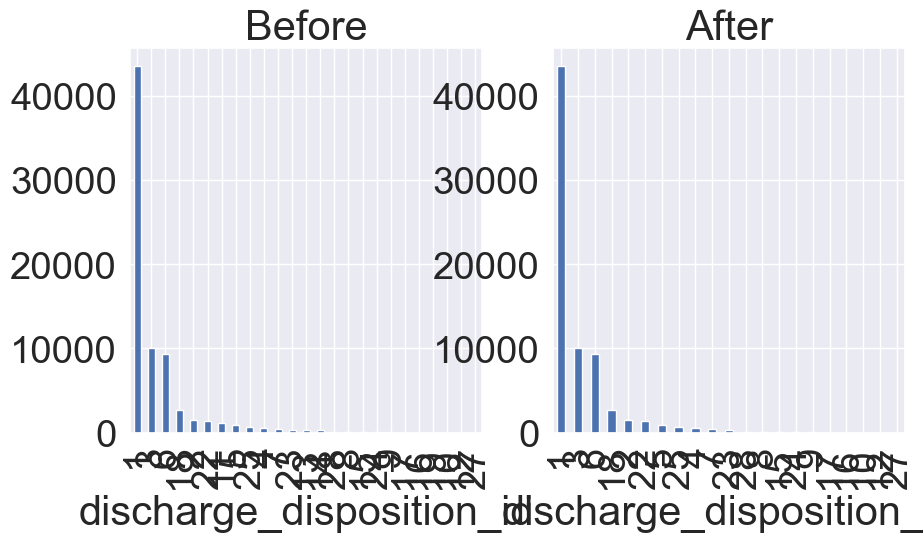

In [128]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the barplot before removing values
df_train['discharge_disposition_id'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Before')

# Remove specified values from the DataFrame
df_train_plot = df_train[~df_train['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

# Plot the barplot after removing values
df_train_plot['discharge_disposition_id'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('After')

# Display the plots
plt.show()

In [129]:
def remove_disp_ids(split):
    return split[~split['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
df_train = remove_disp_ids(df_train)
assert sum(df_train['discharge_disposition_id'] == 11) == 0

In [130]:
sum(df_train['admission_source_id'] == 7)
# df_train['admission_source_id'].value_counts()/len(df)
df_train['admission_source_id'].value_counts(normalize=True).head(5).index
replacement_map = {category: label for category, label in zip(df_train['admission_source_id'].value_counts(normalize=True).head(4).index
, ["main", "second", "third", "fourth"])}

replacement_map_source = {category: label for category, label in zip(df_train['admission_source_id'].value_counts(normalize=True).head(4).index
, ["main", "second", "third", "fourth"])}

replacement_map

{7: 'main', 1: 'second', 17: 'third', 4: 'fourth'}

In [131]:
df_train['admission_source_id'].value_counts(normalize=True).head(10)


admission_source_id
7     0.562901
1     0.293670
17    0.065402
        ...   
3     0.001672
20    0.001630
9     0.001352
Name: proportion, Length: 10, dtype: float64

In [132]:
df_train['discharge_disposition_id'].value_counts(normalize=True)
# sum(df_train['discharge_disposition_id'] == '19')

discharge_disposition_id
1     0.607195
3     0.139736
6     0.130484
        ...   
10    0.000056
12    0.000042
27    0.000014
Name: proportion, Length: 21, dtype: float64

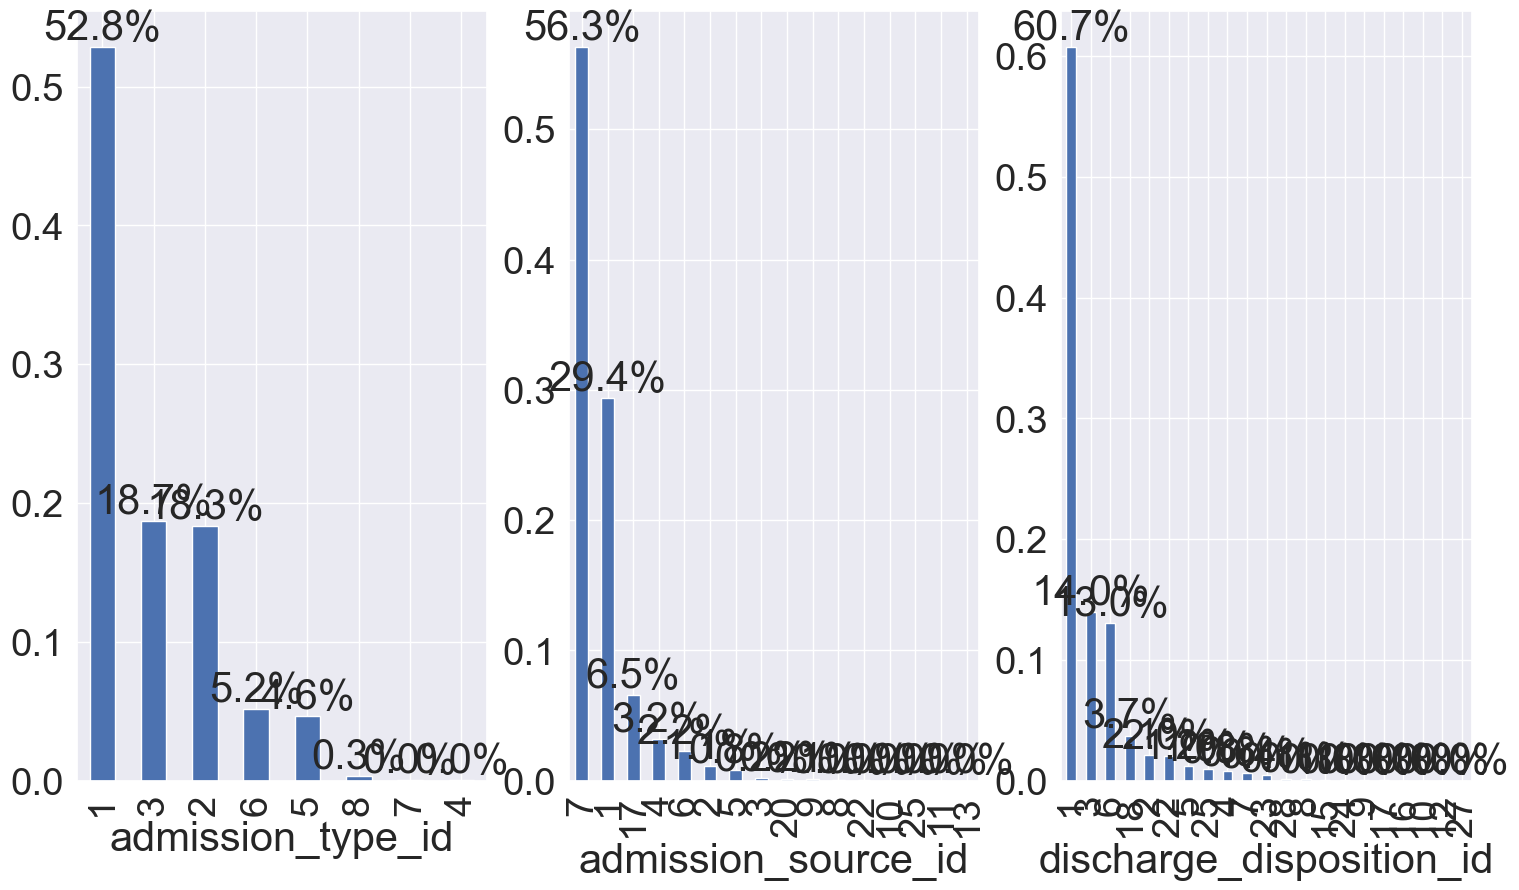

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
df_train['admission_type_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[0])
df_train['admission_source_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
df_train['discharge_disposition_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[2])
for k in range(3):
    for i in axes[k].patches:
        axes[k].text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.1%}', ha='center', va='bottom')

plt.show()

In [134]:
pd.set_option('display.max_rows', 7)
sum(df_train['medical_specialty'].value_counts(normalize=True) < 0.00085)
df_train['medical_specialty'].value_counts(normalize=True)

medical_specialty
InternalMedicine          0.633139
Emergency/Trauma          0.074389
Family/GeneralPractice    0.072355
                            ...   
Proctology                0.000014
Dermatology               0.000014
Neurophysiology           0.000014
Name: proportion, Length: 70, dtype: float64

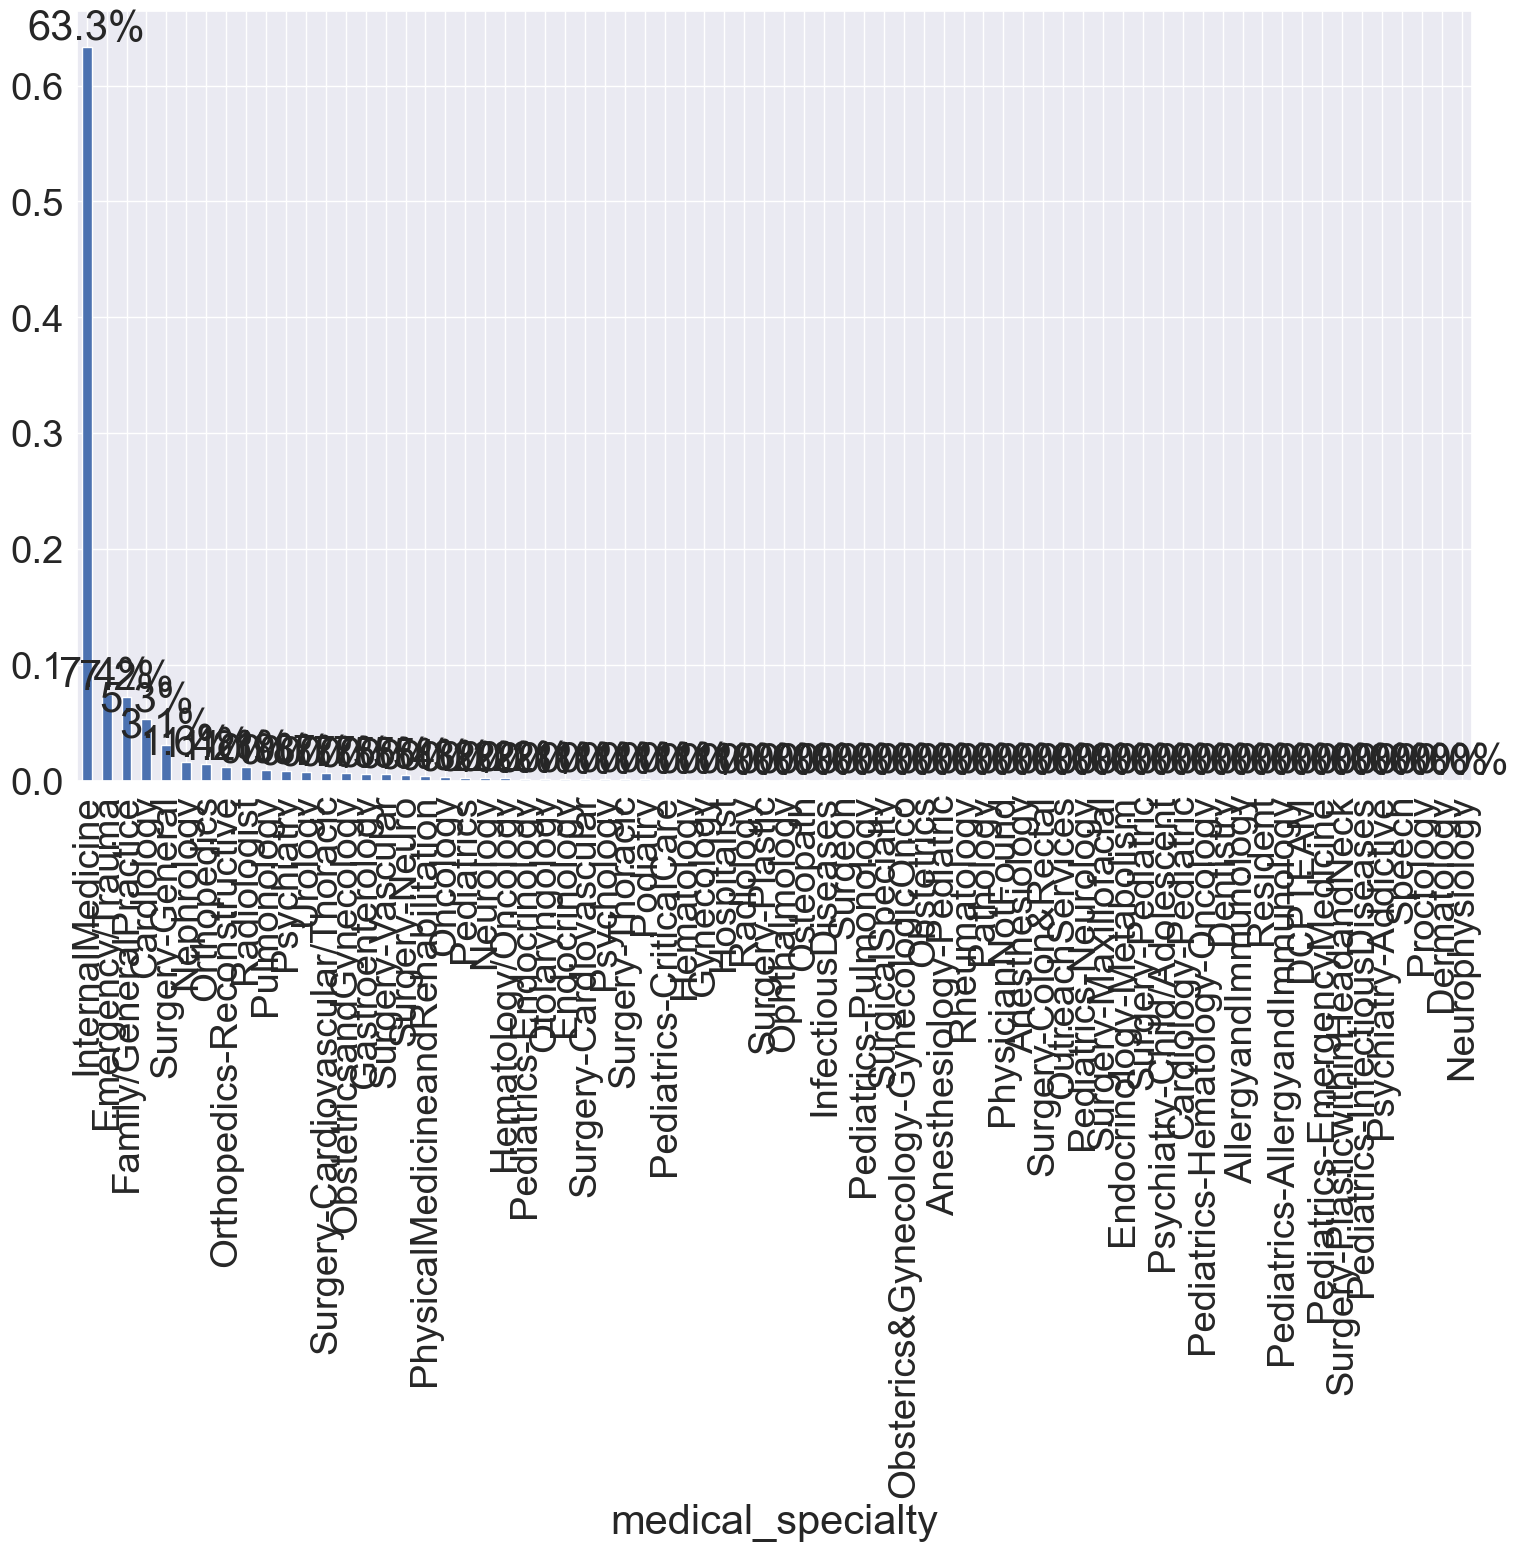

In [135]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
df_train['medical_specialty'].value_counts(normalize=True).plot(kind='bar', ax=axes)
for i in axes.patches:
    axes.text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.1%}', ha='center', va='bottom')

plt.show()

In [136]:
def replace_collapse(split, train_df = df_train):
    """
    Replacement map is computed on training split
    Training-split-based replacement map is applied to desired split, i.e., train, test, val. 
    """
    ### based on training stats
    ### assume threshold of 5% to clip
    ### admission type identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available 

    # replacement_map_admission_id = {category: label for category, label in 
    #                                 zip(train_df['admission_type_id'].value_counts(normalize=True).head(4).index,
    #                                     ["main", "second", "third", "fourth"])
    #                                 }
    replacement_map_admission_id = {category: label for category, label in 
                                    zip(train_df['admission_type_id'].value_counts(normalize=True).head(4).index,
                                        [str(i) for i in range(4)])
                                    }
    
    # split['admission_type_id'] = split['admission_type_id'].replace({1: "main", 
    #                                                                  3: "second", 
    #                                                                  2: "third", 
    #                                                                  6: "fourth"})
    split['admission_type_id'] = split['admission_type_id'].replace(replacement_map_admission_id)
    
    # split['admission_type_id'] = split['admission_type_id'].replace(
    #     {value: 'other' for value in split['admission_source_id'].unique() if value not in ["main", "second", "third", "fourth"]}
    # )
    split['admission_type_id'] = split['admission_type_id'].replace(
        {value: str(5) for value in split['admission_source_id'].unique() if value not in [str(i) for i in range(4)]}
    )

    # split['admission_type_id'] = split['admission_type_id'].astype('category')

    ### assume threshold of 0.1% to clip
    ### admission source: identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital 

    # replacement_map_admission_source = {category: label for category, label in 
    #                                 zip(train_df['admission_source_id'].value_counts(normalize=True).head(7).index,
    #                                     ["main", "second", "third", "fourth", "fifth", "sixth", "seventh"])
    #                                 }
    
    replacement_map_admission_source = {category: label for category, label in 
                                    zip(train_df['admission_source_id'].value_counts(normalize=True).head(7).index,
                                        [str(i) for i in range(7)])
                                    }
    
    split['admission_source_id'] = split['admission_source_id'].replace(replacement_map_admission_source)

    # split['admission_source_id'] = split['admission_source_id'].replace(
    #     {value: 'other' for value in split['admission_source_id'].unique() if value not in ["main", "second", "third", "fourth", "fifth", "sixth", "seventh"]}
    # )
    split['admission_source_id'] = split['admission_source_id'].replace(
        {value: str(7) for value in split['admission_source_id'].unique() if value not in [str(i) for i in range(7)]}
    )

    # split['admission_source_id'] = split['admission_source_id'].astype('category')

    ### assume threshold of 0.4%
    ### disposition type:  corresponding to 29 distinct values, for example, discharged to home, expired, and not available
    # replacement_map_discharge = {category: label for category, label in 
    #                                 zip(train_df['discharge_disposition_id'].value_counts(normalize=True).head(11).index,
    #                                     ["main", "second", "third", "fourth", "fifth", "sixth", "seventh", 
    #                                      "eigth", "ninth", "tenth", "eleventh"])
    #                                 }
    replacement_map_discharge = {category: label for category, label in 
                                    zip(train_df['discharge_disposition_id'].value_counts(normalize=True).head(11).index,
                                        [str(i) for i in range(11)])
                                    }
    
    split['discharge_disposition_id'] = split['discharge_disposition_id'].replace(replacement_map_discharge)

    # split['discharge_disposition_id'] = split['discharge_disposition_id'].replace({
    #     value: 'other' for value in split['discharge_disposition_id'].unique() if value not in ["main", "second", "third", "fourth", "fifth", "sixth", "seventh",
    #                                                                                             "eigth", "ninth", "tenth", "eleventh"]
    #     }
    # )

    split['discharge_disposition_id'] = split['discharge_disposition_id'].replace({
        value: str(11) for value in split['discharge_disposition_id'].unique() if value not in [str(i) for i in range(11)]
        }
    )

    # split['discharge_disposition_id'] = split['discharge_disposition_id'].astype('category')

    ### assume threshold of 0.000085%
    ### disposition type:  corresponding to many distinct values, for example, cardiology, internal medicine, family\general practice
    
    split['medical_specialty'] = split['medical_specialty'].replace({
        value: 'other' for value in split['medical_specialty'].unique() if value not in train_df['medical_specialty'].value_counts(normalize=True).head(21).index
        }
    )
    
    return split
df_train = replace_collapse(df_train)

# df_dum = rep_collapse(df)

In [137]:
# skim(df_train)

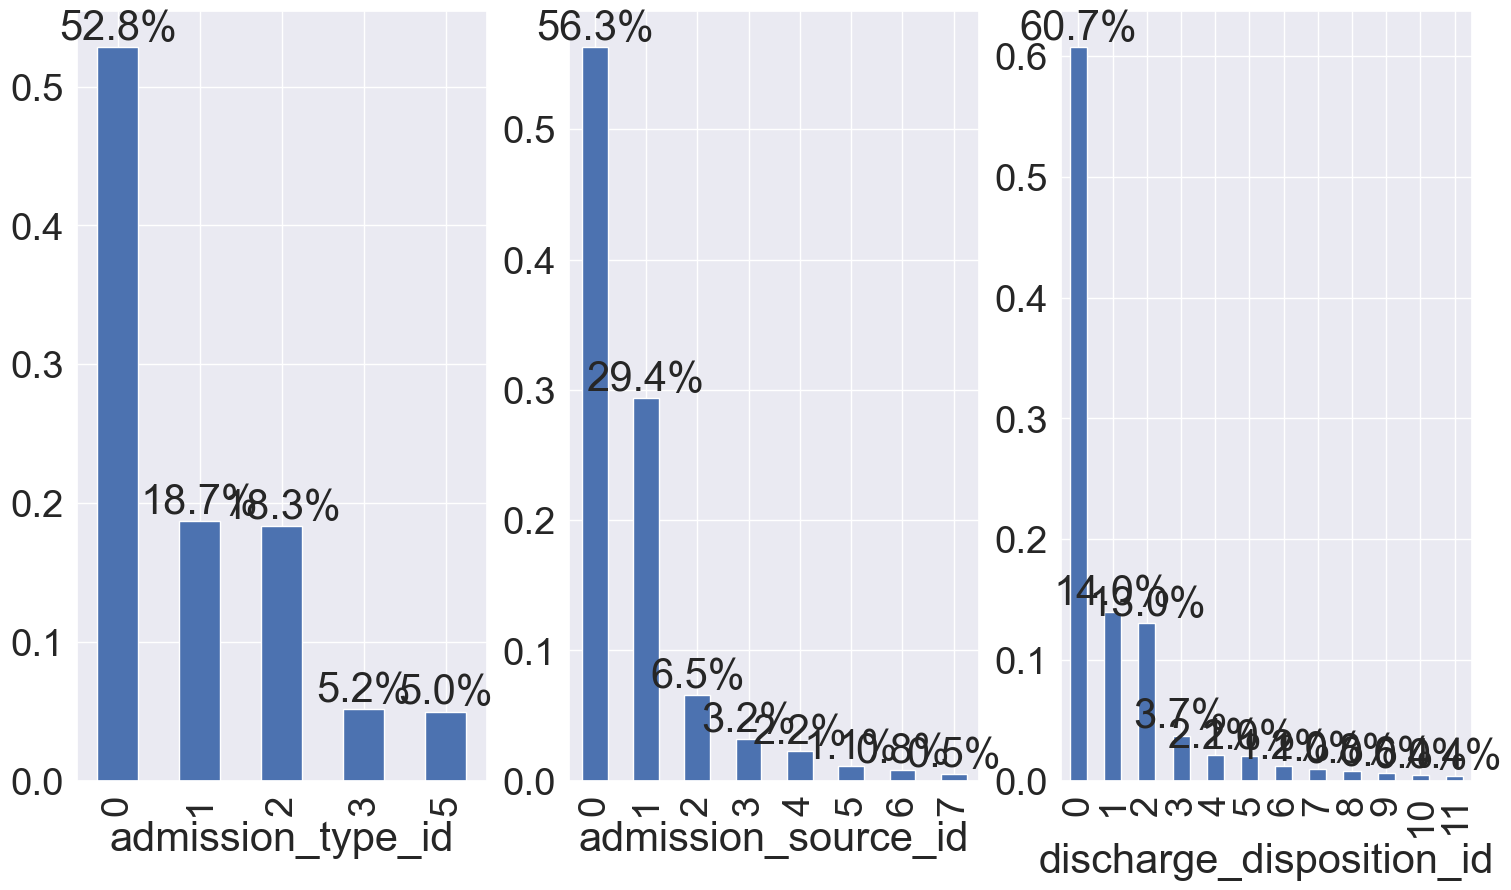

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
df_train['admission_type_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[0])
df_train['admission_source_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
df_train['discharge_disposition_id'].value_counts(normalize=True).plot(kind='bar', ax=axes[2])

for k in range(3):
    for i in axes[k].patches:
        axes[k].text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.1%}', ha='center', va='bottom')

plt.show()

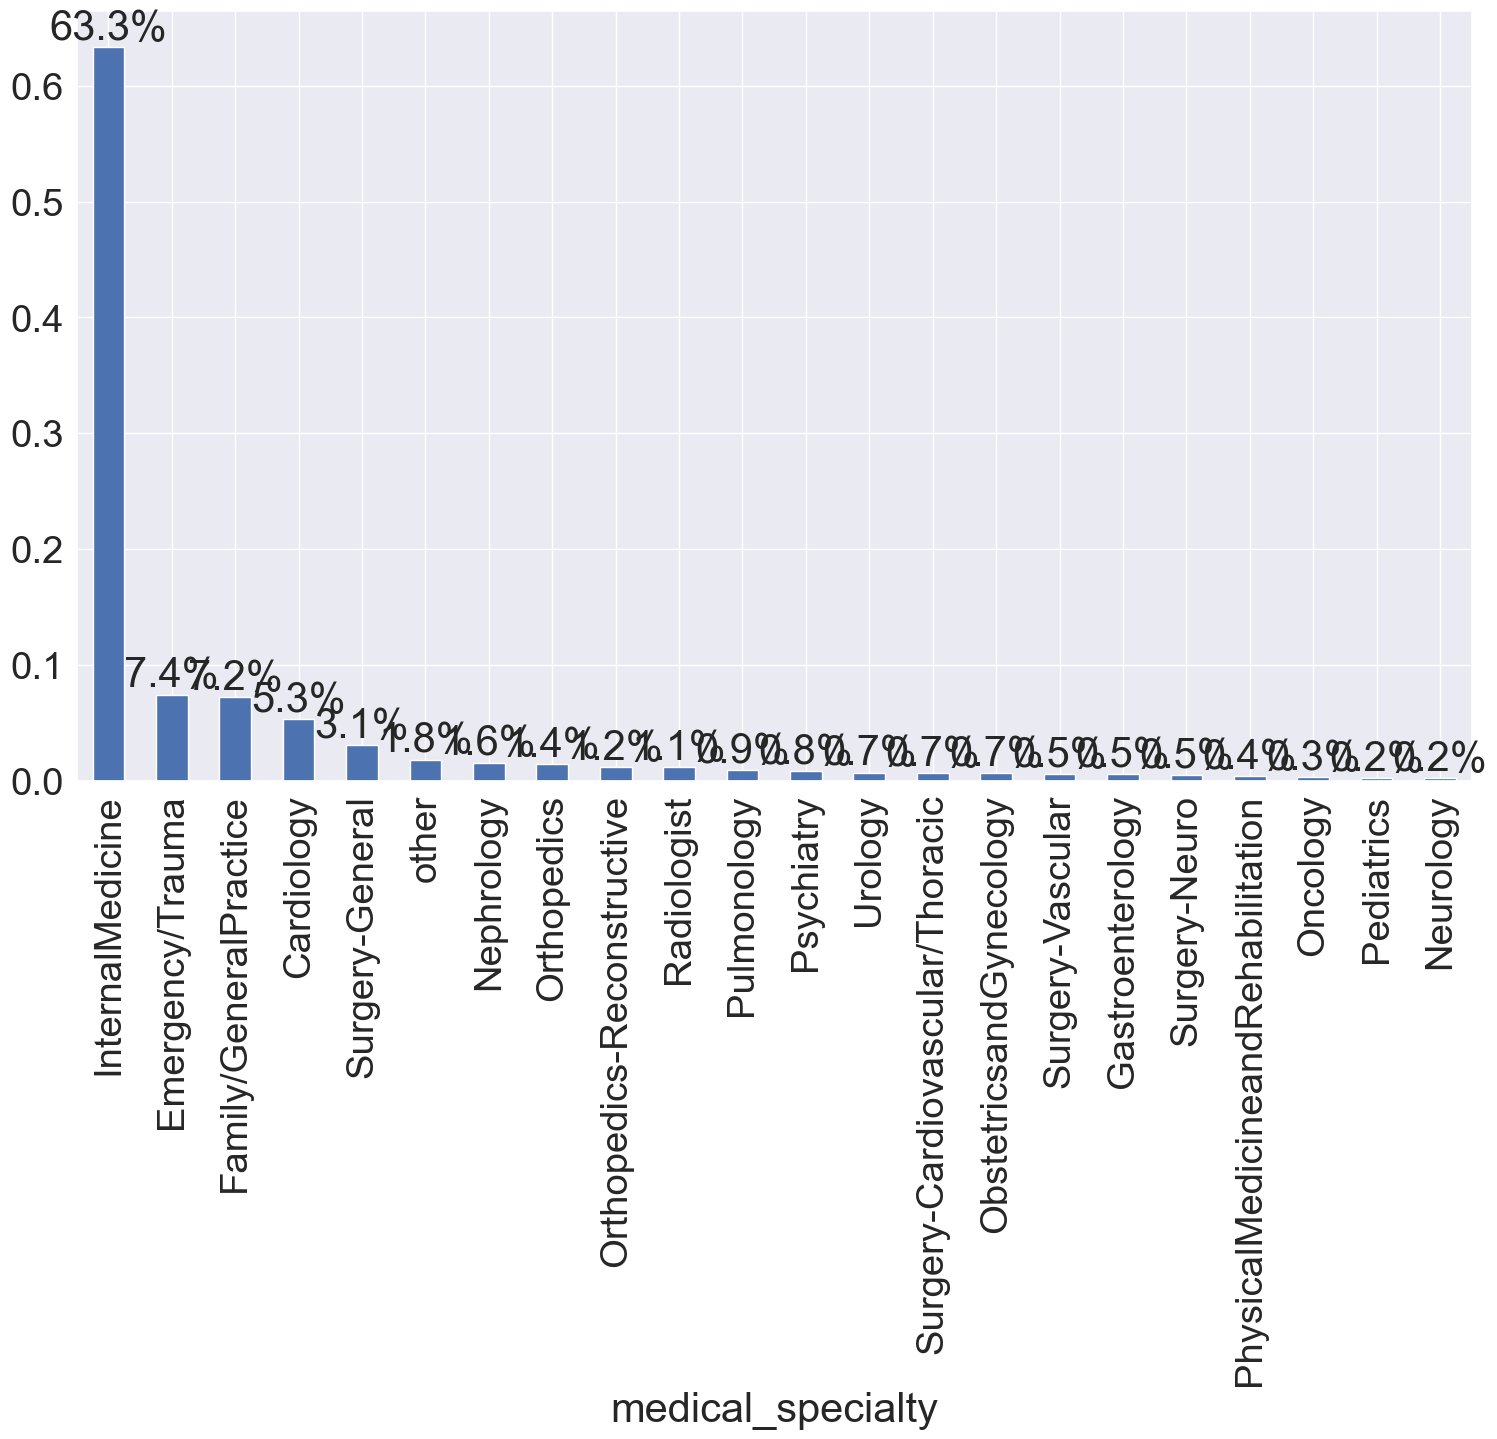

In [139]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
df_train['medical_specialty'].value_counts(normalize=True).plot(kind='bar', ax=axes)
for i in axes.patches:
    axes.text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.1%}', ha='center', va='bottom')

plt.show()

In [140]:
df_train['diag_1'] = df_train['diag_1'].astype(str)
sum(df_train['diag_1'] == '250')

175

In [141]:
diag = 'EVe'
any(x in diag for x in ['V', 'E'])

True

In [142]:
def collapse_diag_123(split):
    def categorize_diagnosis(diag):
        pattern = r"^250\.\d{2}$"

        if pd.isnull(diag):
            return 
        if any(x in diag for x in ['Circulatory', 'Respiratory', 'Diabetes', 'External Injury', 'Digestive',
                                   'Genitourinary', 'Neoplasms', 'Musculoskeletal', 'Injury', 'Other',
                                    'Endocrine', 'Skin', "Infectious", 'Mental', 'Blood', 'Nervous', 'Unclassified' ]):
            return diag
        if any(x in diag for x in ['V', 'E']):
            return "External Injury"
        elif re.match(pattern, diag) or diag=="250":
            return "Diabetes"
        elif 390 <= float(diag) <= 459 or diag == "785":
            # print(diag)
            return "Circulatory"
        elif 460 <= float(diag) <= 519 or diag == "786":
            return "Respiratory"
        elif 520 <= float(diag) <= 579 or diag == "787":
            return "Digestive"
        elif 580 <= float(diag) <= 629 or diag == "788":
            return "Genitourinary"
        elif 140 <= float(diag) <= 239:
            return "Neoplasms"
        elif 710 <= float(diag) <= 739:
            return "Musculoskeletal"
        elif 800 <= float(diag) <= 999:
            return "Injury"
        elif 790 <= float(diag) <= 799 or float(diag) == 780 or float(diag) == 781 or float(diag) == 784:
            return "Other"
        elif 240 <= float(diag) <= 279 and float(diag) != 250:
            return "Endocrine"
        elif 680 <= float(diag) <= 709 or float(diag) == 782:
            return "Skin"
        elif 1 <= float(diag) <= 139:
            return "Infectious"
        elif 290 <= float(diag) <= 319:
            return "Mental"
        elif 280 <= float(diag) <= 289:
            return "Blood"
        elif 320 <= float(diag) <= 359:
            return "Nervous"
        else:
            return "Unclassified"
    split['diag_1'] = split['diag_1'].apply(categorize_diagnosis)
    split['diag_2'] = split['diag_2'].apply(categorize_diagnosis)
    split['diag_3'] = split['diag_3'].apply(categorize_diagnosis)

    return split


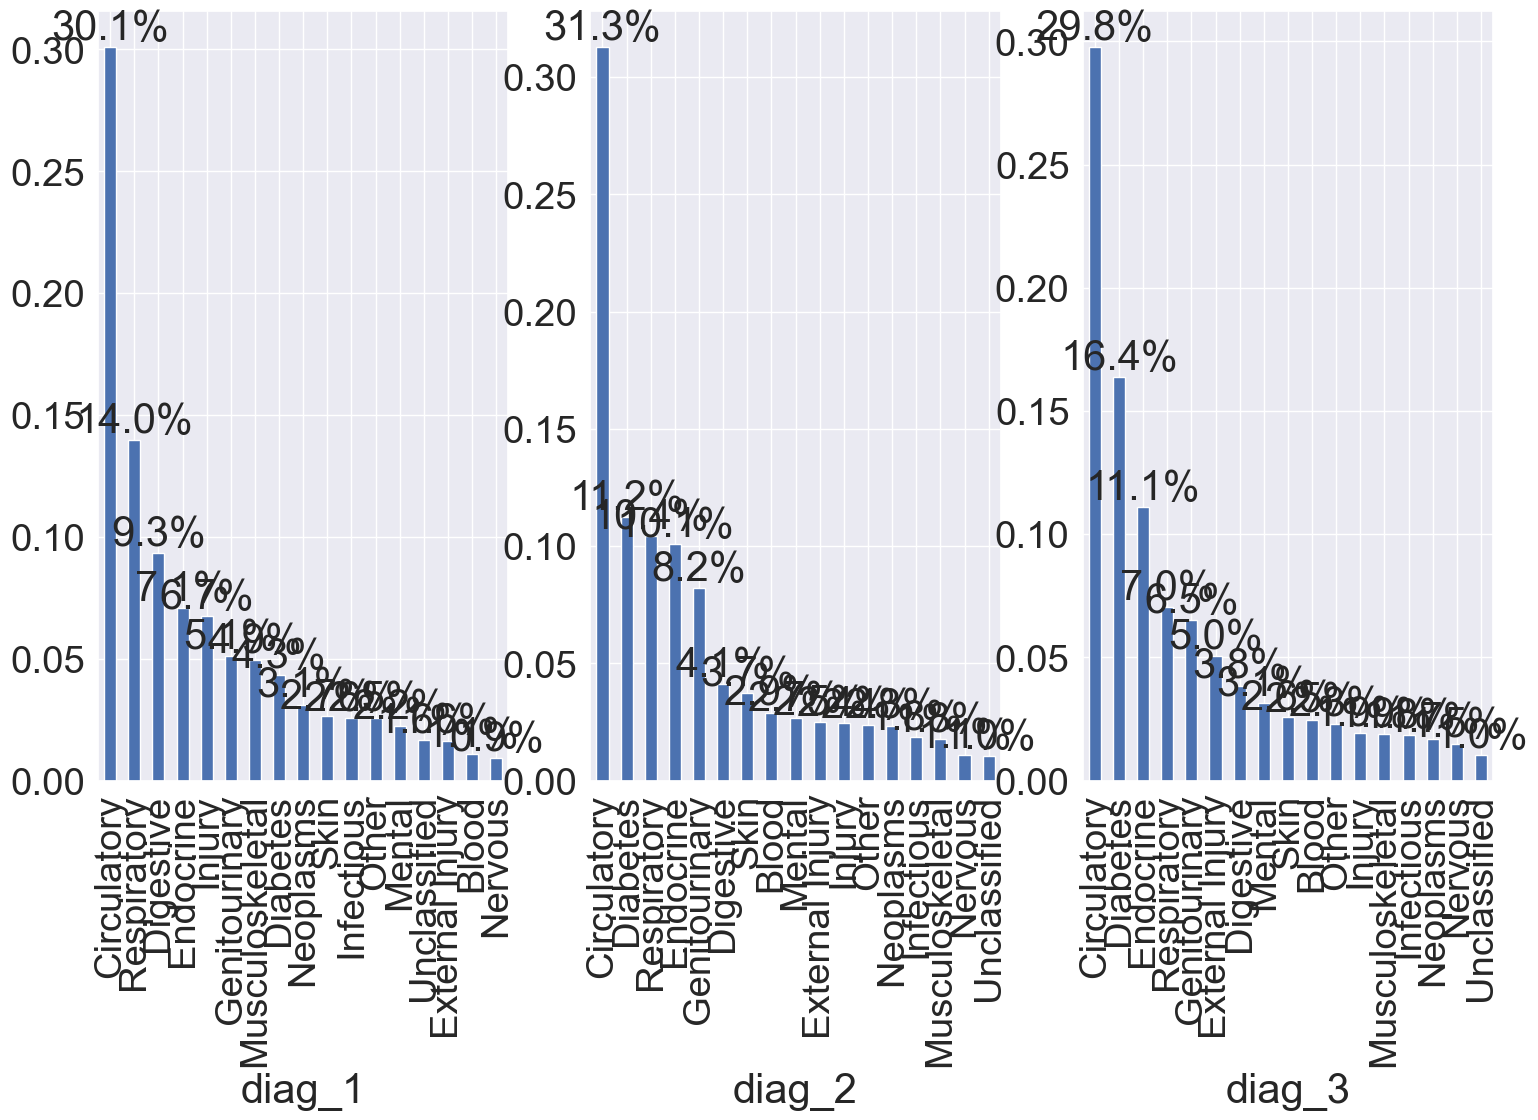

In [143]:
# Apply the categorize_diagnosis function to create 'primary_diagnosis' column
df_train = collapse_diag_123(df_train)
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
df_train['diag_1'].value_counts(normalize=True).plot(kind='bar', ax=axes[0])
df_train['diag_2'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
df_train['diag_3'].value_counts(normalize=True).plot(kind='bar', ax=axes[2])

for k in range(3):
    for i in axes[k].patches:
        axes[k].text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.1%}', ha='center', va='bottom')

plt.show()

In [144]:
diagnosis_data = df_train[['diag_1', 'diag_2', 'diag_3']]

# Convert any non-numeric values to NaN
diagnosis_data = pd.get_dummies(diagnosis_data)

# Calculate the correlation matrix
correlation_matrix = diagnosis_data.corr()

# Plot the correlation matrix using a heatmap
# plt.figure(figsize=(30, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix between diag1, diag2, and diag3')
# plt.show()

highly_correlated_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            highly_correlated_pairs.append((i, j))
print("Pairs of variables with correlation > 0.6:", len(highly_correlated_pairs))


Pairs of variables with correlation > 0.6: 0


In [145]:
df_train['age'].value_counts()

age
[70-80)    18272
[60-70)    16021
[50-60)    12326
           ...  
[20-30)     1181
[10-20)      495
[0-10)       115
Name: count, Length: 10, dtype: int64

In [146]:
df_train['miglitol'].value_counts()

miglitol
No        71744
Steady       23
Down          4
Name: count, dtype: int64

In [147]:
df_train['readmitted'].value_counts(normalize=True)

readmitted
NO     0.529239
>30    0.357024
<30    0.113737
Name: proportion, dtype: float64

In [148]:
def binarize_labels(split):
    '''
    global preprocessing regardless of seeing test data or not
    Categorize "readmitted" to 1 if patient was readmitted within 30 days, 0 otherwise

    '''
    split['readmitted'] = split['readmitted'].apply(lambda x: 0 if x not in [">30", "<30"] else 1)

    return split 

df_train = binarize_labels(df_train)
# Display the levels of the 'readmitted' column
df_train['readmitted'].value_counts(normalize=True)

readmitted
0    0.529239
1    0.470761
Name: proportion, dtype: float64

In [149]:
# df_train['admission_type_id'] = df_train['admission_type_id'].astype('category')
# df_train['discharge_disposition_id'] = df_train['discharge_disposition_id'].astype('category')
# df_train['admission_source_id'] = df_train['admission_source_id'].astype('category')
categorical_vars = [col for col in df_train.columns if df_train[col].dtypes == 'object']
def cast_category(split, train_cat_vars=categorical_vars):
    split[train_cat_vars] = split[train_cat_vars].astype('category')
    # split = pd.get_dummies(split, columns=train_cat_vars, prefix= train_cat_vars)
    return split
# df_train[categorical_vars] = df_train[categorical_vars].astype('category')
df_train = cast_category(df_train)

In [150]:
def one_hot_encode(split):
  cats = [col for col in split.columns if split[col].dtypes == 'category' and col != 'readmitted']
  split = pd.get_dummies(split, columns=cats, prefix= cats)
  return split

In [151]:
pd.set_option('display.max_columns', df_train.shape[1])
print(df_train.shape)
df_train.head()

(71771, 45)


race  gender      age admission_type_id  \
1125          Hispanic  Female  [50-60)                 1   
58527        Caucasian  Female  [20-30)                 2   
50786  AfricanAmerican    Male  [80-90)                 1   
76247  AfricanAmerican    Male  [60-70)                 0   
73954        Caucasian    Male  [50-60)                 1   

      discharge_disposition_id admission_source_id  time_in_hospital  \
1125                         2                   1                 1   
58527                        0                   0                 1   
50786                        1                   6                12   
76247                        0                   0                 3   
73954                        0                   0                 4   

      payer_code medical_specialty  num_lab_procedures  num_procedures  \
1125          MC   Surgery-General                  35               2   
58527         UN  Emergency/Trauma                  50               0   
50786         MC     Surgery-Neuro                  38               2   
76247         HM  InternalMedicine                  38               2   
73954         SP  Emergency/Trauma                  56               0   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
1125                 8                  0                 0                 0   
58527                6                  0                 0                 3   
50786               31                  0                 0                 1   
76247               16                  3                 0                 1   
73954               13                  0                 0                 0   

              diag_1         diag_2      diag_3  number_diagnoses  \
1125       Neoplasms       Diabetes    Diabetes                 2   
58527   Unclassified       Diabetes      Mental                 5   
50786    Circulatory  Genitourinary  Infectious                 9   
76247  Genitourinary    Circulatory   Endocrine                 9   
73954           Skin    Circulatory        Skin                 9   

      max_glu_serum A1Cresult metformin repaglinide nateglinide  \
1125           Norm        >8    Steady          No          No   
58527          Norm        >8        No          No          No   
50786          Norm        >8        No          No          No   
76247          Norm        >8        No          No          No   
73954          Norm      Norm    Steady          No          No   

      chlorpropamide glimepiride acetohexamide glipizide glyburide  \
1125              No          No            No    Steady        No   
58527             No          No            No        No        No   
50786             No          No            No    Steady        No   
76247             No          No            No        No        No   
73954             No          No            No        No        No   

      tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone  \
1125           No           No            No       No       No           No   
58527          No           No            No       No       No           No   
50786          No           No            No       No       No           No   
76247          No       Steady            No       No       No           No   
73954          No           No            No       No       No           No   

      tolazamide insulin glyburide-metformin glipizide-metformin  \
1125          No  Steady                  No                  No   
58527         No    Down                  No                  No   
50786         No  Steady                  No                  No   
76247         No  Steady                  No                  No   
73954         No      No                  No                  No   

      glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
1125                        No                      No                     No   
5

In [152]:
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                 Categories                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┓                             │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables    ┃                             │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━┩                             │
│ │ Number of rows    │ 71771  │ │ category    │ 36    │ │ race                     │                             │
│ │ Number of columns │ 45     │ │ int64       │ 9     │ │ gender                   │                             │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ age                      │                             │
│                                                        │ admission_type_id        │                             │
│                                                        │ discharge_disposition_id │                             │
│                                                        │ admission_source_id      │                             │
│                                                        │ payer_code               │                             │
│                                                        │ medical_specialty        │                             │
│                                                        │ diag_1                   │                             │
│                                                        │ diag_2                   │                             │
│                                                        │ diag_3                   │                             │
│                                                        │ max_glu_serum            │                             │
│                                                        │ A1Cresult                │                             │
│                                                        │ metformin                │                             │
│                                                        │ repaglinide              │                             │
│                                                        │ nateglinide              │                             │
│                                                        │ chlorpropamide           │                             │
│                                                        │ glimepiride              │                             │
│                                                        │ acetohexamide            │                             │
│                                                        │ glipizide                │                             │
│                                                        │ glyburide                │                             │
│                                                        │ tolbutamide              │                             │
│                                                        │ pioglitazone             │                             │
│                                                        │ rosiglitazone            │                             │
│                                                        │ acarbose                 │                             │
│                                                        │ miglitol                 │                             │
│                                                        │ troglitazone             │                             │
│                                                        │ tolazamide               │                             │
│                                                        │ insulin                  │                             │
│                                                       

In [153]:
df['gender'].value_counts()

gender
Female    54708
Male      47055
Name: count, dtype: int64

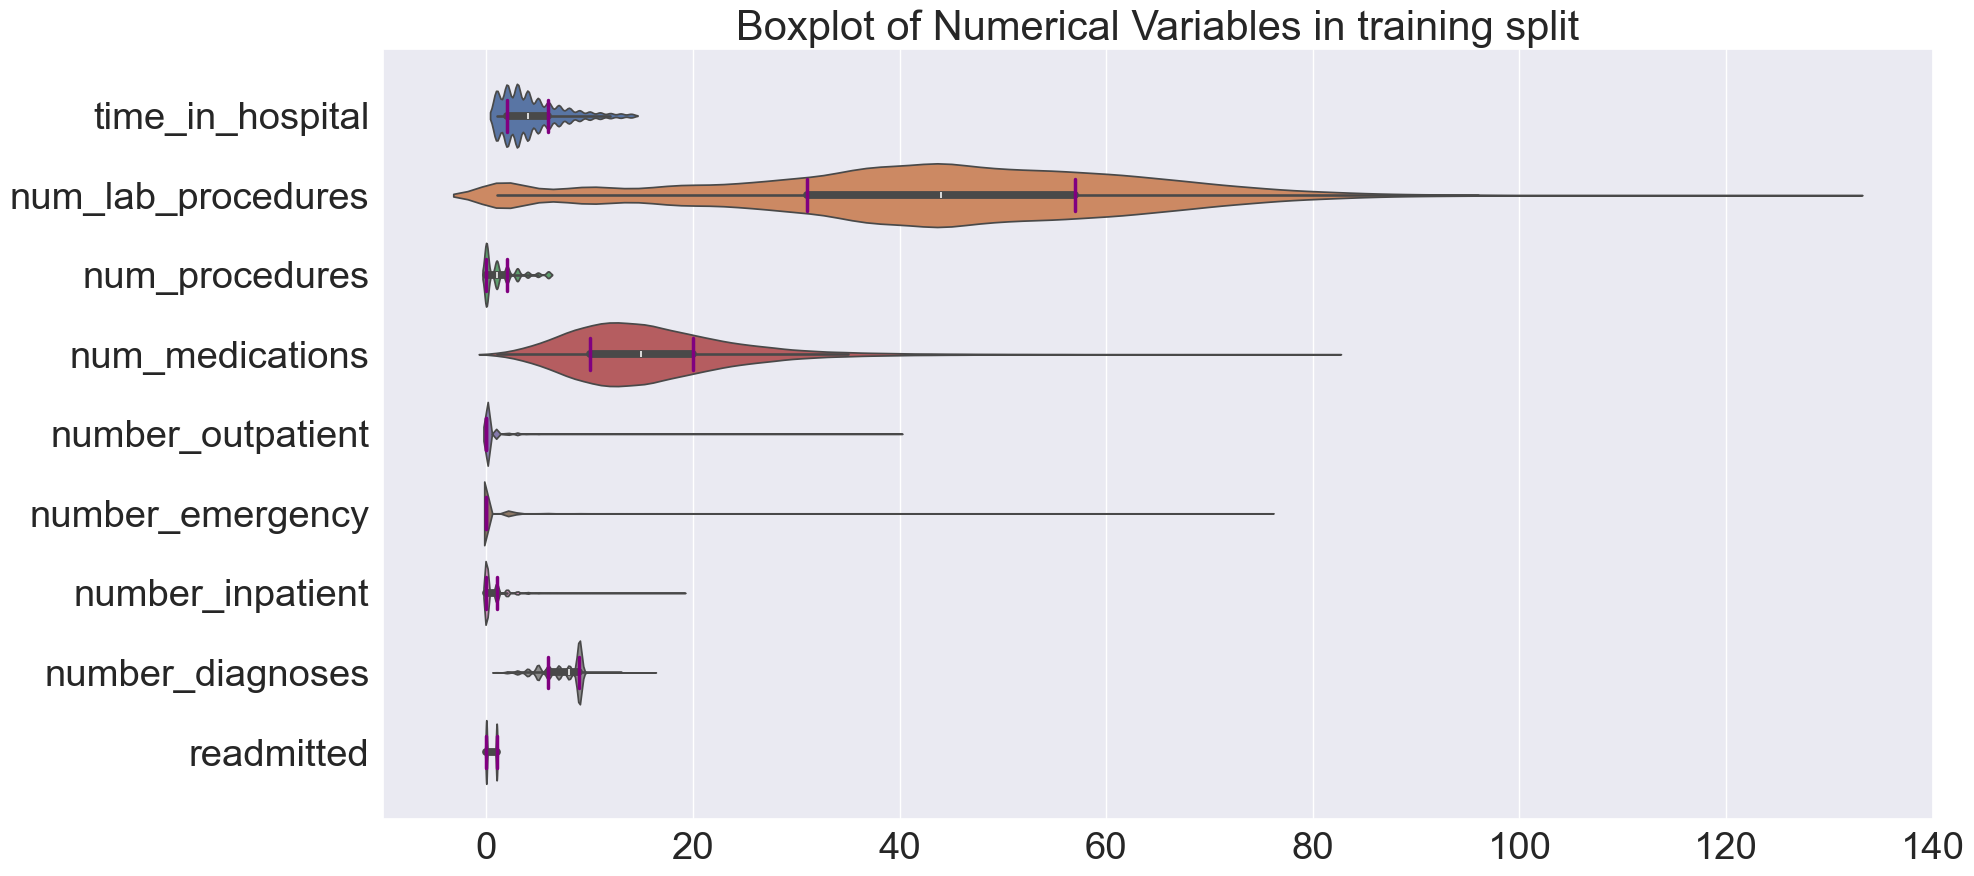

In [154]:
# Select numerical variables for boxplot
numerical_vars = df_train.select_dtypes(include=['float64', 'int64'])
sns.set_theme(font_scale=2.5) 
# Plot boxplot for each numerical variable
plt.figure(figsize=(20, 10))
violin = sns.violinplot(data=numerical_vars, orient='h')
# Calculate IQR values
Q1 = numerical_vars.quantile(0.25)
Q3 = numerical_vars.quantile(0.75)
IQR = Q3 - Q1

for i, col in enumerate(numerical_vars.columns):
    Q1 = numerical_vars[col].quantile(0.25)
    Q3 = numerical_vars[col].quantile(0.75)
    IQR = Q3 - Q1
    
    plt.plot([Q1, Q1], [i-0.2, i+0.2], color='purple', linestyle='-', linewidth=2.5)
    plt.plot([Q3, Q3], [i-0.2, i+0.2], color='purple', linestyle='-', linewidth=2.5)
    

plt.title('Boxplot of Numerical Variables in training split')
plt.show()


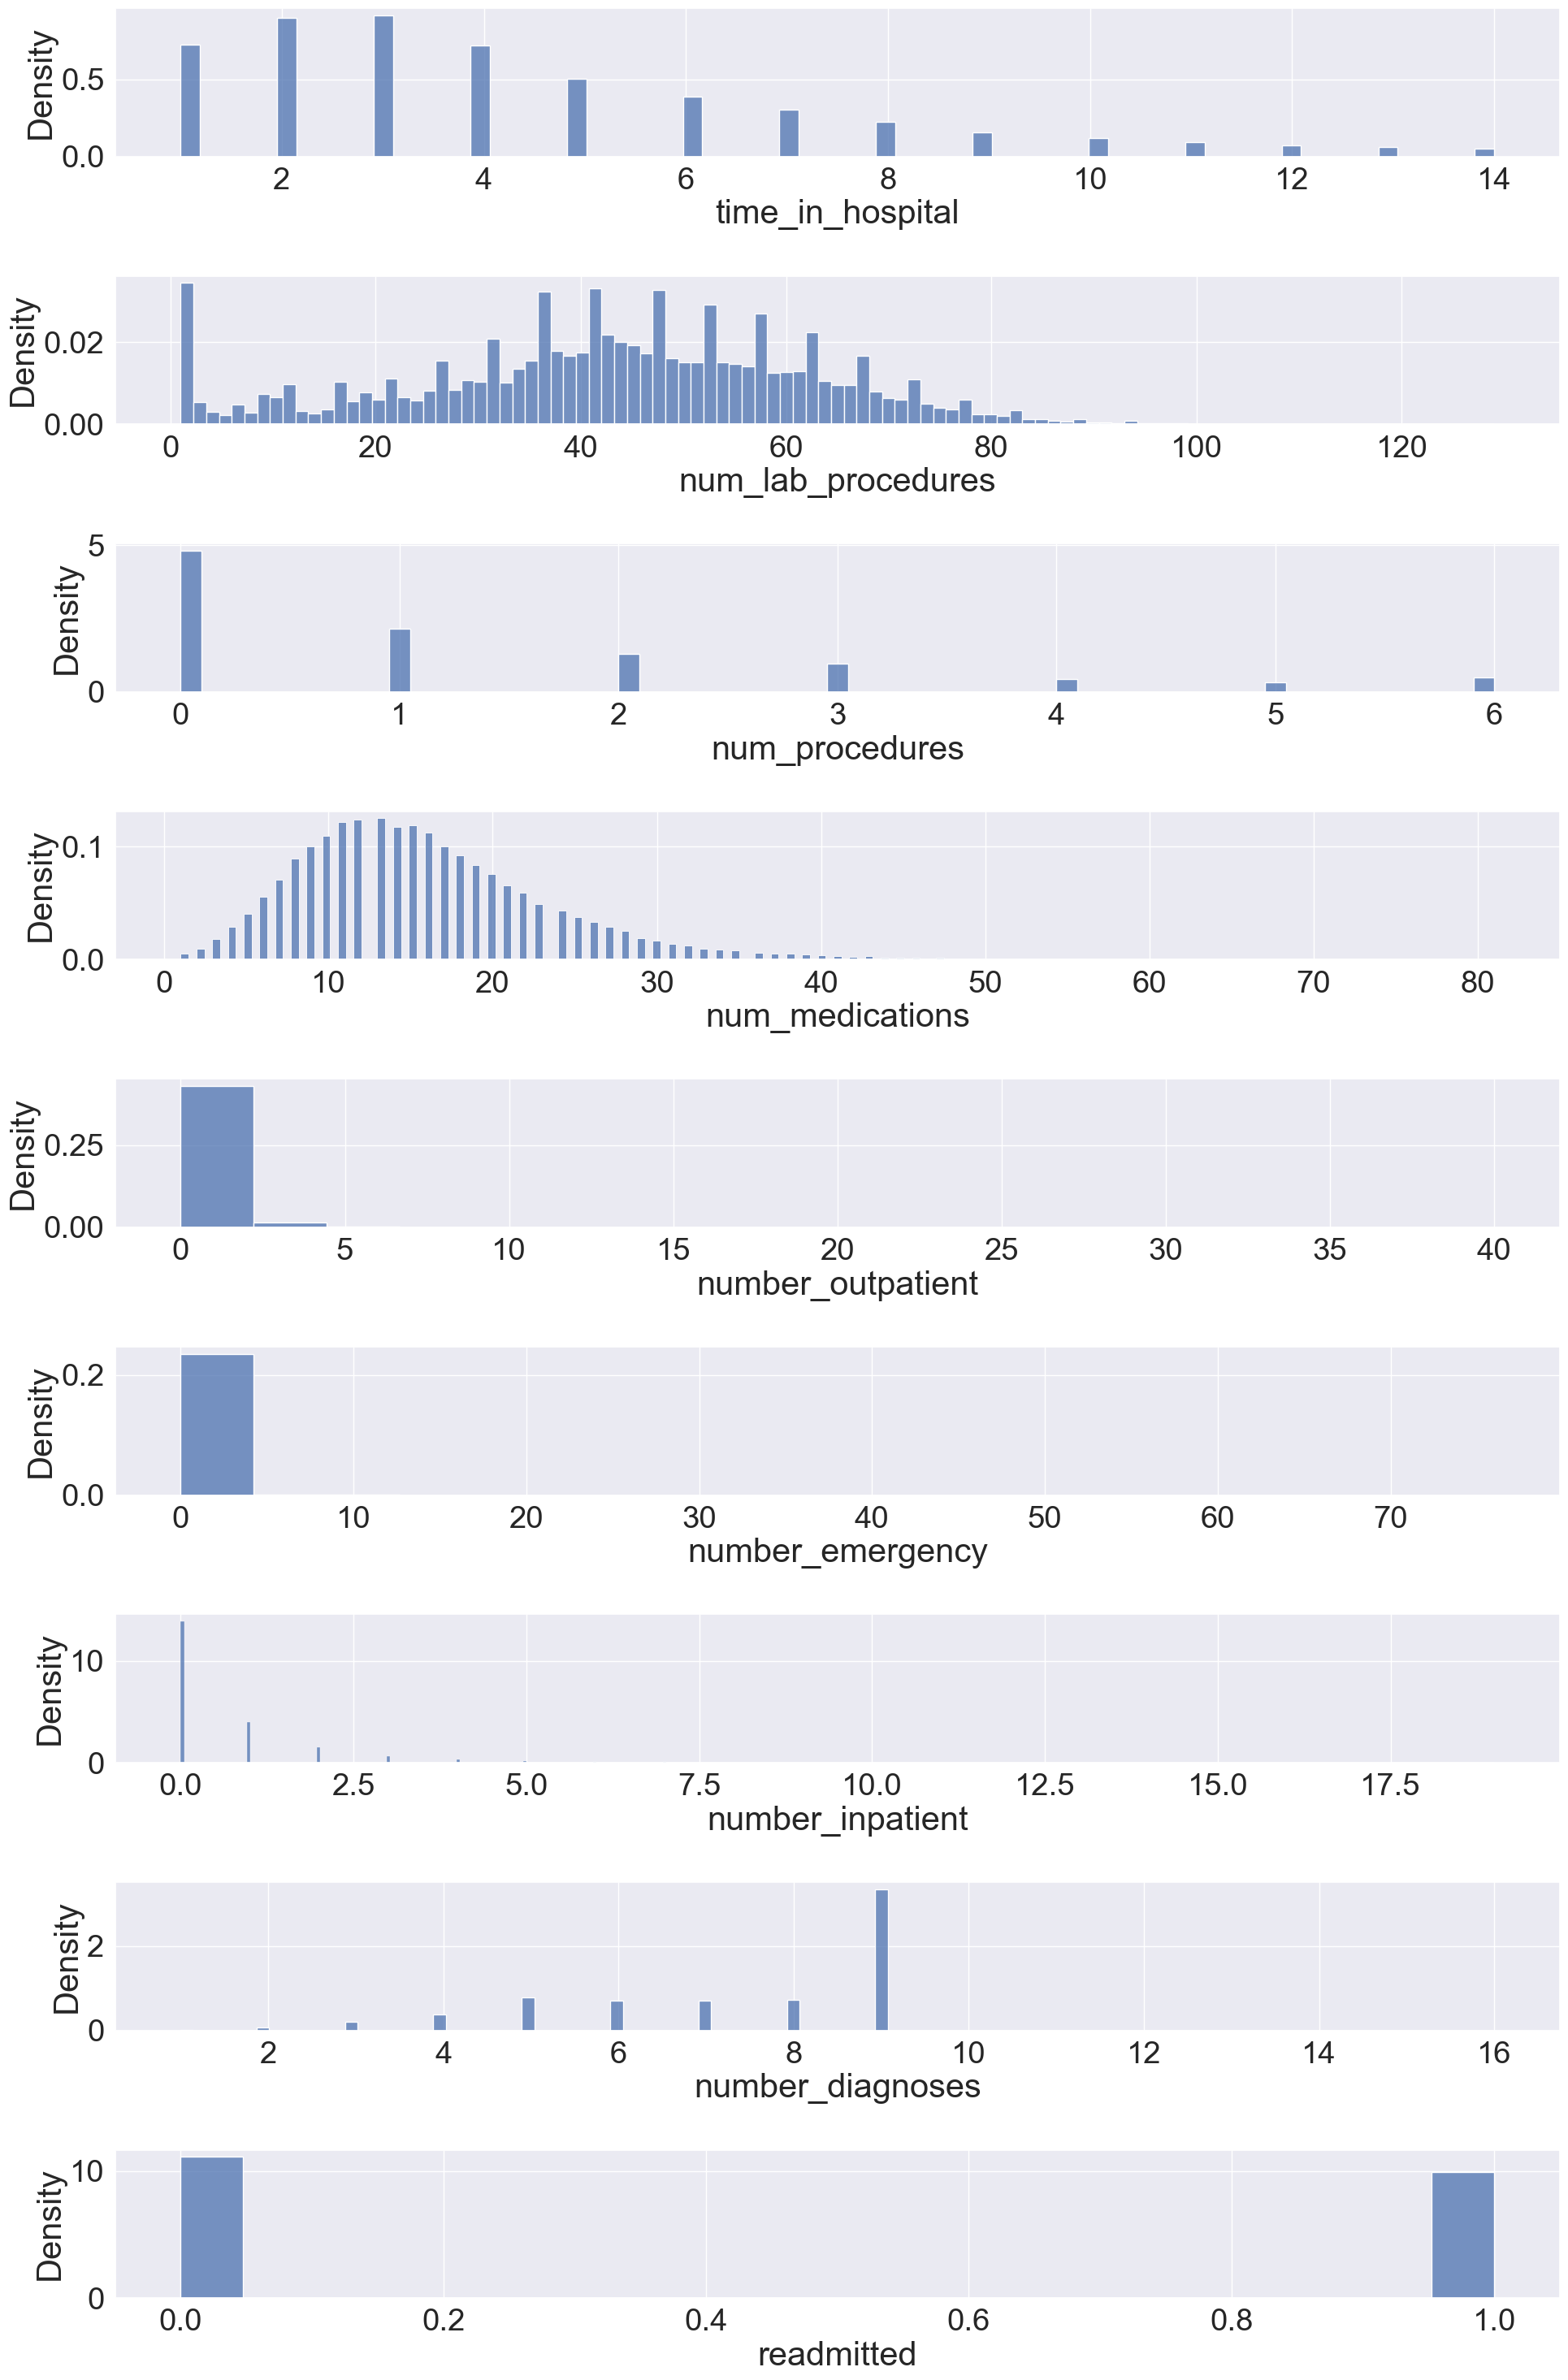

In [155]:
num_feats=[col for col in df_train.columns if df_train[col].dtypes == 'int64' or df_train[col].dtypes == 'float64']

# Plot distribution of numerical columns
fig=plt.figure(figsize=(20,30))
for i, col in enumerate(num_feats):
    plt.subplot(len(num_feats),1,1*i+1)
    sns.histplot(df_train[col], stat='density')
    
fig.tight_layout()
plt.show()

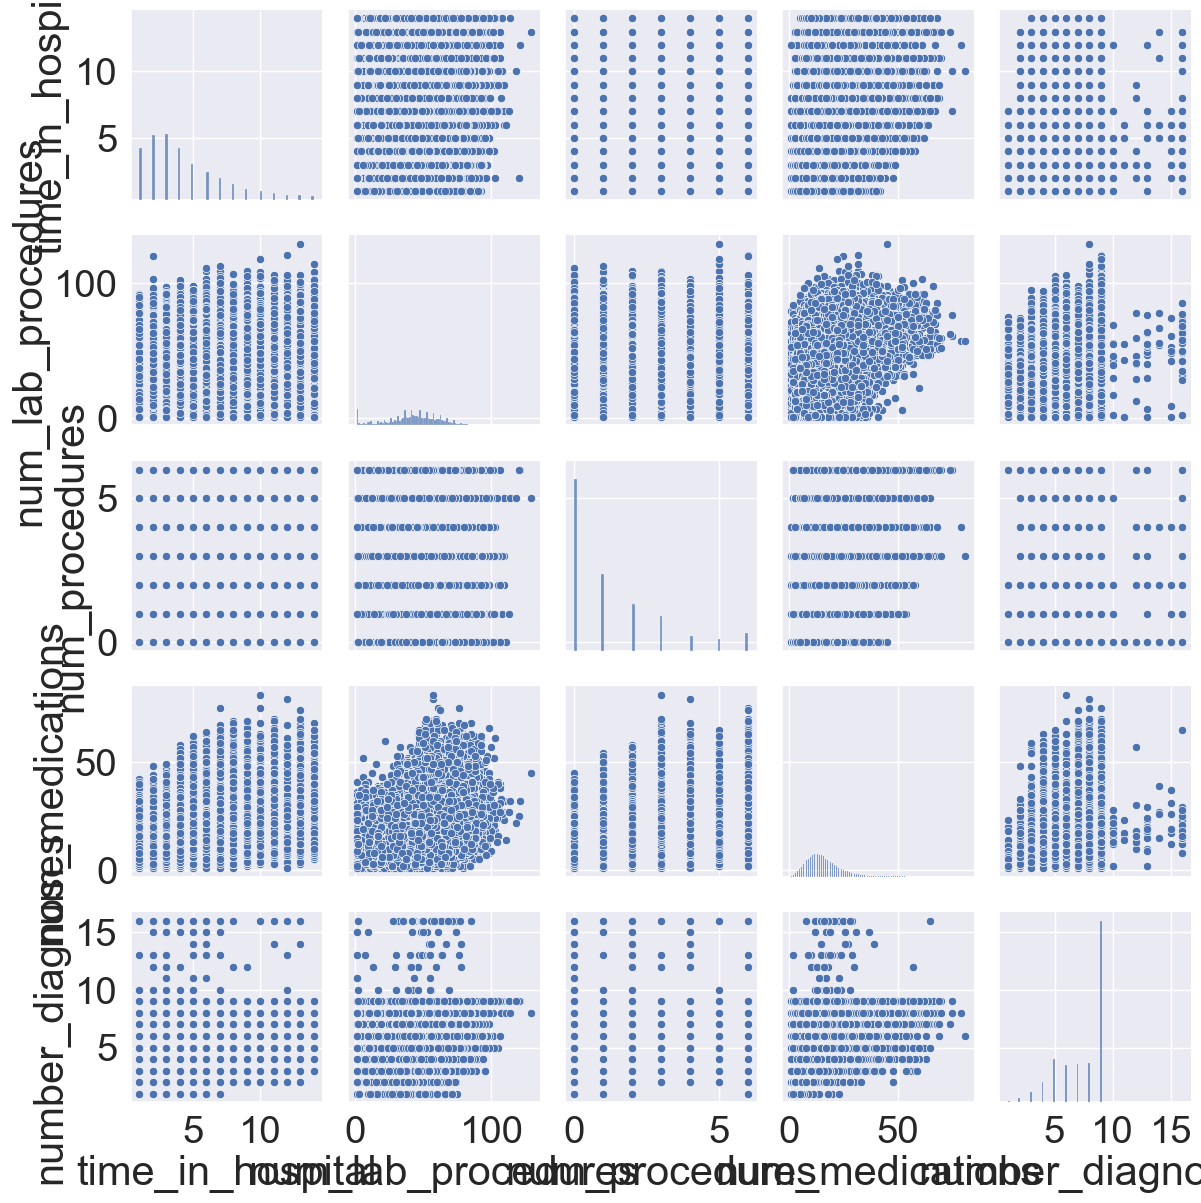

In [49]:
selected_vars = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_diagnoses"]
data_subset = df_train[selected_vars]
sns.pairplot(data_subset)
plt.show()

In [157]:
df_train[num_feats].describe().loc[['min', 'max', 'mean', 'std']].round(2)

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
min               1.00                1.00            0.00             1.00   
max              14.00              129.00            6.00            81.00   
mean              4.38               42.92            1.34            15.98   
std               2.98               19.65            1.71             8.09   

      number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
min                0.00              0.00              0.00              1.00   
max               40.00             76.00             19.00             16.00   
mean               0.37              0.20              0.63              7.40   
std                1.28              0.94              1.27              1.94   

      readmitted  
min         0.00  
max         1.00  
mean        0.47  
std         0.50

In [51]:
def outliers_remover(split, train_df = df_train):
    # df = split.copy()
    aa = []
    count = 0
    for i in range(train_df.shape[1]):
        if train_df.dtypes[i] == 'int64':
            Q3 = train_df.iloc[:, i].quantile(0.75, interpolation='linear')
            Q1 = train_df.iloc[:, i].quantile(0.25, interpolation='linear')
            IQR = Q3 - Q1
            upper = Q3 + 1.5 * IQR
            lower = Q1 - 1.5 * IQR
            for j in range(df.shape[0]):
                if pd.isnull(df.iat[j, i]):
                    continue
                elif split.iat[j, i] > upper or split.iat[j, i] < lower:
                    aa.append(j)
                    count += 1
    split.drop(aa, inplace=True)
    return split



In [52]:
df_train[df_train['num_lab_procedures'] == 129]

race  gender      age admission_type_id discharge_disposition_id  \
13163  Caucasian  Female  [80-90)                 3                        2   

      admission_source_id  time_in_hospital payer_code medical_specialty  \
13163                   2                13         MC  InternalMedicine   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
13163                 129               5               45                  1   

       number_emergency  number_inpatient       diag_1         diag_2  \
13163                 1                 1  Circulatory  Genitourinary   

            diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
13163  Circulatory                 8          Norm        >8        No   

      repaglinide nateglinide chlorpropamide glimepiride acetohexamide  \
13163          No          No             No          No            No   

      glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose  \
13163        No        No          No           No            No       No   

      miglitol troglitazone tolazamide insulin glyburide-metformin  \
13163       No           No         No      No                  No   

      glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
13163                  No                       No                      No   

      metformin-pioglitazone change diabetesMed  readmitted  
13163                     No     No          No           1

In [53]:
df_train[df_train['num_medications'] == 81]

race gender      age admission_type_id discharge_disposition_id  \
43877  Caucasian   Male  [60-70)                 1                        5   

      admission_source_id  time_in_hospital payer_code  \
43877                   1                10         MC   

                     medical_specialty  num_lab_procedures  num_procedures  \
43877  Surgery-Cardiovascular/Thoracic                  57               3   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
43877               81                  0                 0                 0   

            diag_1       diag_2       diag_3  number_diagnoses max_glu_serum  \
43877  Circulatory  Circulatory  Respiratory                 6          Norm   

      A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
43877        >8    Steady          No          No             No          No   

      acetohexamide glipizide glyburide tolbutamide pioglitazone  \
43877            No        No        No          No           No   

      rosiglitazone acarbose miglitol troglitazone tolazamide insulin  \
43877            No       No       No           No         No    Down   

      glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
43877                  No                  No                       No   

      metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
43877                      No                     No     Ch         Yes   

       readmitted  
43877           1

In [54]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
# def preprocess(split, train_df = df_train):


#     # global preprocessing: replace '?' with NA
#     split = replace_unknown(split)
    
#     # global preprocessing: drop columns with >80% NA rate or with a single value. 
#     # the same columns are dropped in the test set cause the model wouldn't be trained on those features
#     less_controversial_cols = ['weight', 'encounter_id', 'examide', 'citoglipton', 'patient_nbr']
#     split = drop_cols(split, cols = less_controversial_cols)

#     # train-set dependent preprocessing: use train-set's column-wise mode to impute missing values
#     split = imputation(split, train_split = train_df)
    
#     # global preprocessing: drop rows with diposition ids of 11,13,14,19,20,21 
#     # related to death or hospice, which cannot be readmitted
#     split = remove_disp_ids(split)

#     # train-set dependent preprocessing: clip categories based on train-set's column-wise, categorical variables' relative proportion
#     split = replace_collapse(split, train_df = df_train)

#     # global preprocessing: encode diagnoses as per the icd code for clipping categories
#     # pdb.set_trace()
#     split = collapse_diag_123(split)

#     # global preprocessing: binarize labels converting >30, <30 to 1, else 0
#     split = binarize_labels(split)

#     # global preprocessing: convert the object data type into categorical data type
#     categorical_vars = [col for col in split.columns if split[col].dtypes == 'object']
#     split = cast_category(split, train_cat_vars=categorical_vars)
   
#     # # train-set dependent preprocessing: outlier removal based on inter-quantile ranges in train-set.
#     # split = outliers_remover(split, train_df = df_train)


#     return split

def preprocess(split, train_df = df_train):


    # global preprocessing: replace '?' with NA
    split = replace_unknown(split)
    
    # global preprocessing: drop columns with >80% NA rate or with a single value. 
    # the same columns are dropped in the test set cause the model wouldn't be trained on those features
    less_controversial_cols = ['weight', 'encounter_id', 'examide', 'citoglipton', 'patient_nbr']
    split = drop_cols(split, cols = less_controversial_cols)

    # train-set dependent preprocessing: use train-set's column-wise mode to impute missing values
    split = imputation(split, train_split = train_df)

    

    # global preprocessing: drop rows with diposition ids of 11,13,14,19,20,21 
    # related to death or hospice, which cannot be readmitted
    split = remove_disp_ids(split)

    # train-set dependent preprocessing: clip categories based on train-set's column-wise, categorical variables' relative proportion
    split = replace_collapse(split, train_df = df_train)

    # global preprocessing: encode diagnoses as per the icd code 
    # pdb.set_trace()
    split = collapse_diag_123(split)

    # global preprocessing: binarize labels converting >30, <30 to 1, else 0
    split = binarize_labels(split)
    
    # global preprocessing: convert the object data type into categorical data type
    categorical_vars = [col for col in split.columns if split[col].dtypes == 'object']
    split = cast_category(split, train_cat_vars=categorical_vars)
   
    # # train-set dependent preprocessing: outlier removal based on inter-quantile ranges in train-set.
    # split = outliers_remover(split, train_df = df_train)
    
    # global preprocessing: one-hot encode categorical variables
    # split = one_hot_encode(split)
    
    # # train-set dependent preprocessing: pad missing categories with 0
    # missing_cats = [cat for cat in train_df_categories if cat not in split.columns]
    # split[missing_cats] = 0
    # split = split.reindex(columns = train_df.columns)

    X_split = split.loc[:, split.columns != 'readmitted']
    y_split = split['readmitted']
    
    return split, X_split, y_split


In [55]:
# df['readmitted']

In [56]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
# df = df.head(420)
df_train, df_val, df_test = train_val_test_split(df)

In [57]:
df_train_preprocessed, X_train, y_train = preprocess(split=df_train, train_df=df_train)
df_val_preprocessed, X_val, y_val = preprocess(split=df_val, train_df=df_train)
df_test_preprocessed, X_test, y_test = preprocess(split=df_test, train_df=df_train)

print(df_train_preprocessed.shape)
# df_val = preprocess(split=df_val, train_df=df_train)
# df_test = preprocess(split=df_test, train_df=df_train)

(71771, 45)


In [58]:
print(df_val_preprocessed.shape)

(12668, 45)


In [59]:
print(df_test_preprocessed.shape)

(14904, 45)


In [60]:

def one_hot_encode(split, train_df = X_train):

    cats = [col for col in train_df.columns if train_df[col].dtypes == "category"]

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # pad categories which values coincidentally don't appear in val/test sets
    encoder.fit(train_df[cats])
    split_encoded = encoder.transform(split[cats])
    encoded_cols = encoder.get_feature_names_out(cats)
    split_encoded_df = pd.DataFrame(split_encoded, columns=encoded_cols)

    split_final = pd.concat([split.reset_index(drop=True), split_encoded_df], axis=1).drop(cats, axis=1)
    
    return split_final

In [61]:
X_train_encoded = one_hot_encode(X_train, train_df = X_train)
X_val_encoded = one_hot_encode(X_val, train_df = X_train)
X_test_encoded = one_hot_encode(X_test, train_df = X_train)


In [62]:
def drop_corr(split, train_df_ohe = X_train_encoded):
    # think later on computing this once
    # Calculate the correlation matrix on training data
    correlation_matrix = train_df_ohe.corr().abs()
    
    # Select upper triangle of correlation matrix
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
    
    # Find index of feature columns with correlation greater than 0.8
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    
    # drop columns on split based on training data's correlation scroes
    split = split.drop(to_drop, axis = 1)
    
    return split, to_drop

In [63]:
X_train_encoded_drop_corr, to_drop = drop_corr(X_train_encoded, X_train_encoded)
X_val_encoded.drop(to_drop, axis = 1, inplace=True)
X_test_encoded.drop(to_drop, axis = 1, inplace=True)

In [64]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter=30)

feat_selector.fit(X_train_encoded_drop_corr.values, y_train)

X_filtered = feat_selector.transform(X_train_encoded_drop_corr.values)
selected_features = X_train_encoded_drop_corr.columns[feat_selector.support_].tolist()
X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)



Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	193
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	37
Tentative: 	18
Rejected: 	138
Iteration: 	9 / 30
Confirmed: 	37
Tentative: 	18
Rejected: 	138
Iteration: 	10 / 30
Confirmed: 	37
Tentative: 	18
Rejected: 	138
Iteration: 	11 / 30
Confirmed: 	37
Tentative: 	18
Rejected: 	138
Iteration: 	12 / 30
Confirmed: 	37
Tentative: 	14
Rejected: 	142
Iteration: 	13 / 30
Confirmed: 	37
Tentative: 	14
Rejected: 	142
Iteration: 	14 / 30
Confirmed: 	37
Tentative: 	14
Rejected: 	142
Iteration: 	15 / 30
Confirmed: 	37
Tentative: 	14
Rejected: 	142
Iteration: 	16 / 30
Confirmed: 	37
Tentative: 	1

In [65]:
selected_features_manual = ['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'age_[70-80)',
 'age_[80-90)',
 'admission_type_id_0',
 'admission_type_id_1',
 'admission_type_id_3',
 'discharge_disposition_id_0',
 'discharge_disposition_id_2',
 # 'admission_source_id_0',
 'admission_source_id_1',
 'admission_source_id_3',
 'admission_source_id_4',
#  'payer_code_BC',
#  'payer_code_MC',
#  'medical_specialty_?',
 'medical_specialty_Emergency/Trauma',
 'medical_specialty_ObstetricsandGynecology',
 'medical_specialty_Orthopedics-Reconstructive',
 'diag_1_Musculoskeletal',
 'diag_1_Neoplasms',
 'diag_2_Diabetes',
 'diag_2_Unclassified',
 'diag_3_Diabetes',
 'diag_3_Genitourinary',
 'metformin_No',
 'insulin_Down',
 'insulin_No',
 'insulin_Up',
 'change_Ch',
 'diabetesMed_No']

In [66]:
X_val_encoded[selected_features]

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                     3                  45               0               11   
1                     4                  82               0               27   
2                     2                  24               2               13   
...                 ...                 ...             ...              ...   
12665                 3                  63               1               15   
12666                 8                  55               1               27   
12667                 7                  41               4               21   

       number_outpatient  number_emergency  number_inpatient  \
0                      1                 0                 0   
1                      0                 0                 0   
2                      1                 0                 0   
...                  ...               ...               ...   
12665                  0                 0                 0   
12666                  0                 0                 0   
12667                  0                 0                 0   

       number_diagnoses  age_[70-80)  age_[80-90)  admission_type_id_0  \
0                     3          0.0          0.0                  0.0   
1                     9          1.0          0.0                  1.0   
2                     8          0.0          0.0                  0.0   
...                 ...          ...          ...                  ...   
12665                 9          0.0          0.0                  0.0   
12666                 9          0.0          0.0                  1.0   
12667                 7          0.0          0.0                  0.0   

       admission_type_id_1  admission_type_id_3  discharge_disposition_id_0  \
0                      0.0                  1.0                         1.0   
1                      0.0                  0.0                         0.0   
2                      1.0                  0.0                         1.0   
...                    ...                  ...                         ...   
12665                  1.0                  0.0                         1.0   
12666                  0.0                  0.0                         0.0   
12667                  1.0                  0.0                         1.0   

       discharge_disposition_id_2  admission_source_id_0  \
0                             0.0                    1.0   
1                             0.0                    1.0   
2                             0.0                    0.0   
...                           ...                    ...   
12665                         0.0                    0.0   
12666                         1.0                    1.0   
12667                         0.0                    0.0   

       admission_source_id_1  admission_source_id_3  admission_source_id_4  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        1.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12665                    1.0                    0.0                    0.0   
12666                    0.0                    0.0                    0.0   
12667                    1.0                    0.0                    0.0   

       payer_code_BC  payer_code_MC  medical_specialty_?  \
0                0.0            0.0                  0.0   
1                0.0            0.0                  1.0   
2                0.0            0.0                  0.0   
...              ...            ...                  ...   
12665            0.0            0.0                  0.0   
12666            0.0            0.0                  1.0   
12667            0.0            0.0                  0.0   

       medical_specialty_Emergency/Traum

In [67]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
# df = df.head(420)
df_train, df_val, df_test = train_val_test_split(df)

In [68]:


def preprocess_pipeline_training(train_df = df_train, selected_features = selected_features_manual):
    df_train_preprocessed, X_train, y_train = preprocess(split=train_df, train_df=train_df)
    X_train_encoded = one_hot_encode(X_train, train_df = X_train)
    X_train_encoded_drop_corr, to_drop = drop_corr(X_train_encoded, X_train_encoded)

    # rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    # feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter=30)

    # feat_selector.fit(X_train_encoded_drop_corr.values, y_train)

    # X_filtered = feat_selector.transform(X_train_encoded_drop_corr.values)
    # selected_features = X_train_encoded_drop_corr.columns[feat_selector.support_].tolist()
    # X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)
    # pdb.set_trace()
    X_filtered_df = X_train_encoded_drop_corr[selected_features]
    return X_filtered_df, y_train, X_train, to_drop, df_train_preprocessed, selected_features

def preprocess_pipeline_val_test(split, train_df = df_train, X_train = X_train, to_drop = to_drop, selected_features = selected_features_manual):
    df_split_preprocessed, X_split, y_split = preprocess(split=split, train_df=train_df)
    X_split_encoded = one_hot_encode(X_split, train_df = X_train)
    X_split_encoded = X_split_encoded.drop(to_drop, axis = 1)
    X_split_encoded = X_split_encoded[selected_features]
    return X_split_encoded, y_split, df_split_preprocessed


In [69]:

X_train_encoded_drop_corr_selected, y_train, X_train, to_drop, df_train_preprocessed, selected_features = preprocess_pipeline_training(train_df=df_train)
X_val_encoded, y_val, df_val_preprocessed = preprocess_pipeline_val_test(df_val, train_df=df_train, X_train = X_train, to_drop = to_drop, selected_features=selected_features)
X_test_encoded, y_test, df_test_preprocessed = preprocess_pipeline_val_test(df_test, train_df=df_train, X_train = X_train, to_drop = to_drop, selected_features=selected_features)


In [70]:
assert X_train_encoded_drop_corr_selected.shape[1] == X_val_encoded.shape[1]
assert X_train_encoded_drop_corr_selected.shape[1] == X_test_encoded.shape[1]

# assert X_val.shape[1] == X_train.shape[1]
# # skim(X_val)
# len(X_train.columns)
# skim(X_train_encoded.head(5))

In [71]:
train_columns = set(X_train_encoded_drop_corr_selected.columns)
valid_columns = set(X_val_encoded.columns)
test_columns = set(X_test_encoded.columns)

# Identify missing variables in the validation set
missing_variables = train_columns - valid_columns
test_missing_variables = train_columns - test_columns

print("Variables missing in validation set:", missing_variables)
print("Variables missing in validation set:", test_missing_variables)

Variables missing in validation set: set()
Variables missing in validation set: set()


In [72]:
# skim(df_train_preprocessed)
# df_train['A1Cresult']
# skim(df_test_preprocessed)

# Task 3: Cross Validation

In [73]:
# %load_ext autoreload
# %autoreload 2

In [74]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [75]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df = df.head(4200)
df_train_val, df_test = train_test_split(df, test_size=0.20, random_state=42)

def perform_cross_validation(model, hyperparameters, df_train_val = df_train_val, df_test = df_test, precomputed = False):
    
    # X_test_encoded, y_test, _ = preprocess_pipeline_val_test(df_test, train_df=df_train_val, X_train = X_train_val, to_drop = to_drop)
  

    cv_scores_per_hparam = []
    cv_scores_per_hparam_auc = []
    cv_scores_per_hparam_logloss = []
    test_scores = []
    test_scores_auc = []
    test_scores_logloss = []


    k_folds = 3
    kf = KFold(n_splits=k_folds)

    for hparam in hyperparameters:
        cv_scores = []
        cv_scores_auc = []
        cv_scores_logloss = []

        for train_index, val_index in kf.split(df_train_val):
            # Get 2 folds for training and 1 fold for validation
            fold_df_train, fold_df_val = df_train_val.iloc[train_index], df_train_val.iloc[val_index]

            # preprocess training folds
            fold_X_train_encoded_drop_corr, fold_y_train, fold_X_train, fold_to_drop, _, _ = preprocess_pipeline_training(train_df=fold_df_train, selected_features=selected_features_manual)
            
            # preprocess validation fold separately
            fold_X_val_encoded, fold_y_val, _ = preprocess_pipeline_val_test(fold_df_val, train_df=fold_df_train, X_train = fold_X_train, to_drop = fold_to_drop, selected_features=selected_features_manual)

            model_instance = model(**hparam)  # Create model instance with given hyperparameters
            
            if precomputed:
                scaler = StandardScaler()
                fold_X_train_scaled = scaler.fit_transform(fold_X_train_encoded_drop_corr)
                gram_matrix = np.dot(fold_X_train_scaled, fold_X_train_scaled.T)
                model_instance.fit(gram_matrix, fold_y_train)
                gram_matrix_val = np.dot(scaler.transform(fold_X_val_encoded), fold_X_train_scaled.T)
                y_pred_val = model_instance.predict_proba(gram_matrix_val)[:, 1] # index class one
                y_pred_val_binarized = (y_pred_val > 0.5).astype(int)               # binarize class 1

            else:
                model_instance.fit(fold_X_train_encoded_drop_corr, fold_y_train)
                y_pred_val = model_instance.predict_proba(fold_X_val_encoded)[:, 1] # index class one
                # pdb.set_trace()
                y_pred_val_binarized = (y_pred_val > 0.5).astype(int)               # binarize class 1
            # pdb.set_trace()
            cv_score = f1_score(fold_y_val, y_pred_val_binarized)
            cv_scores.append(cv_score)
            cv_scores_auc.append(roc_auc_score(fold_y_val, y_pred_val))
            cv_scores_logloss.append(log_loss(fold_y_val, y_pred_val))

        cv_scores_per_hparam.append(cv_scores)
        cv_scores_per_hparam_auc.append(cv_scores_auc)
        cv_scores_per_hparam_logloss.append(cv_scores_logloss)

        # pdb.set_trace()
        X_test_encoded, y_test, _ = preprocess_pipeline_val_test(df_test, train_df=df_train_val, X_train = fold_X_train, to_drop = fold_to_drop, selected_features=selected_features_manual)

        # Evaluate on test set
        # record test scores per hyperparameter. pretend that i only 'see' the test scores of hparam with
        # highest inner CV score
        if precomputed:
            gram_matrix_test = np.dot(scaler.transform(X_test_encoded), fold_X_train_scaled.T)
            y_pred_test = model_instance.predict_proba(gram_matrix_test)[:, 1]
            y_pred_test_binarized = (y_pred_test > 0.5).astype(int)
        else:
            y_pred_test = model_instance.predict_proba(X_test_encoded)[:, 1]
            y_pred_test_binarized = (y_pred_test > 0.5).astype(int)
        test_score = f1_score(y_test, y_pred_test_binarized)
        test_scores.append(test_score)
        test_scores_auc.append(roc_auc_score(y_test, y_pred_test))
        test_scores_logloss.append(log_loss(y_test, y_pred_test))

    return cv_scores_per_hparam, cv_scores_per_hparam_auc, cv_scores_per_hparam_logloss, test_scores, test_scores_auc, test_scores_logloss

In [76]:
def plot_cv(cv_scores, hparam_names, model_name, hparam_name, metric_name):

    xlabel = model_name + ' hyperparameter ' + hparam_name
    ylabel = 'Mean CV ' + metric_name + ' Score'
    mean_scores = [np.mean(scores) for scores in cv_scores]
    std_scores = [np.std(scores) for scores in cv_scores]

    # Plotting the mean cross-validation performance with standard deviation
    plt.figure(figsize=(18, 13))
    plt.errorbar(range(len(cv_scores)), mean_scores, yerr=std_scores, fmt='o', color='b', ecolor='r', capsize=5)
    plt.plot(range(len(cv_scores)), mean_scores)
    for i, (mean_score, std_score) in enumerate(zip(mean_scores, std_scores)):
        plt.text(i, mean_score, f'{mean_score:.2f} +/- {std_score:.2f}', ha='center', va='bottom', fontsize=20)

    plt.xticks(range(len(cv_scores)), hparam_names)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Mean Cross-Validation Performance with Standard Deviation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Linear SVM classifier

In [77]:
# df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
svm_hparams = [{'C':0.042, 'probability': True, 'kernel':'linear'},
               {'C':0.42, 'probability': True, 'kernel':'linear'},
               {'C': 4.2, 'probability': True, 'kernel':'linear'}, 
               {'C':42, 'probability': True, 'kernel':'linear'},
               # {'C':420, 'probability': True, 'kernel':'precomputed'}
               ]
# model_svm = svm.SVC(probability=True)
cv_scores_per_hparam_svm, cv_scores_per_hparam_auc_svm, cv_scores_per_hparam_logloss_svm, test_scores_svm, test_scores_auc_svm, test_scores_logloss_svm = perform_cross_validation(model=svm.SVC, hyperparameters=svm_hparams, df_train_val=df_train_val, df_test = df_test, precomputed=False)

In [78]:
# print(cv_scores_per_hparam_svm)
# print(cv_scores_per_hparam_auc_svm)
# print(cv_scores_per_hparam_logloss_svm)
print(test_scores_svm)
print(test_scores_auc_svm)
print(test_scores_logloss_svm)

[0.649064906490649, 0.6564551422319476, 0.6571428571428571, 0.6473859844271412]
[0.6350212468780702, 0.644508362629168, 0.6467514174449297, 0.646786927547554]
[0.6620530638123238, 0.6566499580048962, 0.6553691902875063, 0.6554895862696525]


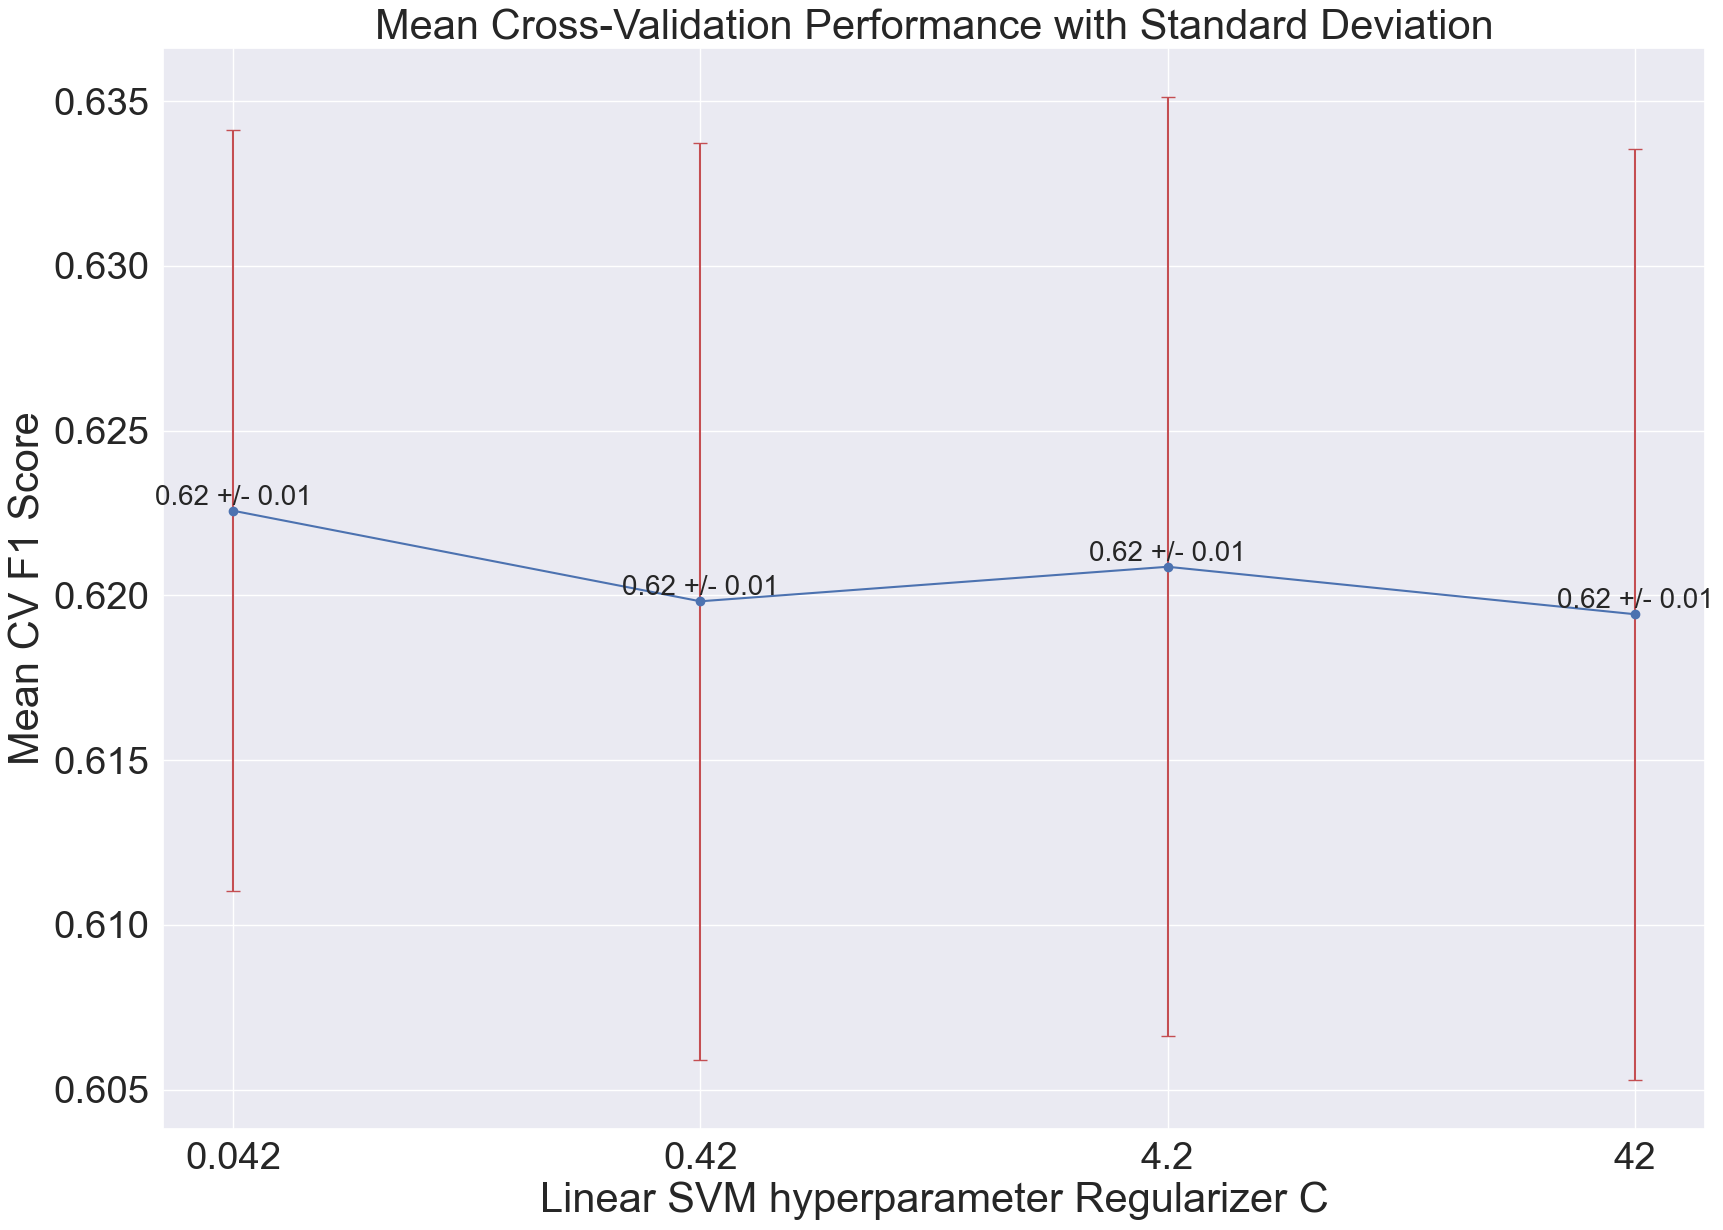

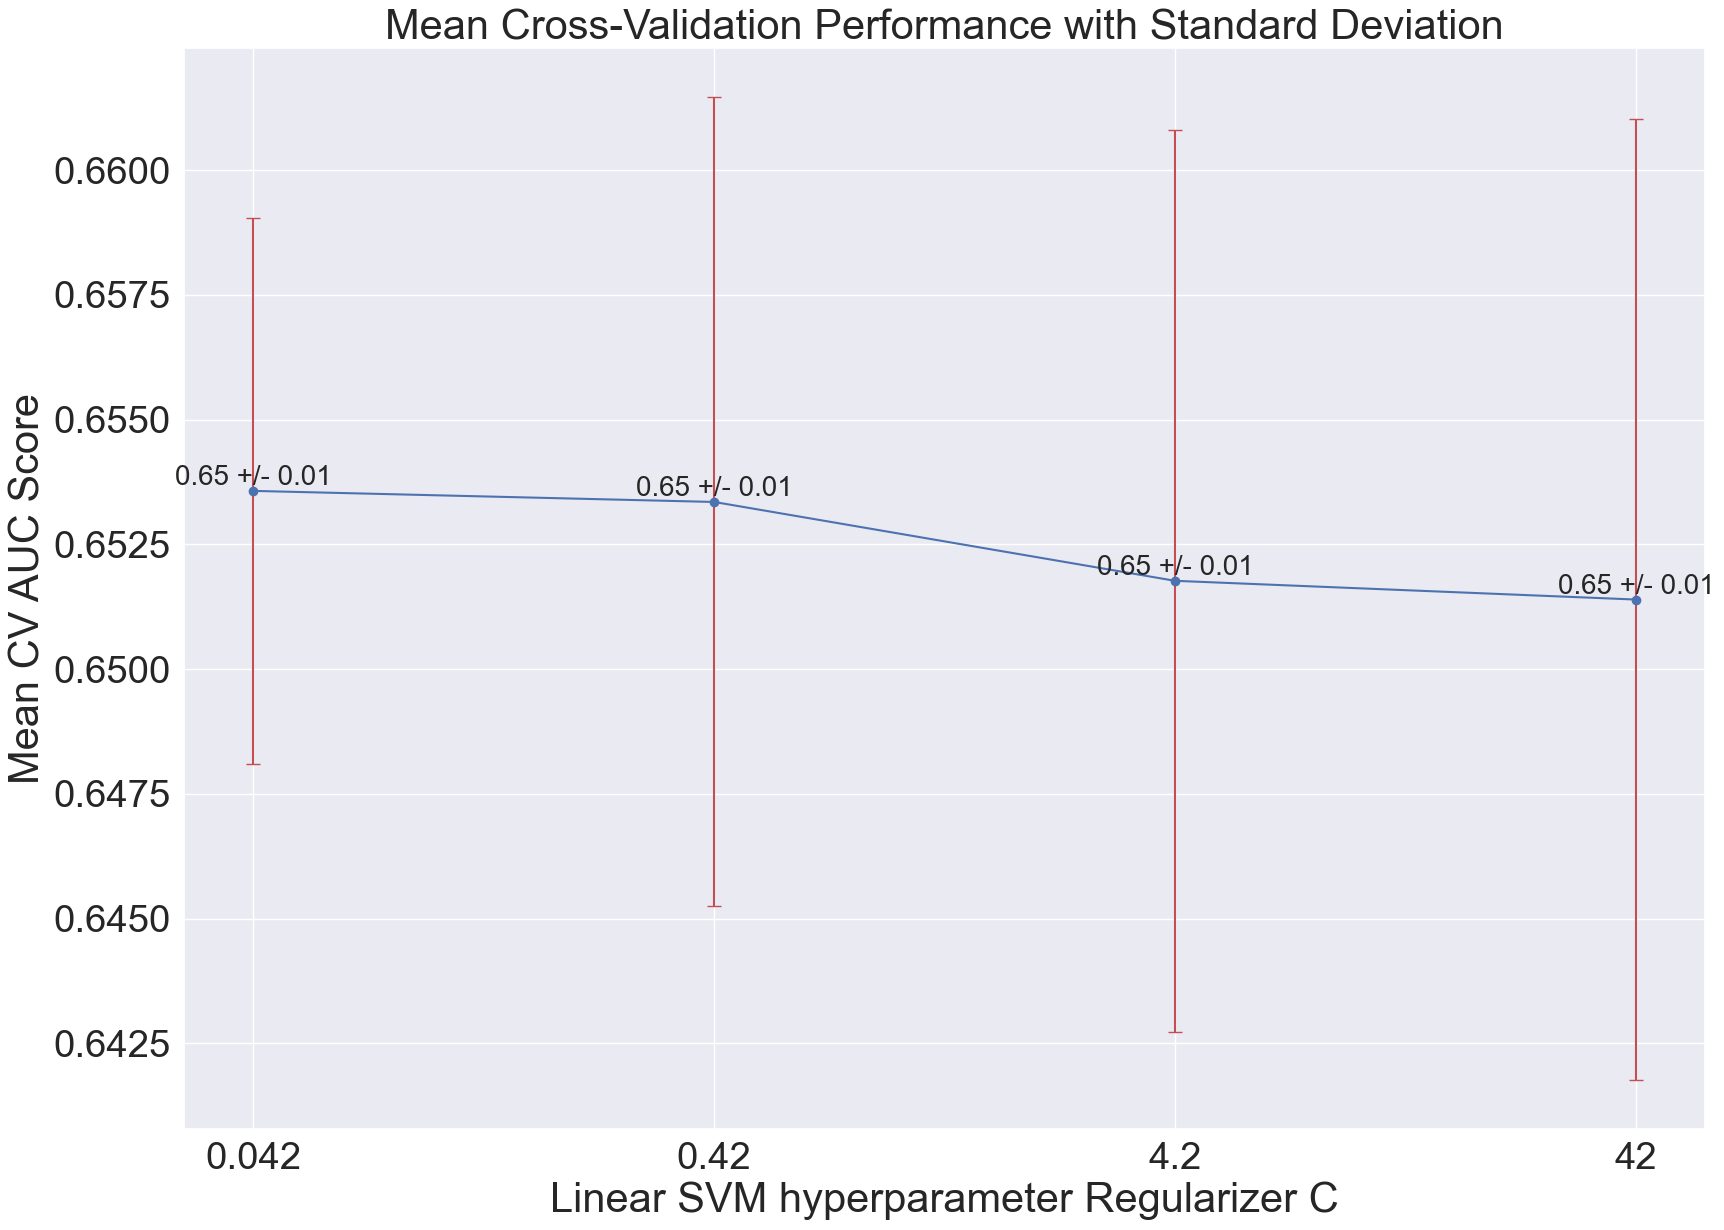

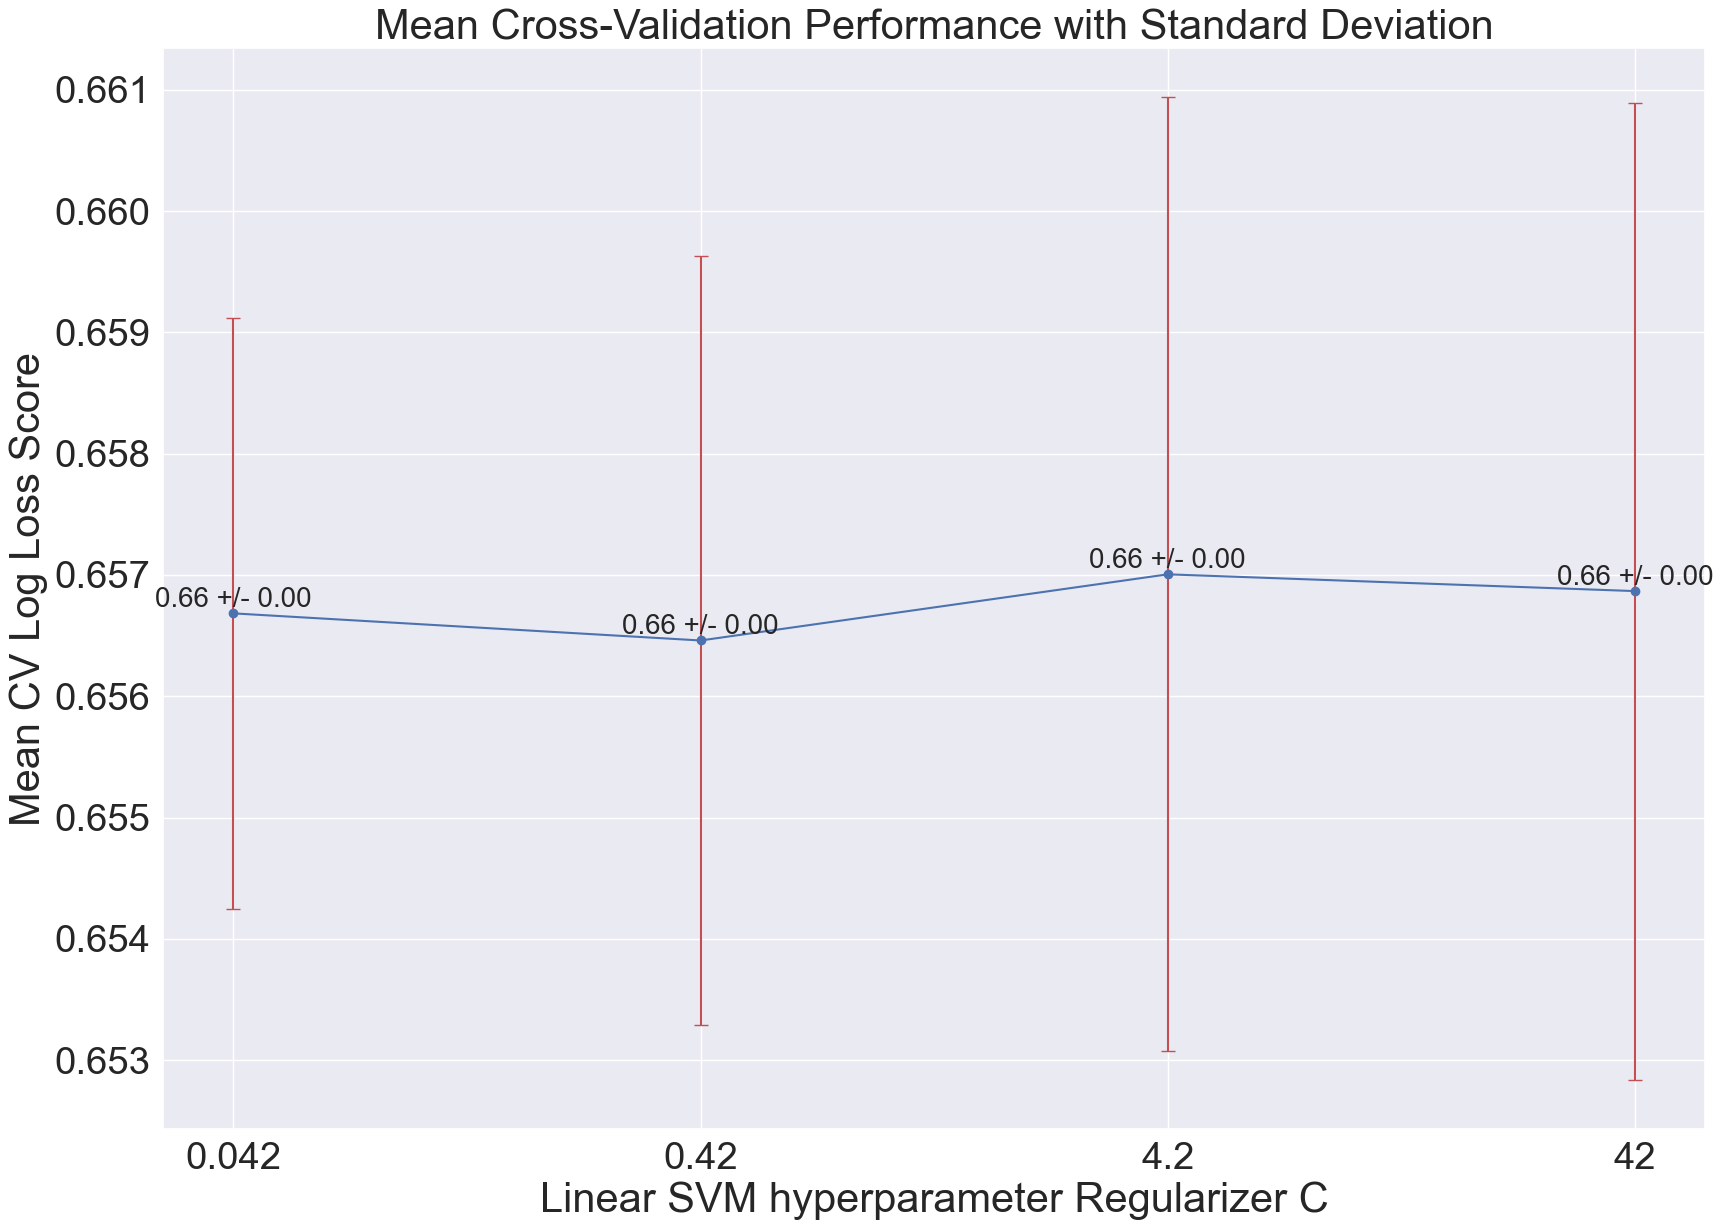

In [79]:
hparam_names = [i['C'] for i in svm_hparams]
plot_cv(cv_scores_per_hparam_svm, hparam_names, 'Linear SVM', 'Regularizer C', 'F1')
plot_cv(cv_scores_per_hparam_auc_svm, hparam_names, 'Linear SVM', 'Regularizer C', 'AUC')
plot_cv(cv_scores_per_hparam_logloss_svm, hparam_names, 'Linear SVM', 'Regularizer C', 'Log Loss')

#### Logistic regression

In [80]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
logreg_hparams = [{'C':0.042},
               {'C':0.42},
               {'C': 4.2}, 
               {'C':42},
               {'C':420}]
cv_scores_per_hparam_logreg, cv_scores_per_hparam_auc_logreg, cv_scores_per_hparam_logloss_logreg, test_scores_logreg, test_scores_auc_logreg, test_scores_logloss_logreg = perform_cross_validation(model=LogisticRegression, hyperparameters=logreg_hparams, df_train_val=df_train_val, df_test = df_test)

/Users/awxlong/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/awxlong/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

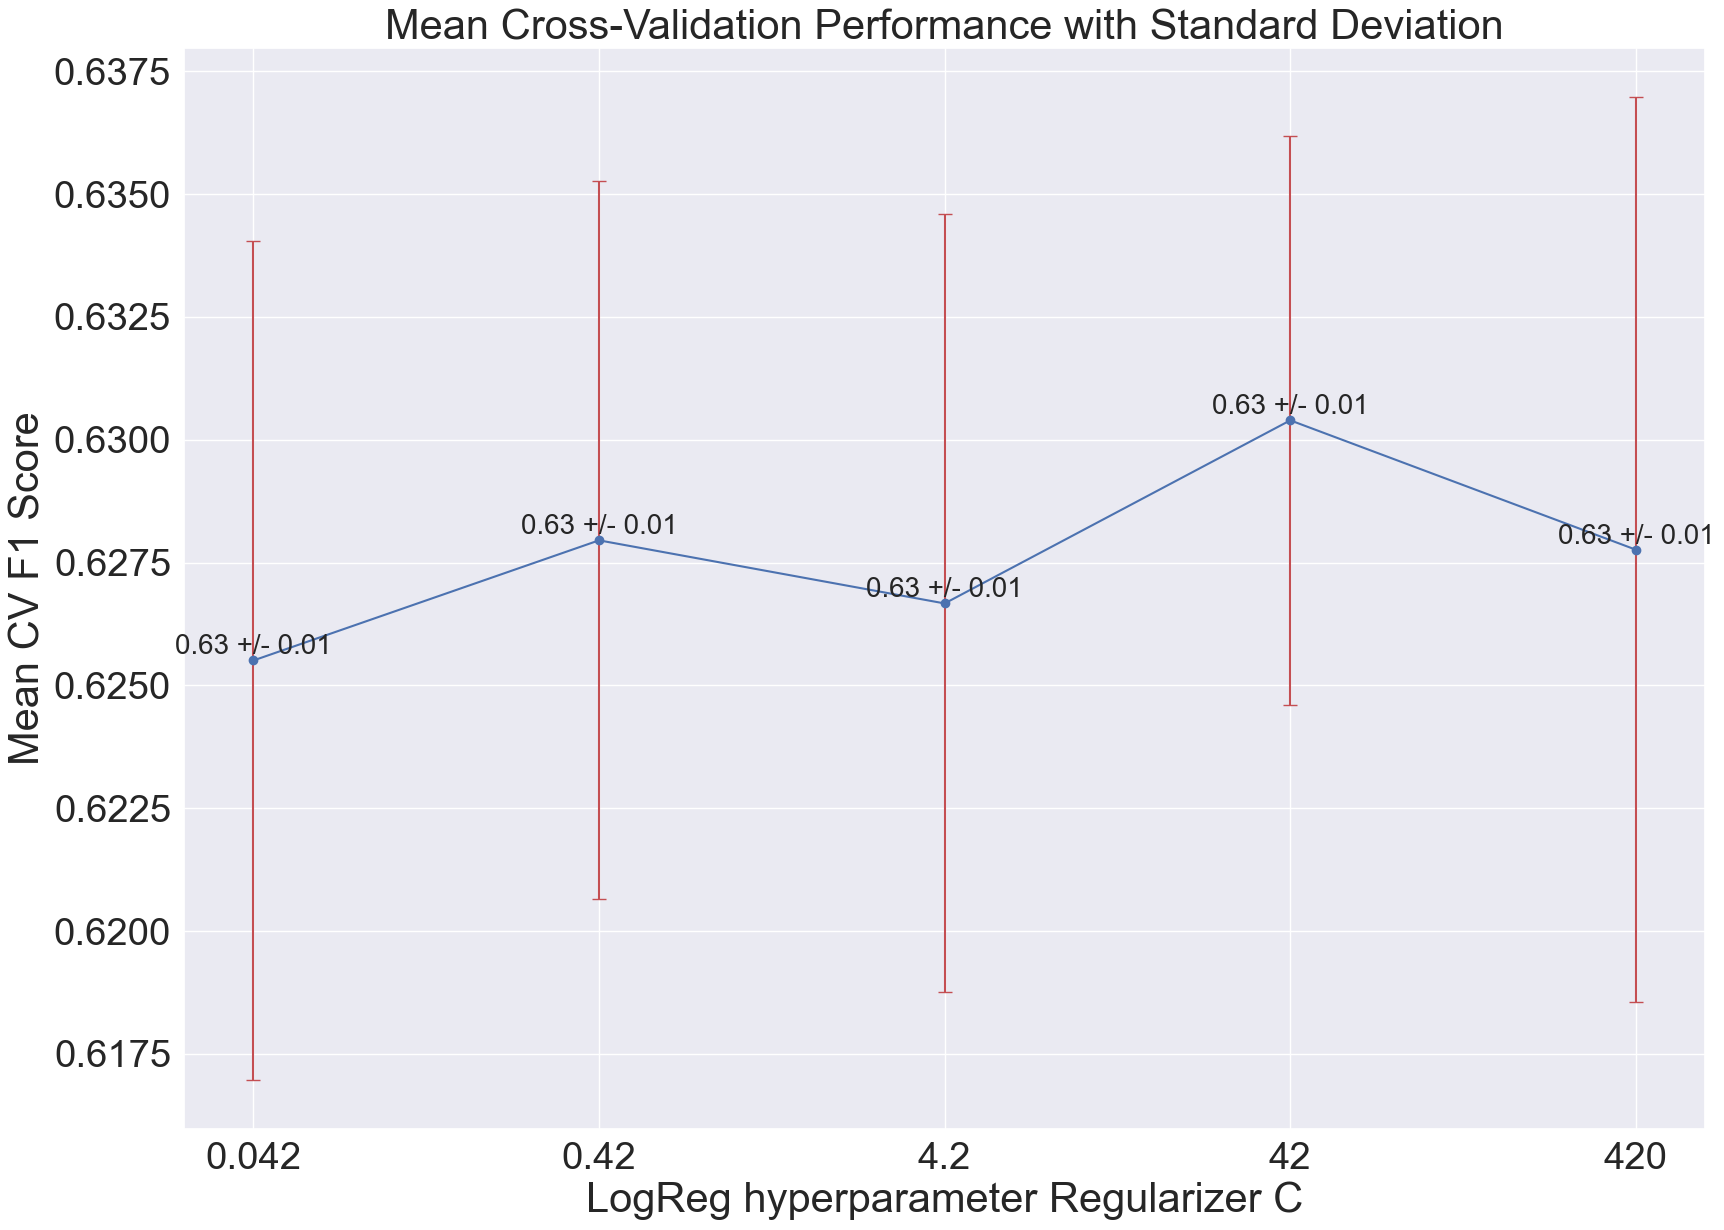

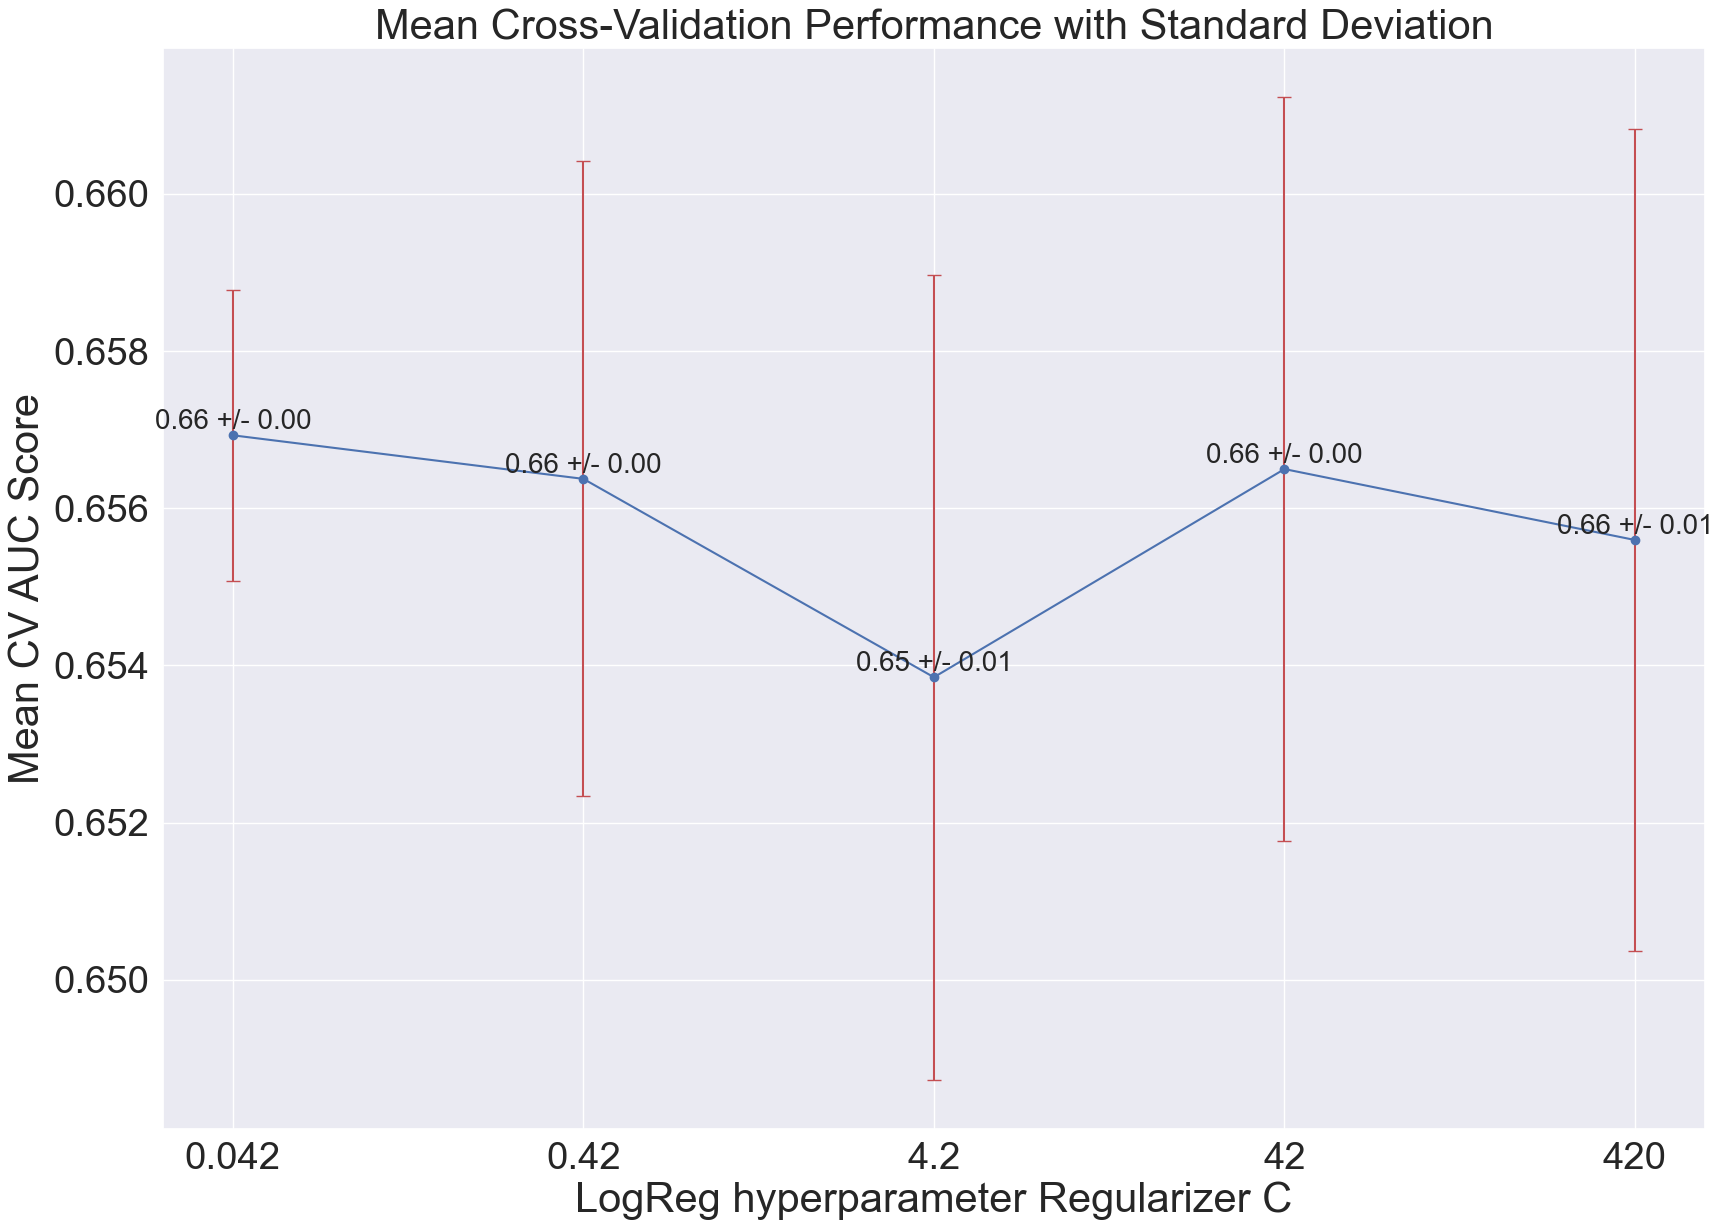

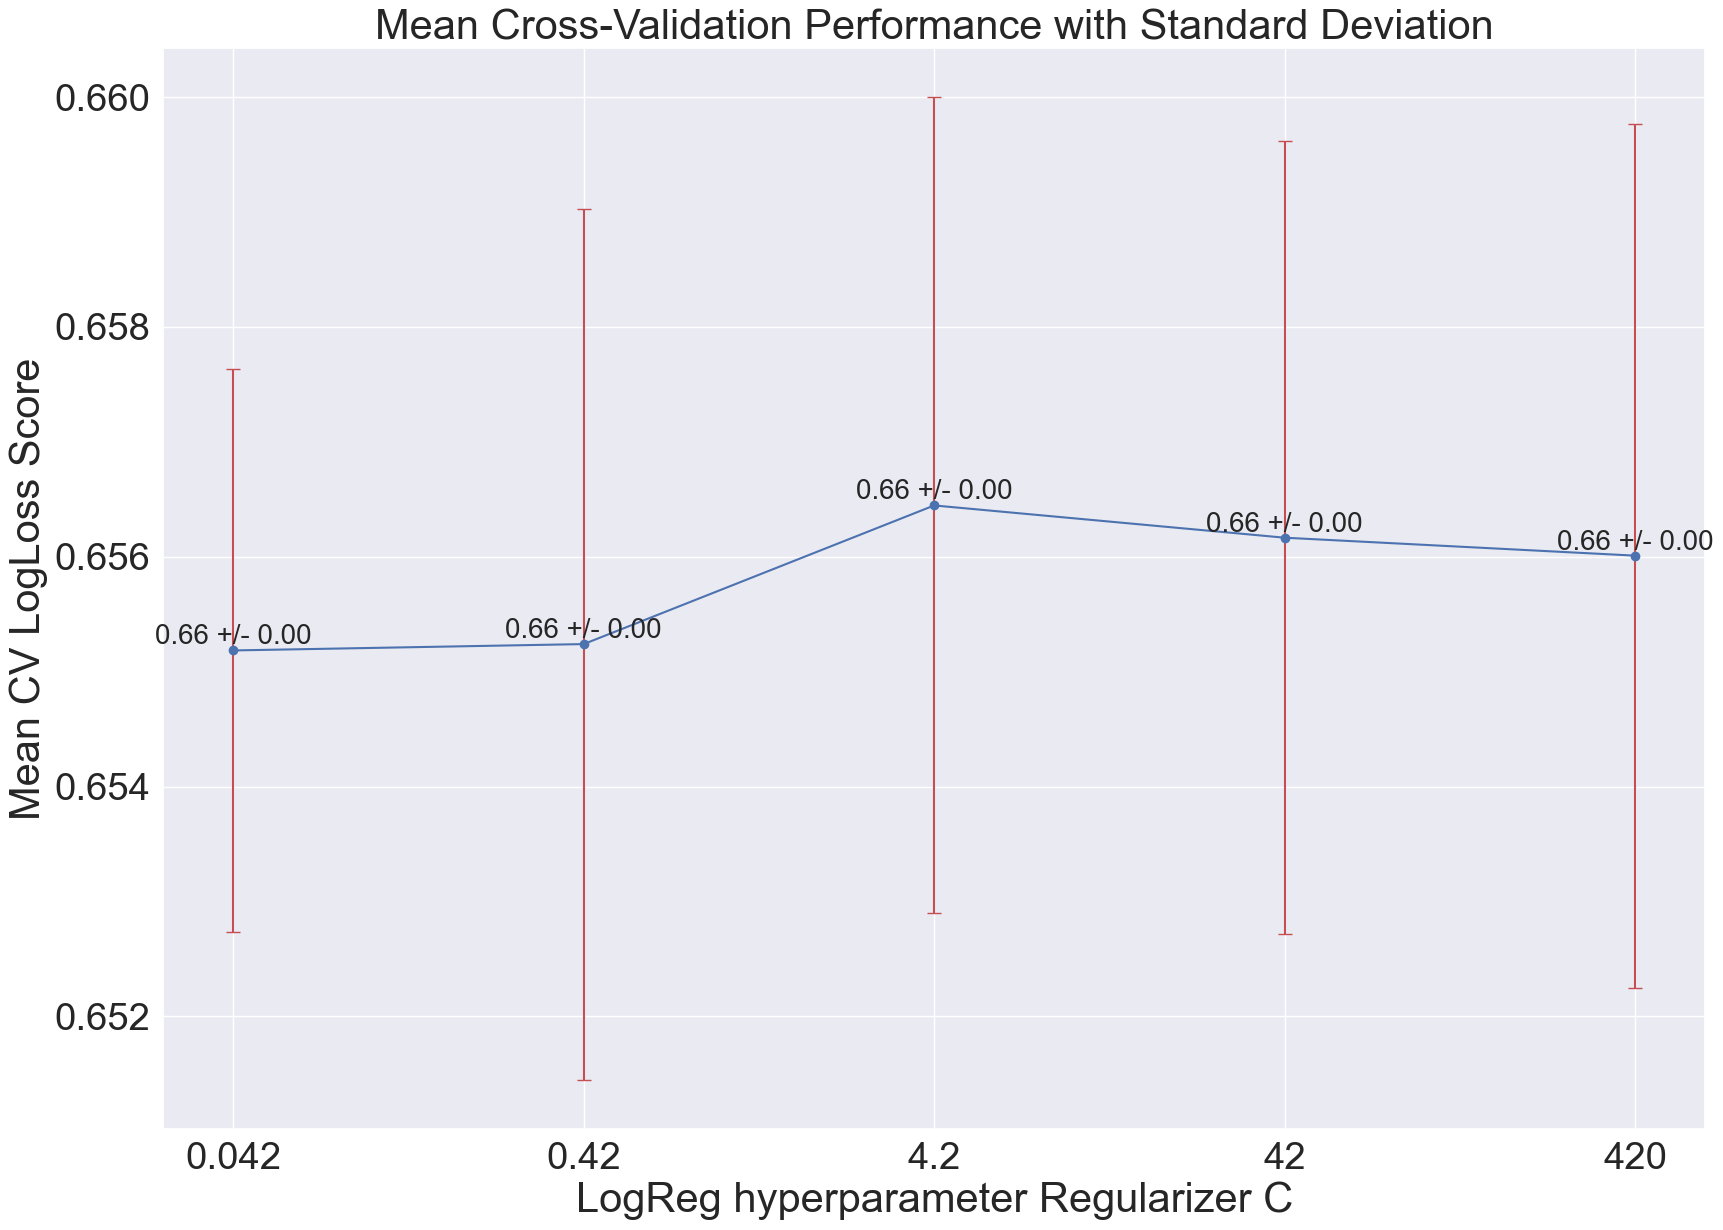

In [81]:
hparam_names = [i['C'] for i in logreg_hparams]
plot_cv(cv_scores_per_hparam_logreg, hparam_names, 'LogReg', 'Regularizer C', 'F1')
plot_cv(cv_scores_per_hparam_auc_logreg, hparam_names, 'LogReg', 'Regularizer C', 'AUC')
plot_cv(cv_scores_per_hparam_logloss_logreg, hparam_names, 'LogReg', 'Regularizer C', 'LogLoss')

In [82]:
print(test_scores_logreg)
print(test_scores_auc_logreg)
print(test_scores_logloss_logreg)

[0.6572361262241567, 0.6506024096385543, 0.6440306681270537, 0.6506024096385543, 0.6438053097345132]
[0.6423481647195295, 0.6523383402578034, 0.6492963081329972, 0.6500716120402922, 0.6531077258146609]
[0.6600248285396468, 0.6547594450528204, 0.6562521151534225, 0.6562163844182122, 0.6547683281648833]


#### Naive Bayes Classifier

In [83]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
nb_hparams = [ # {'var_smoothing':42},
               {'var_smoothing':4.2},
               {'var_smoothing':4.2e-1},
               {'var_smoothing':4.2e-3},
               {'var_smoothing': 4.2e-5}, 
               {'var_smoothing':4.2e-7},
              #{'var_smoothing':4.2e-9}
               ]
cv_scores_per_hparam_nb, cv_scores_per_hparam_auc_nb, cv_scores_per_hparam_logloss_nb, test_scores_nb, test_scores_auc_nb, test_scores_logloss_nb = perform_cross_validation(model=GaussianNB, hyperparameters=nb_hparams, df_train_val=df_train_val, df_test=df_test)

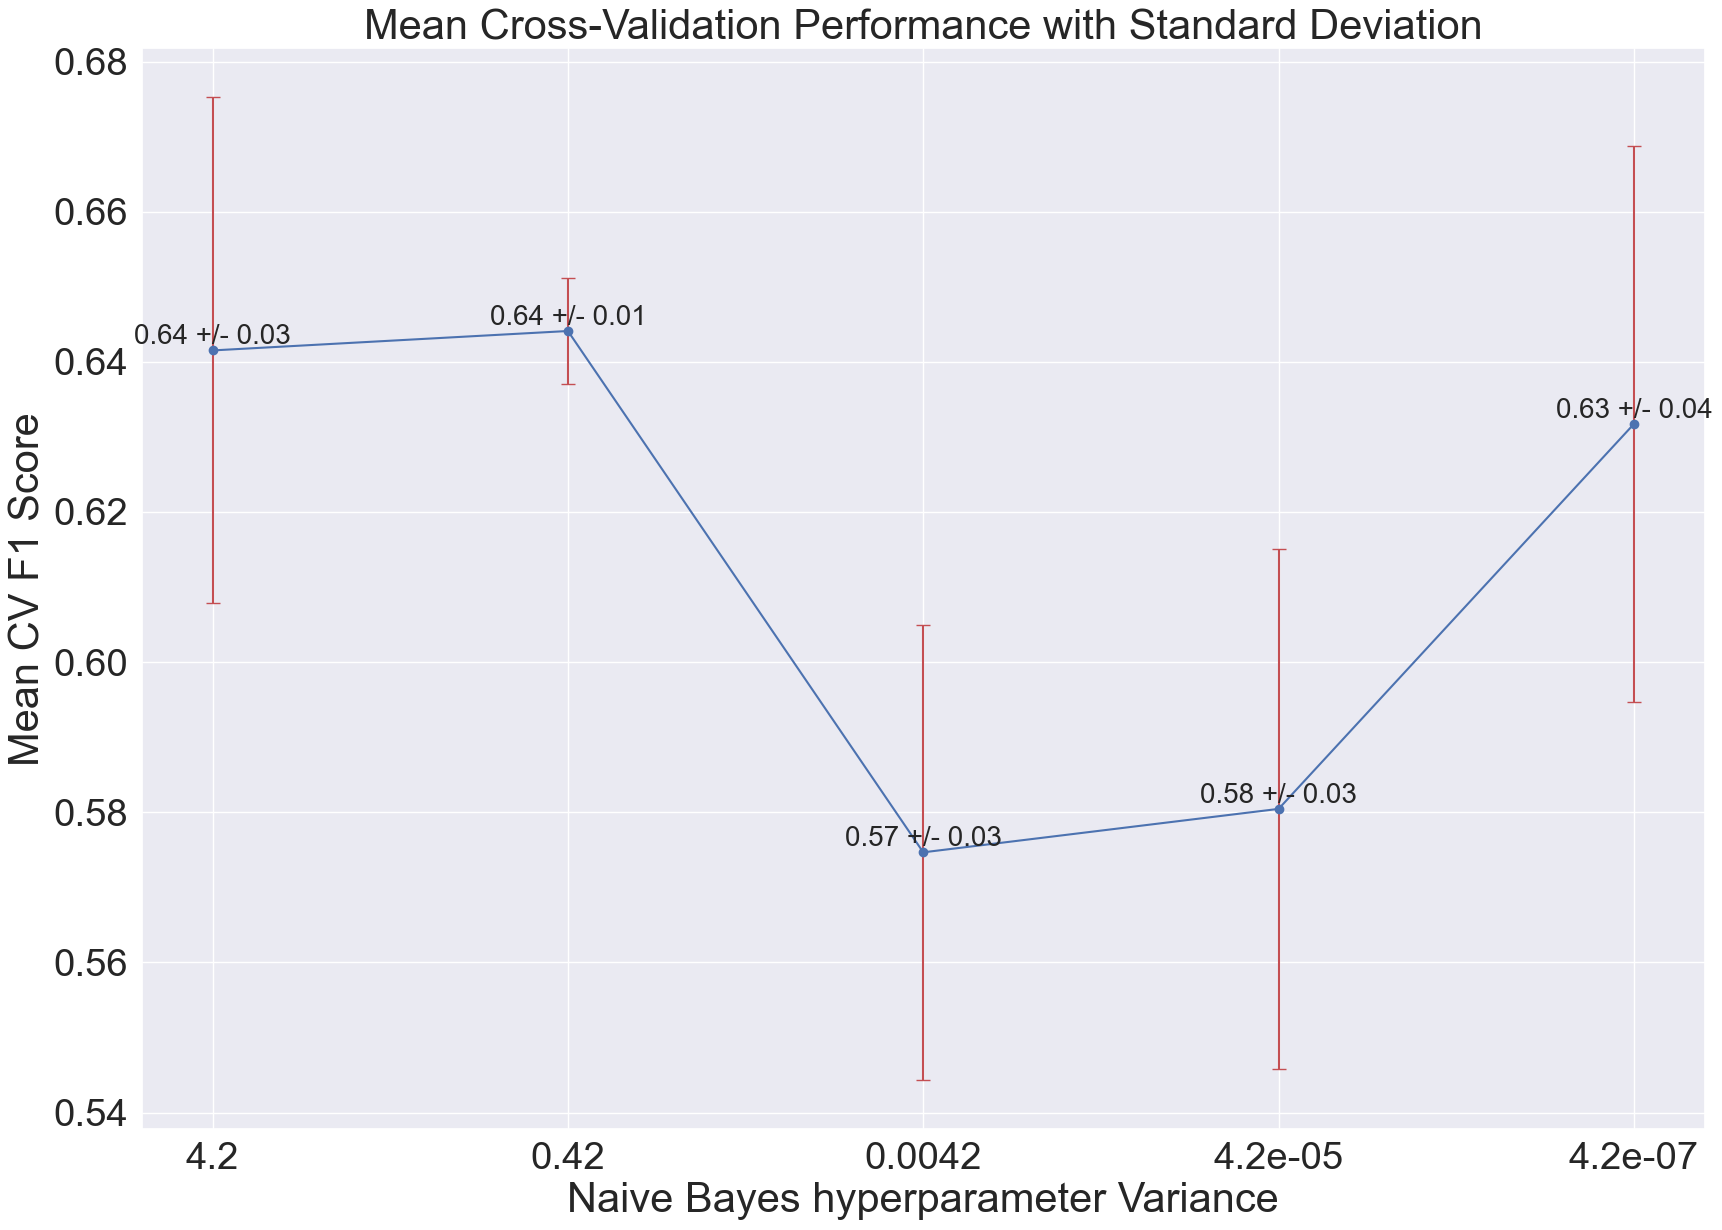

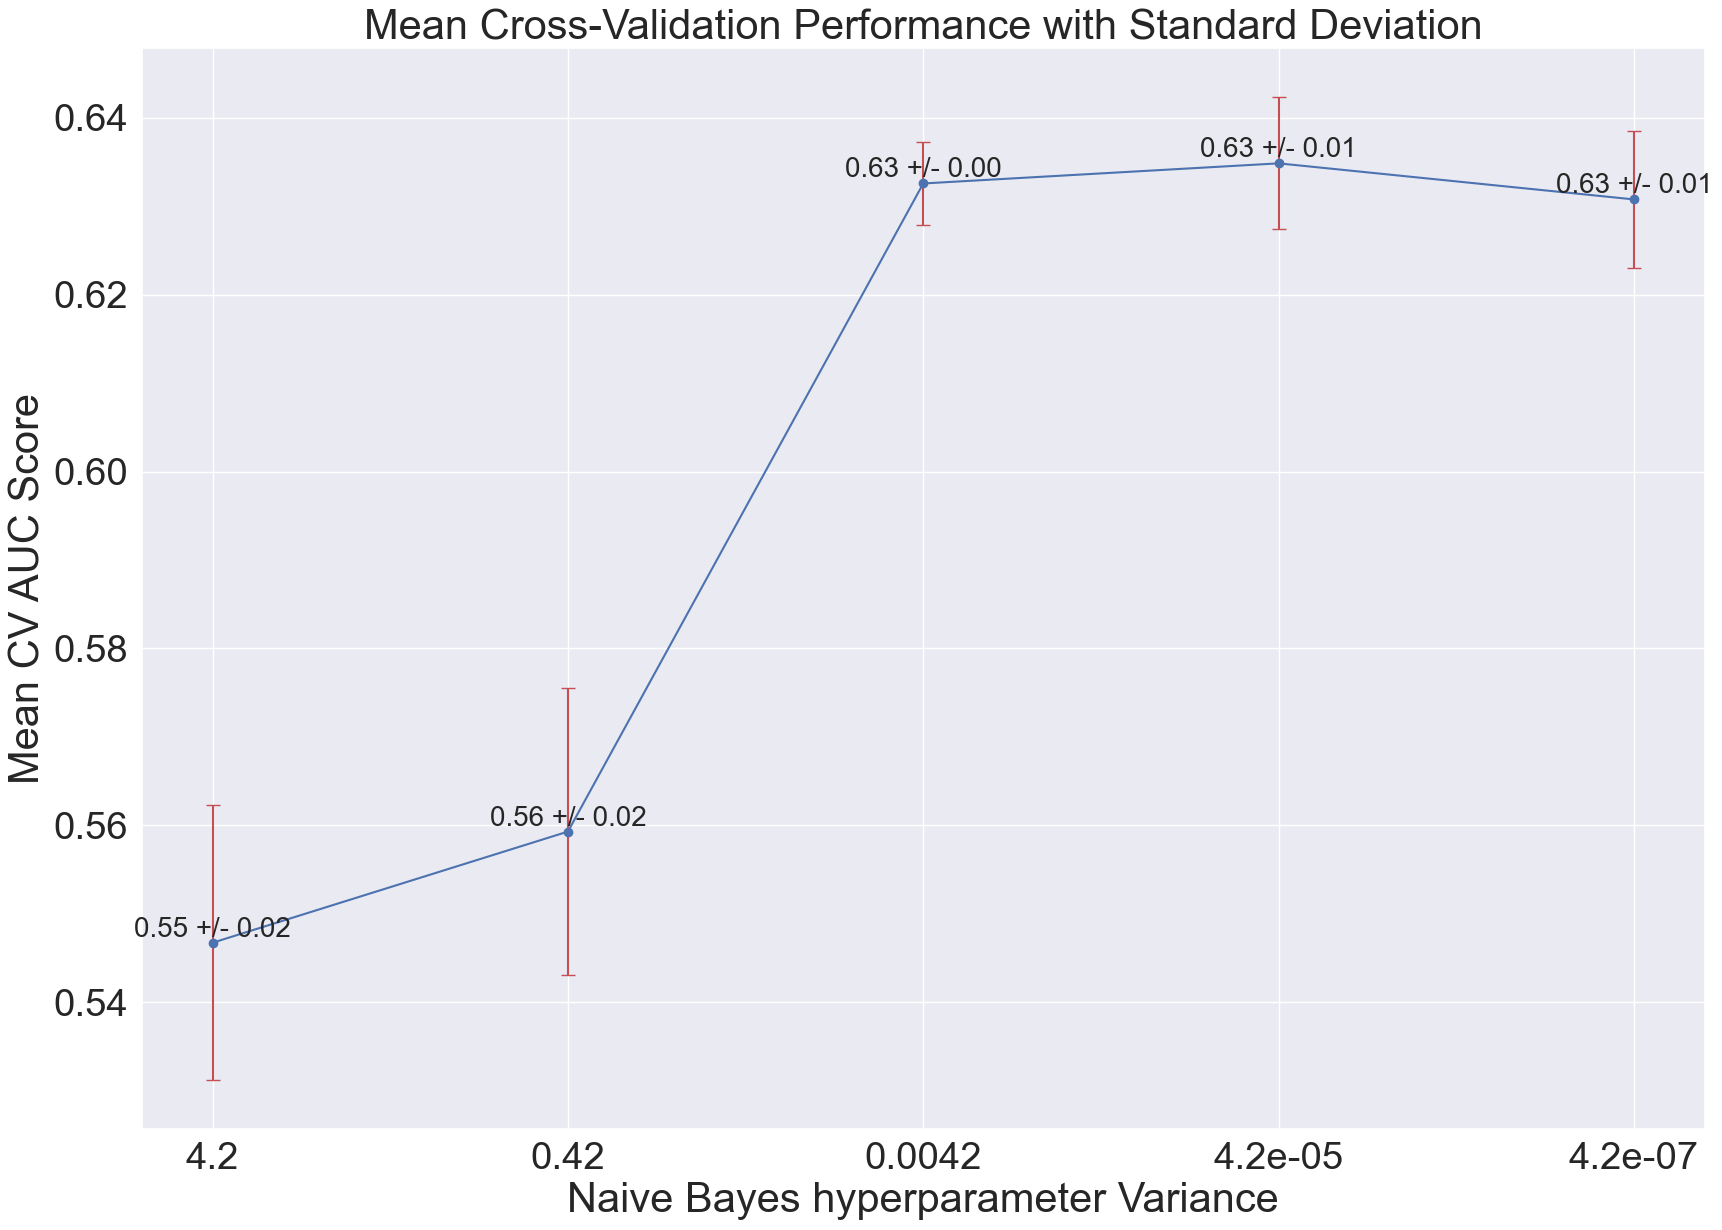

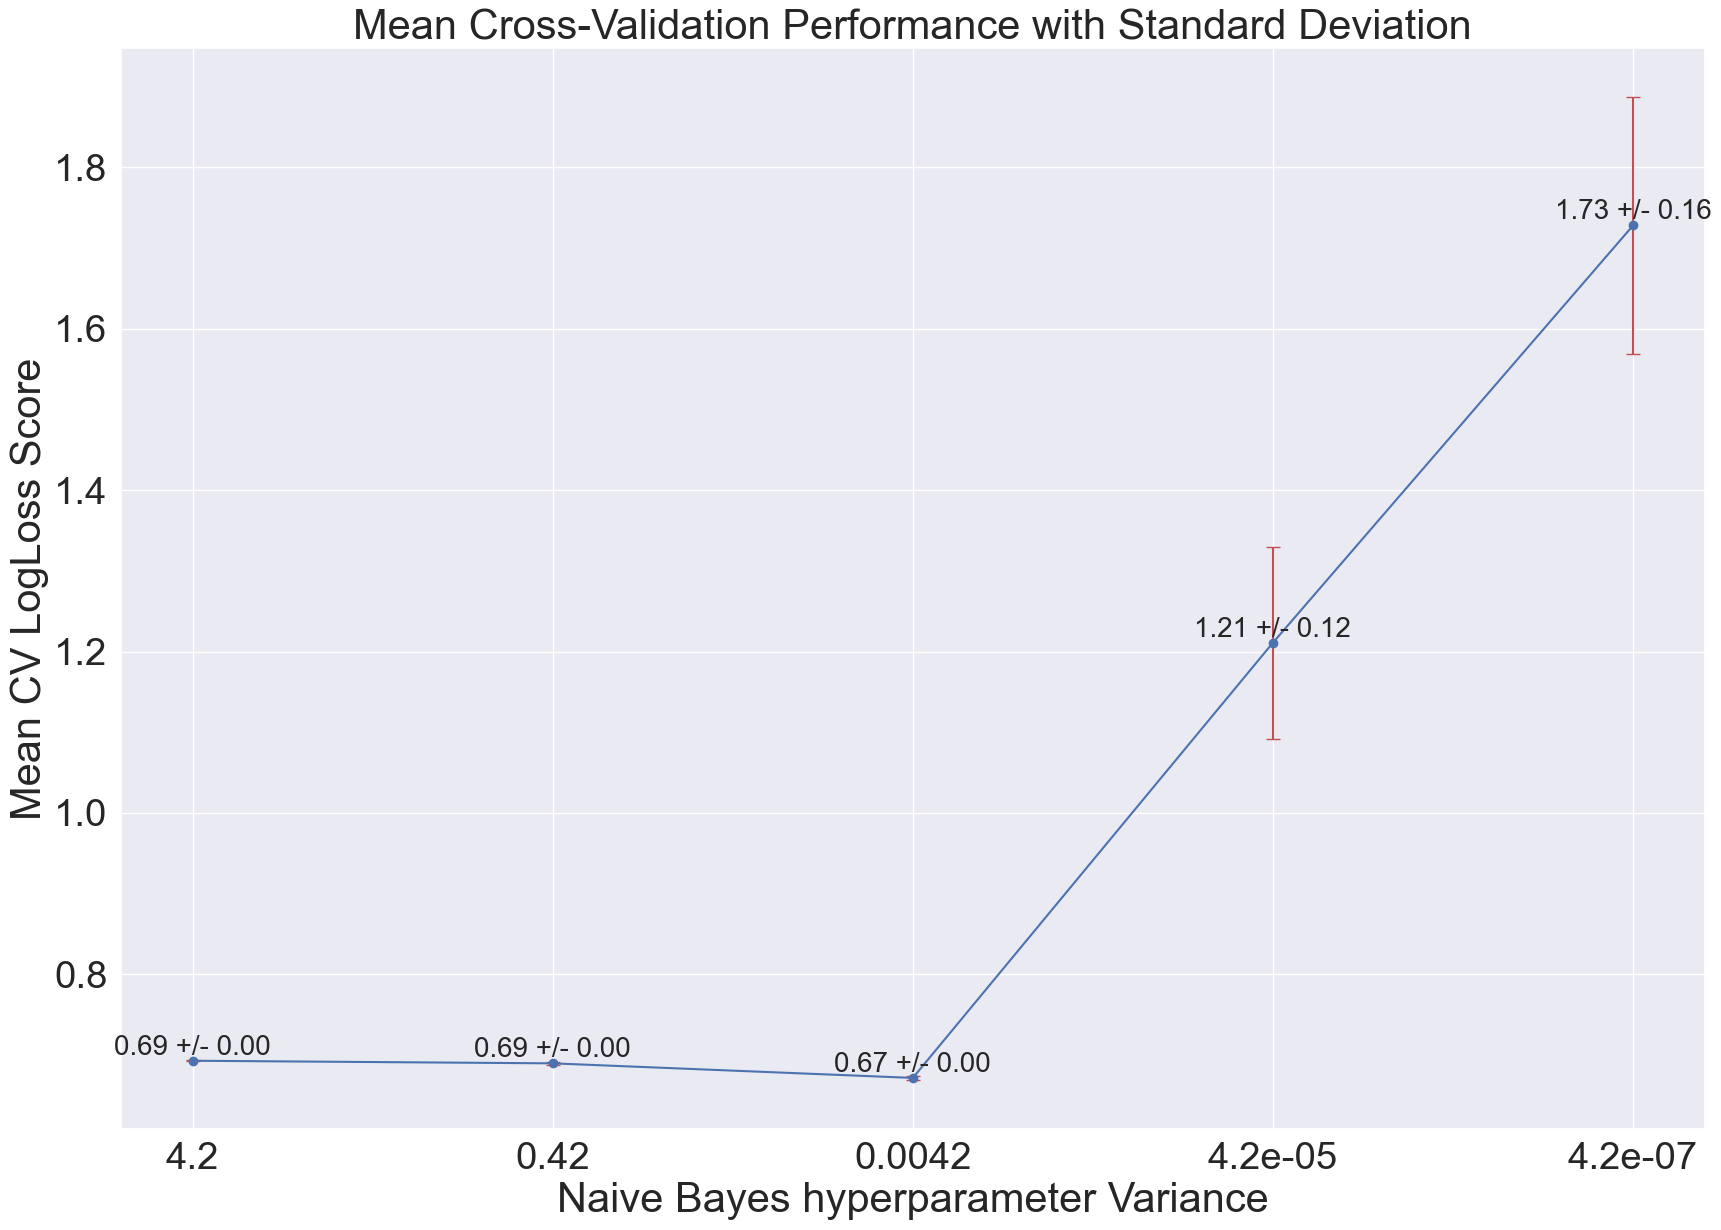

In [84]:
hparam_names = [i['var_smoothing'] for i in nb_hparams]
plot_cv(cv_scores_per_hparam_nb, hparam_names, 'Naive Bayes', 'Variance', 'F1')
plot_cv(cv_scores_per_hparam_auc_nb, hparam_names, 'Naive Bayes', 'Variance', 'AUC')
plot_cv(cv_scores_per_hparam_logloss_nb, hparam_names, 'Naive Bayes', 'Variance', 'LogLoss')

In [85]:
print(test_scores_nb)
print(test_scores_auc_nb)
print(test_scores_logloss_nb)

[0.7015873015873015, 0.6617647058823529, 0.5629453681710214, 0.5756097560975609, 0.6434023991275899]
[0.5281180829279263, 0.5366109158055468, 0.592355858575098, 0.6373146076725494, 0.6345625747191743]
[0.6898623353602795, 0.6882901346535442, 0.7022210363043129, 1.2023157925813732, 1.5006070642610416]


Random Forest Classifier

In [86]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
rf_hparams = [ # {'var_smoothing':42},
               {'n_estimators':1}, # decision tree 
               {'n_estimators':42},
               {'n_estimators':142},
               {'n_estimators': 242}, 
               {'n_estimators':342},
              #{'var_smoothing':4.2e-9}
               ]
cv_scores_per_hparam_rf, cv_scores_per_hparam_auc_rf, cv_scores_per_hparam_logloss_rf, \
    test_scores_rf, test_scores_auc_rf, test_scores_logloss_rf = perform_cross_validation(model=RandomForestClassifier, hyperparameters=rf_hparams, df_train_val=df_train_val, df_test=df_test)

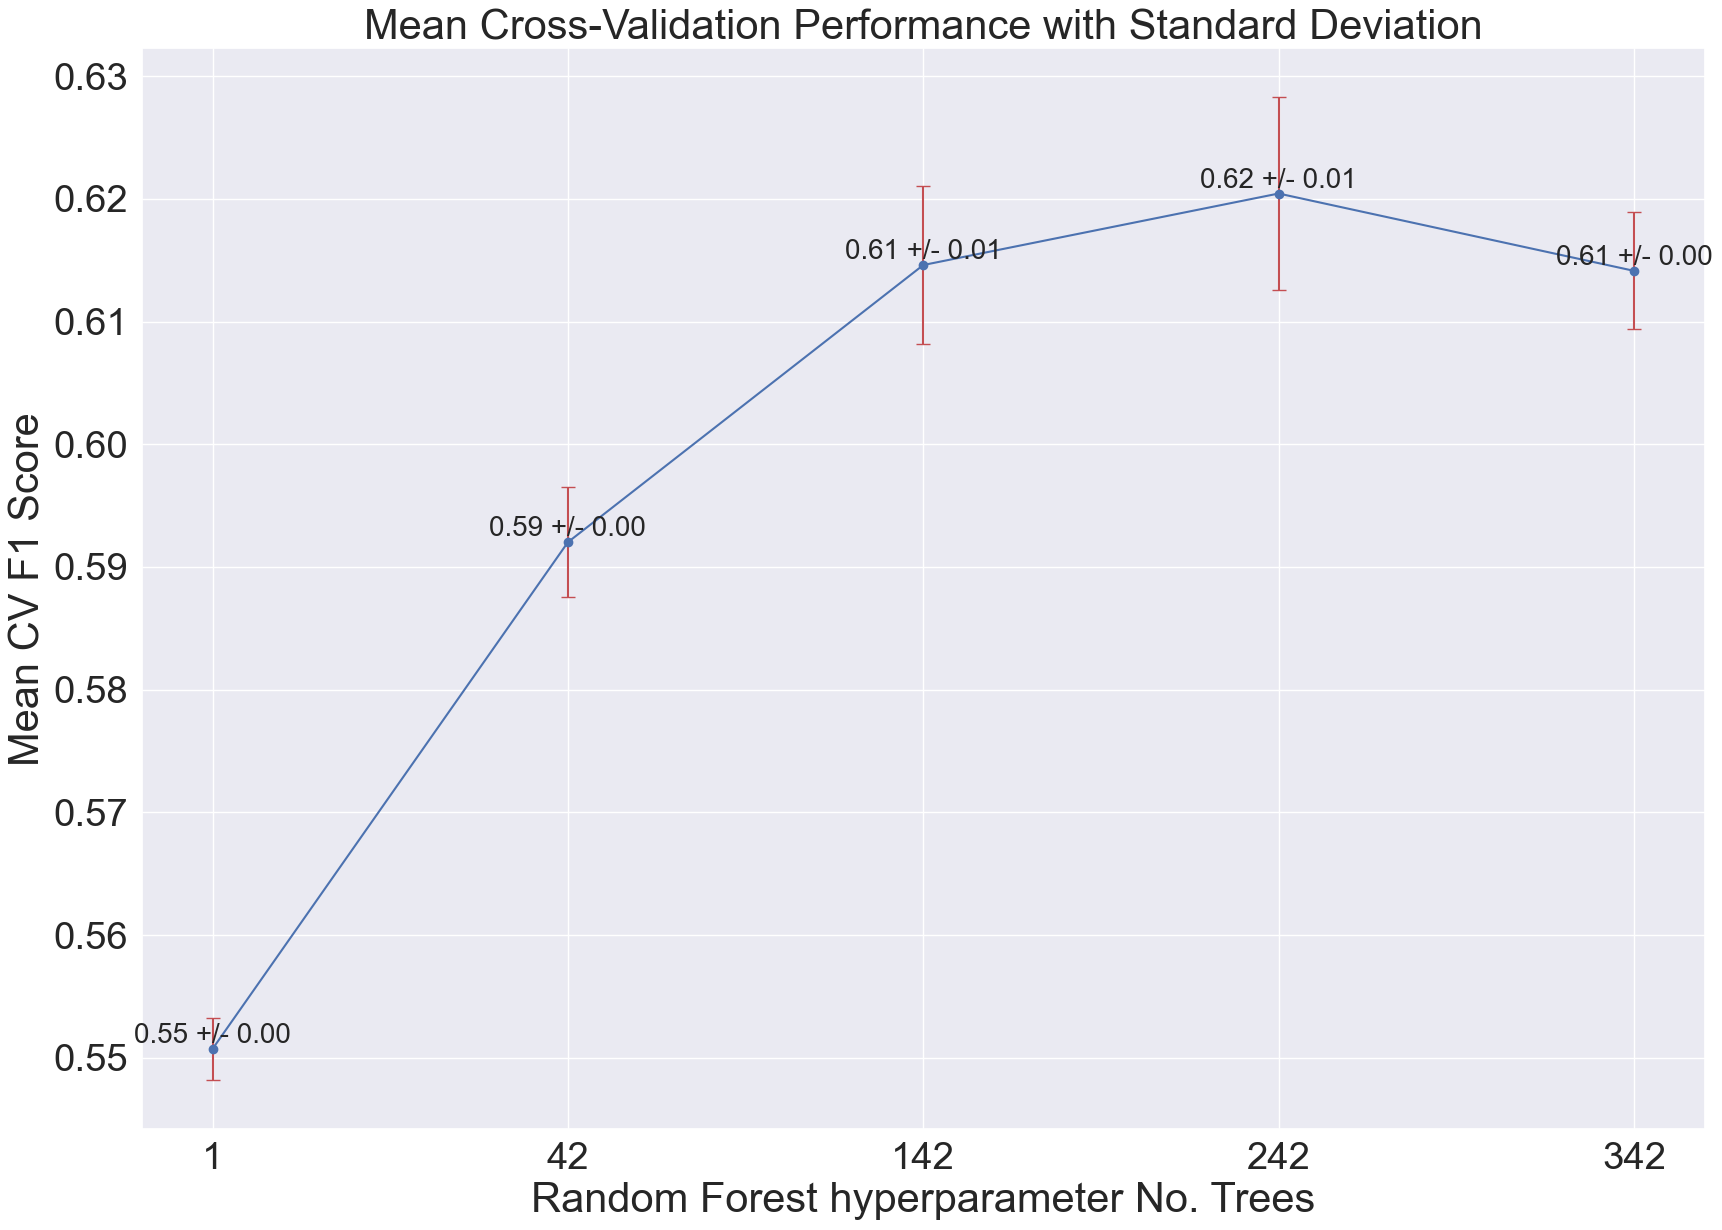

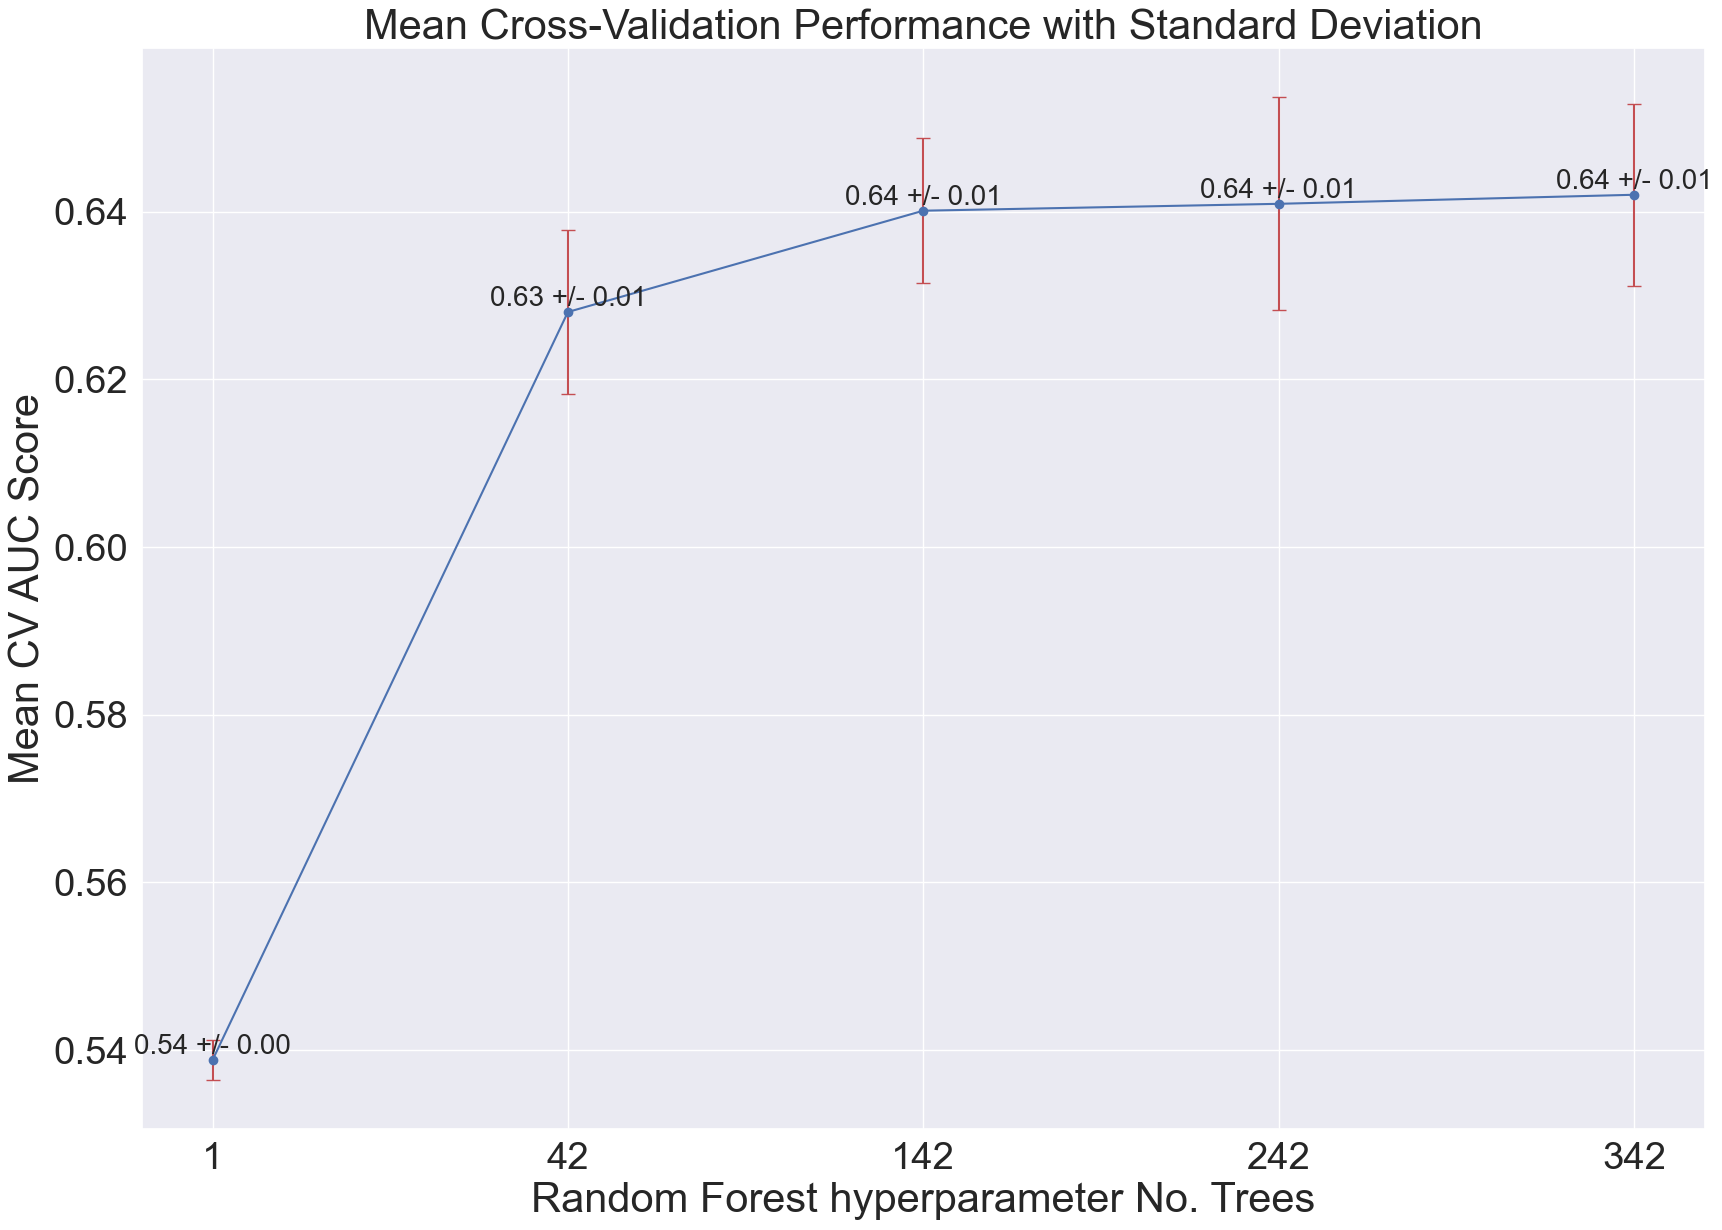

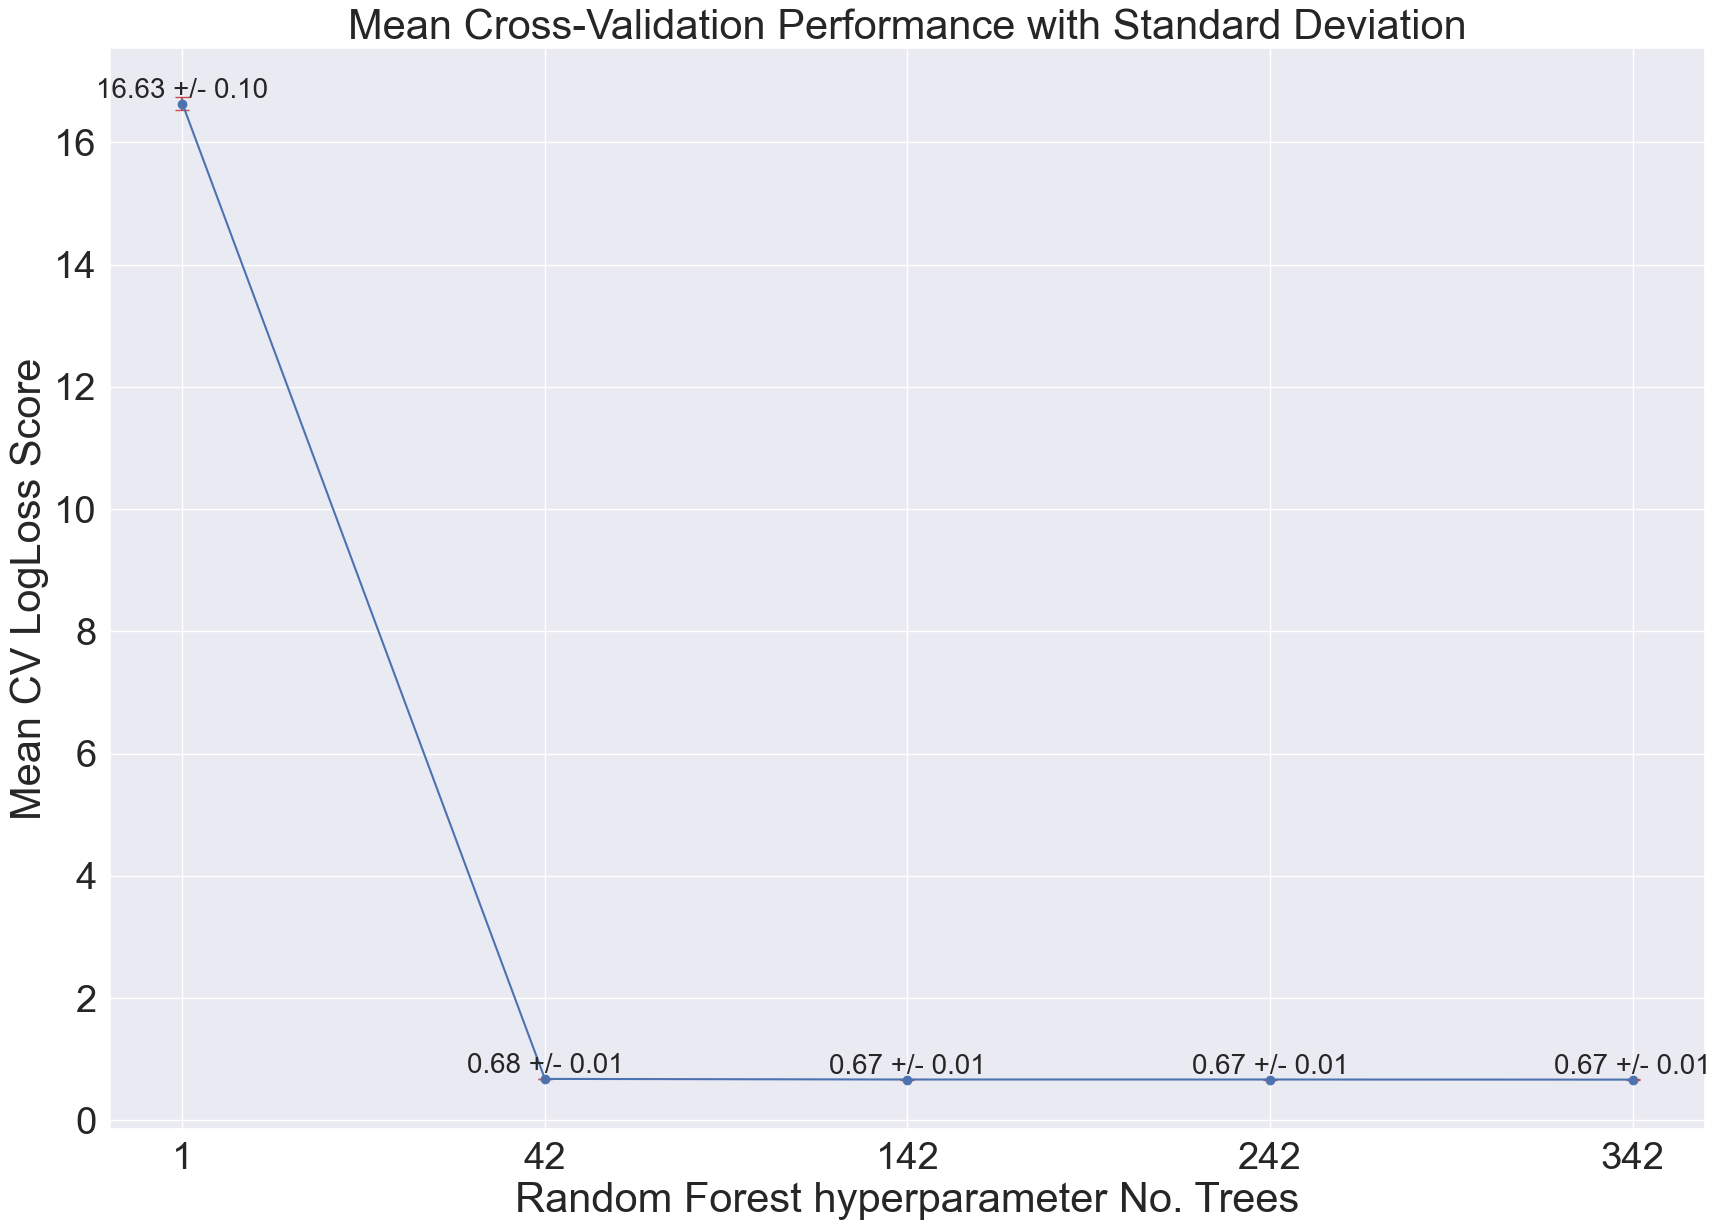

In [87]:
hparam_names = [i['n_estimators'] for i in rf_hparams]
plot_cv(cv_scores_per_hparam_rf, hparam_names, 'Random Forest', 'No. Trees', 'F1')
plot_cv(cv_scores_per_hparam_auc_rf, hparam_names, 'Random Forest', 'No. Trees', 'AUC')
plot_cv(cv_scores_per_hparam_logloss_rf, hparam_names, 'Random Forest', 'No. Trees', 'LogLoss')

In [88]:
print(test_scores_rf)
print(test_scores_auc_rf)
print(test_scores_logloss_rf)

[0.5819397993311036, 0.6296296296296297, 0.6390134529147983, 0.6191536748329622, 0.6263982102908278]
[0.5419463087248322, 0.6335505367943847, 0.6325976823739687, 0.6305469739474214, 0.6362611412946984]
[16.38347881323507, 0.6715235297652012, 0.6657413561481204, 0.6653829916351669, 0.6638514281222656]


# Task 4: Model interpretation

In [89]:
def get_idx_best_hparam(cv_scores_per_hparam, cv_scores_per_hparam_auc, cv_scores_per_hparam_logloss, hparams):
    idx_best_hparam = np.argmax([np.average(np.array(cv_scores_per_hparam)[i, :]) for i in range(len(hparams))])
    idx_best_hparam_auc = np.argmax([np.average(np.array(cv_scores_per_hparam_auc)[i, :]) for i in range(len(hparams))])
    idx_best_hparam_logloss = np.argmin([np.average(np.array(cv_scores_per_hparam_logloss)[i, :]) for i in range(len(hparams))])

    return hparams[idx_best_hparam], hparams[idx_best_hparam_auc], hparams[idx_best_hparam_logloss]

In [90]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df = df.head(4200)
df_train, df_val, df_test = train_val_test_split(df)
X_train_encoded_drop_corr, y_train, X_train, to_drop, _, _ = preprocess_pipeline_training(train_df=df_train, selected_features=selected_features_manual)

def plot_model_coefficients(model, best_hparam, model_name, X_train = X_train_encoded_drop_corr, y_train = y_train, feature_names = selected_features_manual):
    # Extract coefficients

    model = model(**best_hparam) 
    model.fit(X_train, y_train)
    
    coefs = model.coef_[0]

    # For binary categorical features, use the original feature names
    
    # Sort the coefficients and corresponding feature names
    sorted_indices = np.argsort(np.abs(coefs))# [::-1]

    sorted_coefs = coefs[sorted_indices]
    # pdb.set_trace()
    sorted_feature_names = np.array(feature_names)[sorted_indices]

    # Plot
    plt.figure(figsize=(25, 20))
    plt.barh(sorted_feature_names, sorted_coefs)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Coefficients for {model_name}')
    plt.show()

In [91]:
all(X_train_encoded_drop_corr.columns == selected_features_manual)

True

In [92]:
get_idx_best_hparam(cv_scores_per_hparam_svm, cv_scores_per_hparam_auc_svm, cv_scores_per_hparam_logloss_svm, svm_hparams)


({'C': 0.042, 'probability': True, 'kernel': 'linear'},
 {'C': 0.042, 'probability': True, 'kernel': 'linear'},
 {'C': 0.42, 'probability': True, 'kernel': 'linear'})

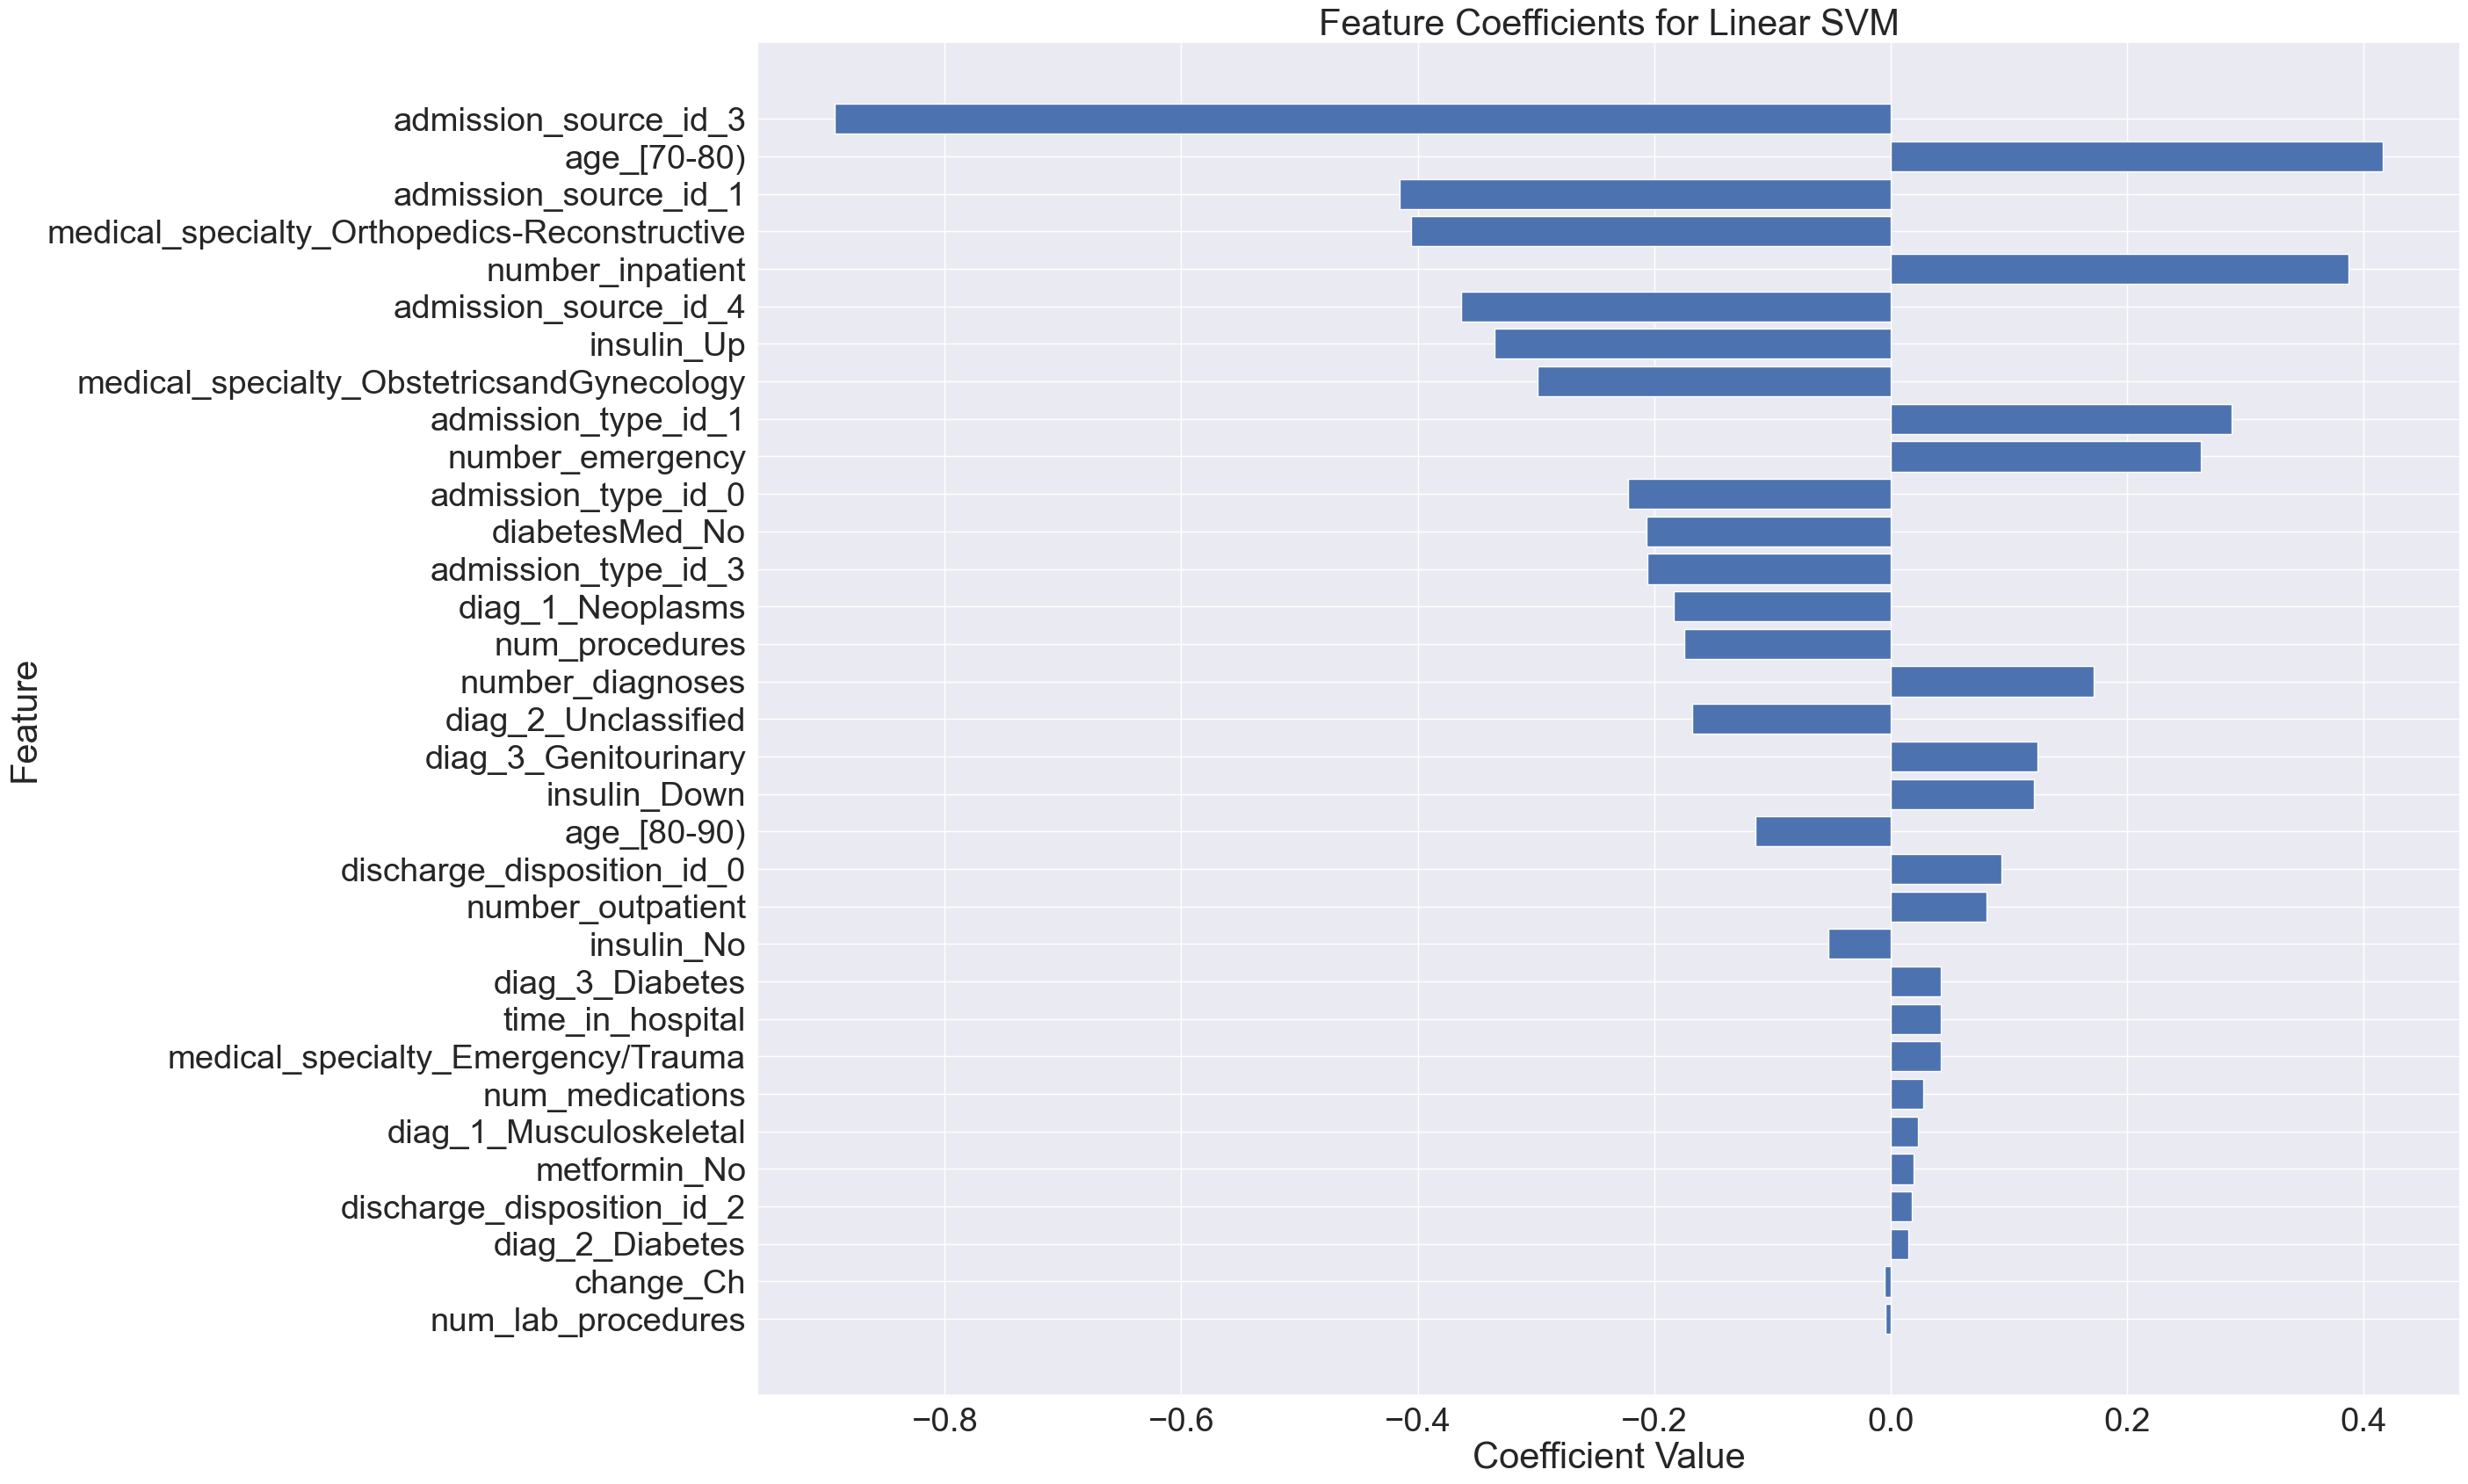

In [93]:
best_hparam = get_idx_best_hparam(cv_scores_per_hparam_svm, cv_scores_per_hparam_auc_svm, cv_scores_per_hparam_logloss_svm, svm_hparams)[0]

# model = svm.SVC(**best_hparam)  # Create model instance with given hyperparameters
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_encoded_drop_corr) 
# gram_matrix = np.dot(X_train_scaled, X_train_scaled.T)
# model.fit(gram_matrix, y_train)

plot_model_coefficients(svm.SVC, best_hparam=best_hparam, model_name='Linear SVM', X_train = X_train_encoded_drop_corr, y_train = y_train, feature_names = selected_features_manual)

In [94]:
get_idx_best_hparam(cv_scores_per_hparam_logreg, cv_scores_per_hparam_auc_logreg, cv_scores_per_hparam_logloss_logreg, logreg_hparams)

({'C': 42}, {'C': 0.042}, {'C': 0.042})

/Users/awxlong/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


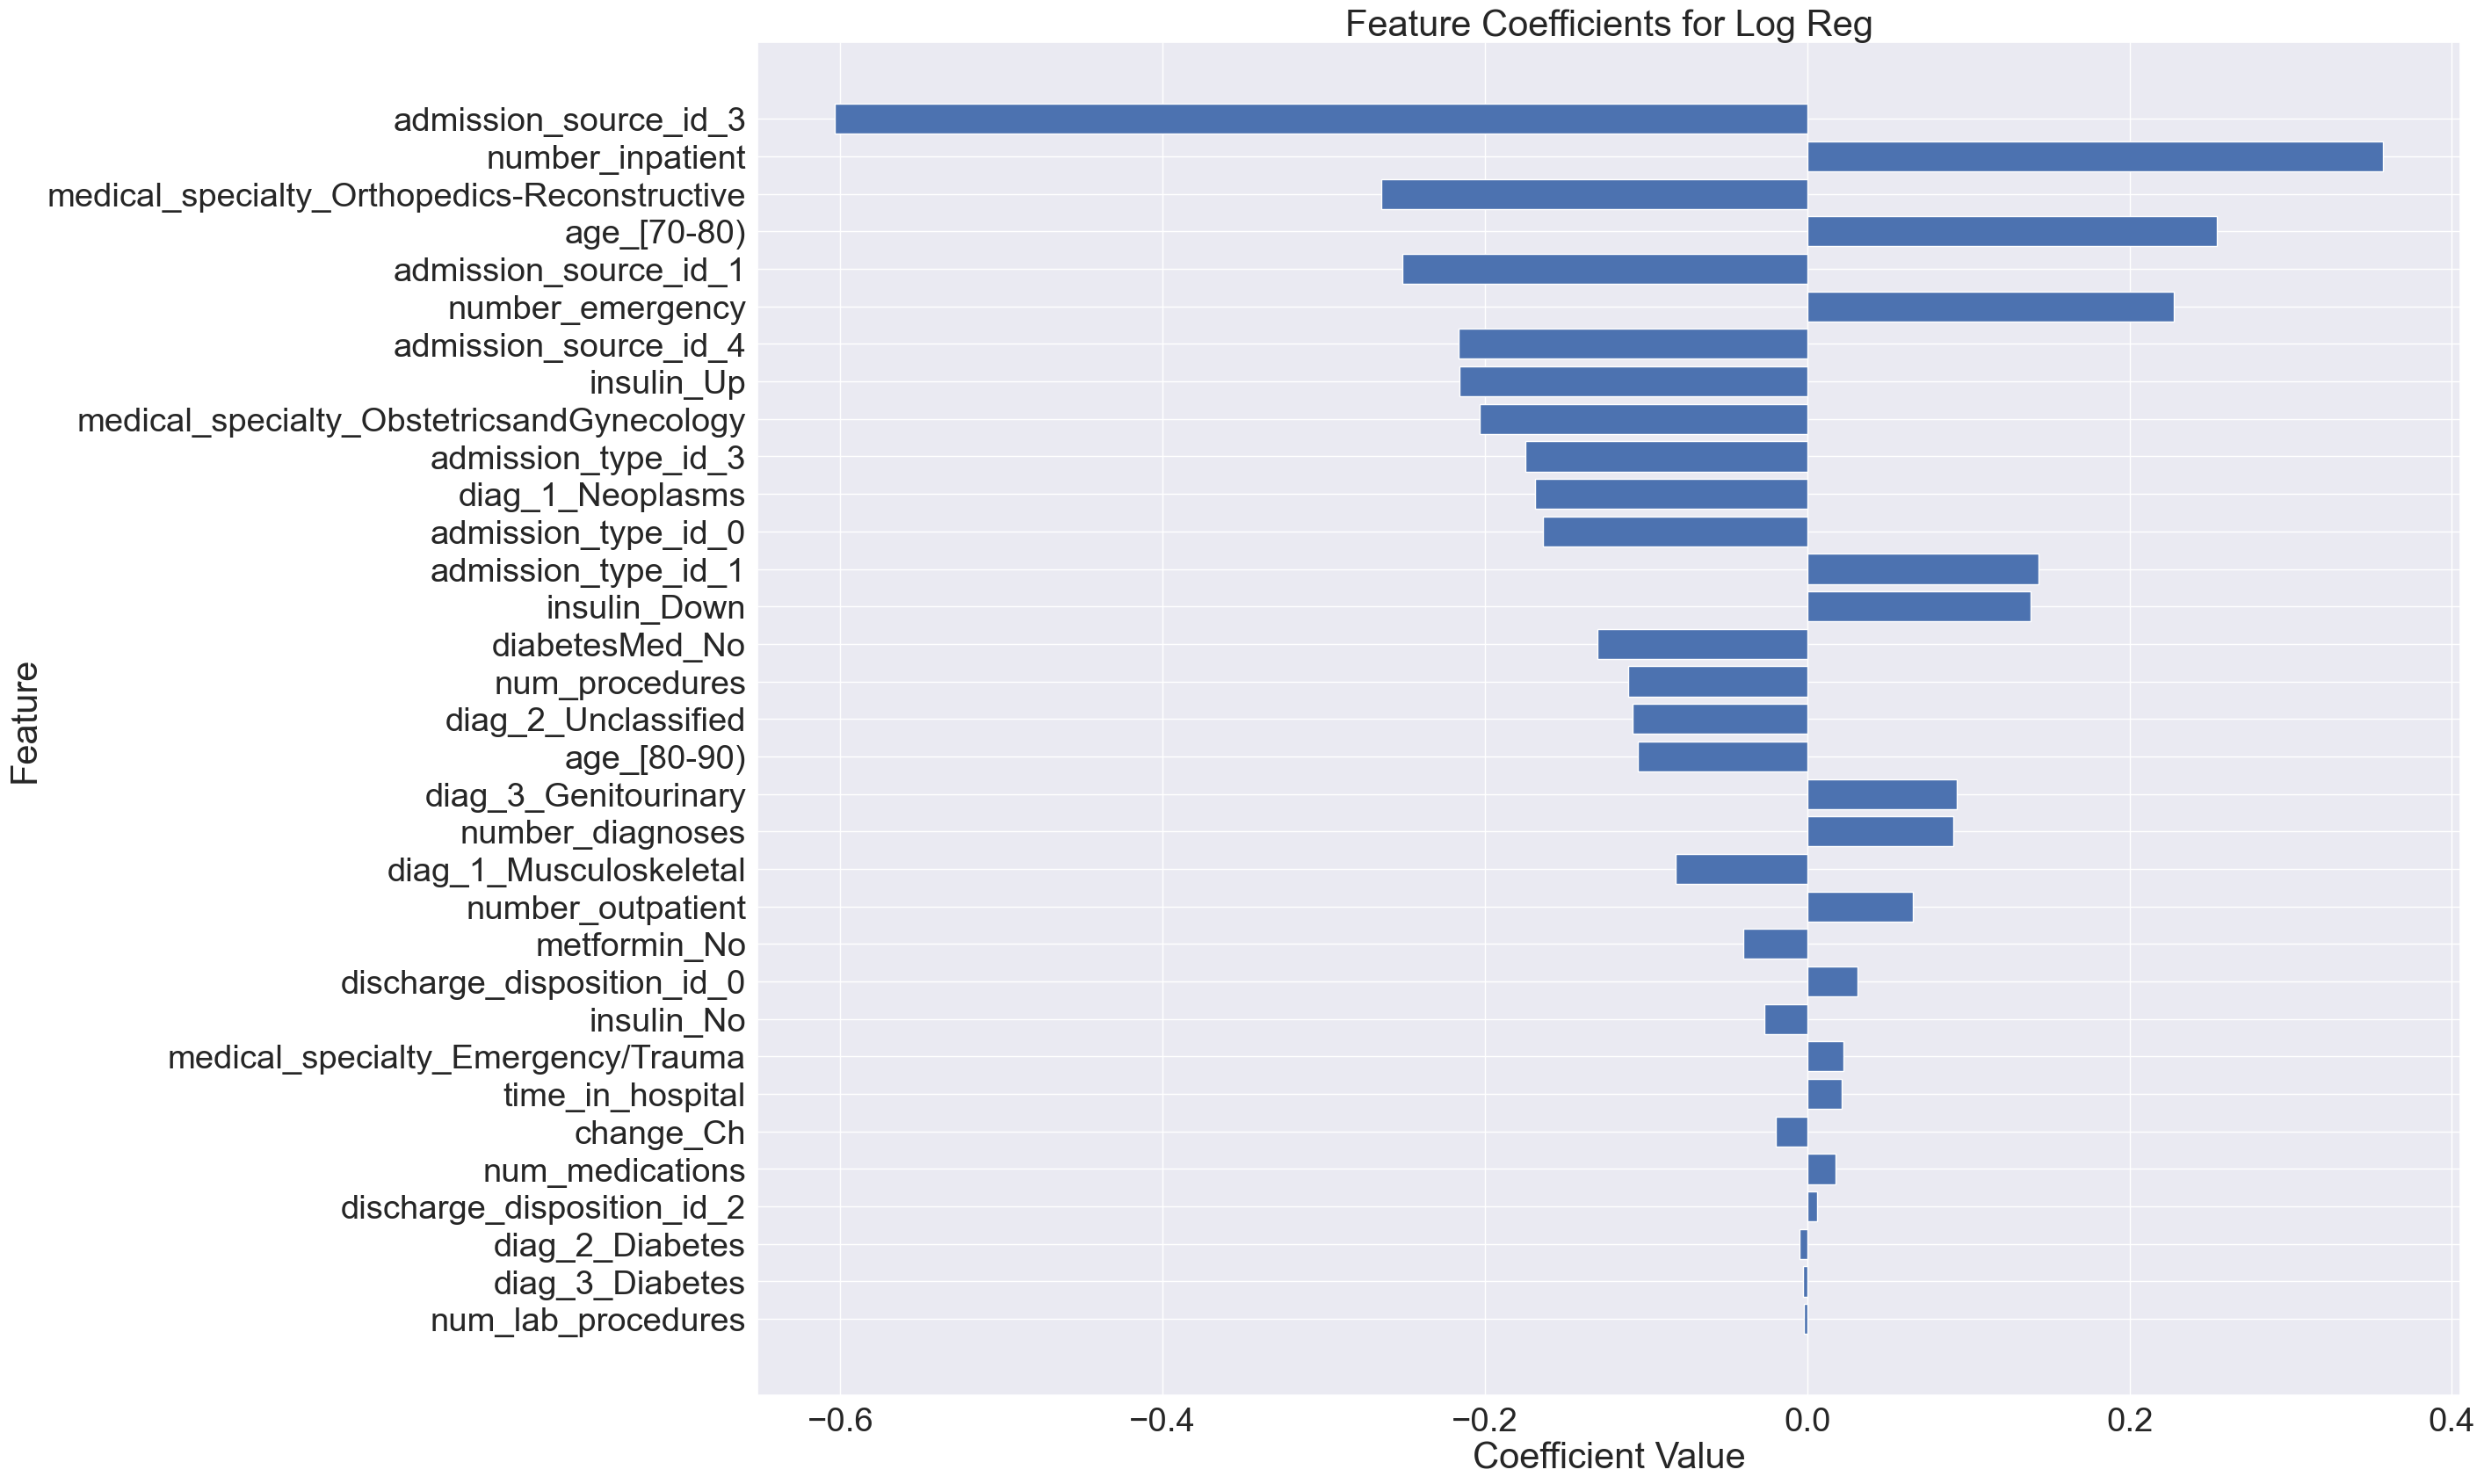

In [95]:
logreg_hparam = get_idx_best_hparam(cv_scores_per_hparam_logreg, cv_scores_per_hparam_auc_logreg, cv_scores_per_hparam_logloss_logreg, logreg_hparams)[1]
plot_model_coefficients(LogisticRegression, best_hparam=logreg_hparam, model_name='Log Reg')

In [96]:
get_idx_best_hparam(cv_scores_per_hparam_nb, cv_scores_per_hparam_auc_nb, cv_scores_per_hparam_logloss_nb, nb_hparams)

({'var_smoothing': 0.42},
 {'var_smoothing': 4.2e-05},
 {'var_smoothing': 0.0042})

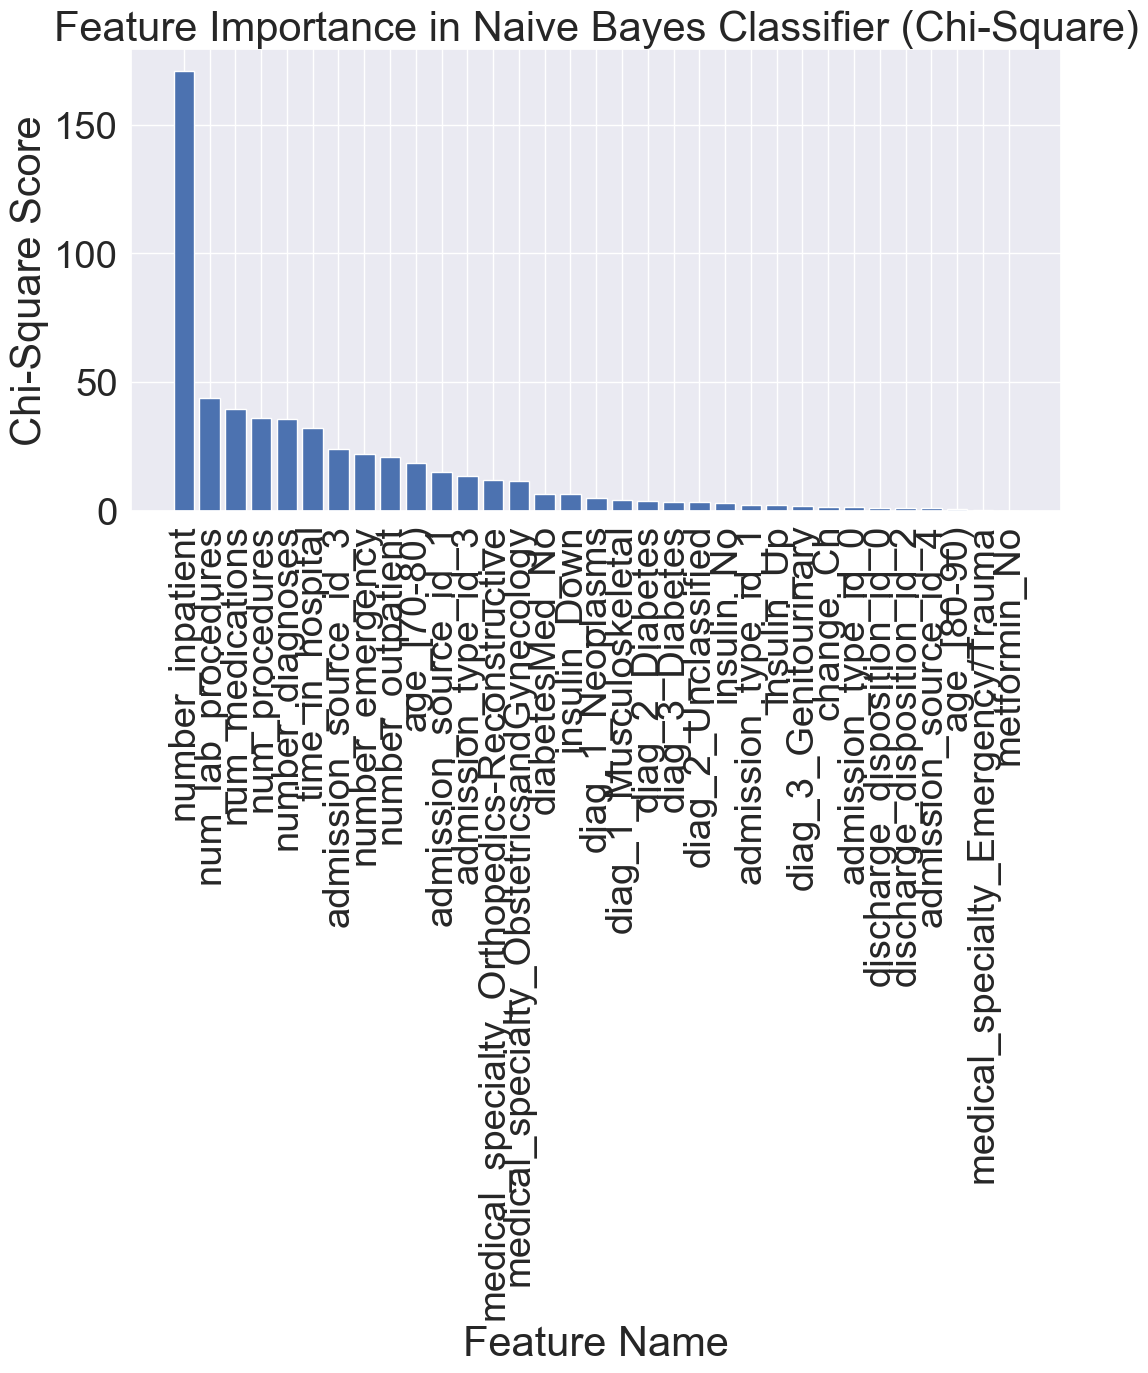

In [97]:
from sklearn.feature_selection import chi2

chi2_scores, p_values = chi2(X_train_encoded_drop_corr, y_train)

# Sort features based on chi-square scores
sorted_indices = np.argsort(chi2_scores)[::-1]
sorted_features = [selected_features_manual[i] for i in sorted_indices]
sorted_scores = chi2_scores[sorted_indices]

# Plotting feature importance using chi-square scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features)), sorted_scores, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Chi-Square Score')
plt.title('Feature Importance in Naive Bayes Classifier (Chi-Square)')
plt.show()

In [98]:
from sklearn.tree import plot_tree

In [99]:
get_idx_best_hparam(cv_scores_per_hparam_rf, cv_scores_per_hparam_auc_rf, cv_scores_per_hparam_logloss_rf, rf_hparams)

({'n_estimators': 242}, {'n_estimators': 342}, {'n_estimators': 342})

In [100]:
tree_param = get_idx_best_hparam(cv_scores_per_hparam_rf, cv_scores_per_hparam_auc_rf, cv_scores_per_hparam_logloss_rf, rf_hparams)[0]
rf = RandomForestClassifier(**tree_param)
rf.fit(X_train_encoded_drop_corr, y_train)

RandomForestClassifier(n_estimators=242)

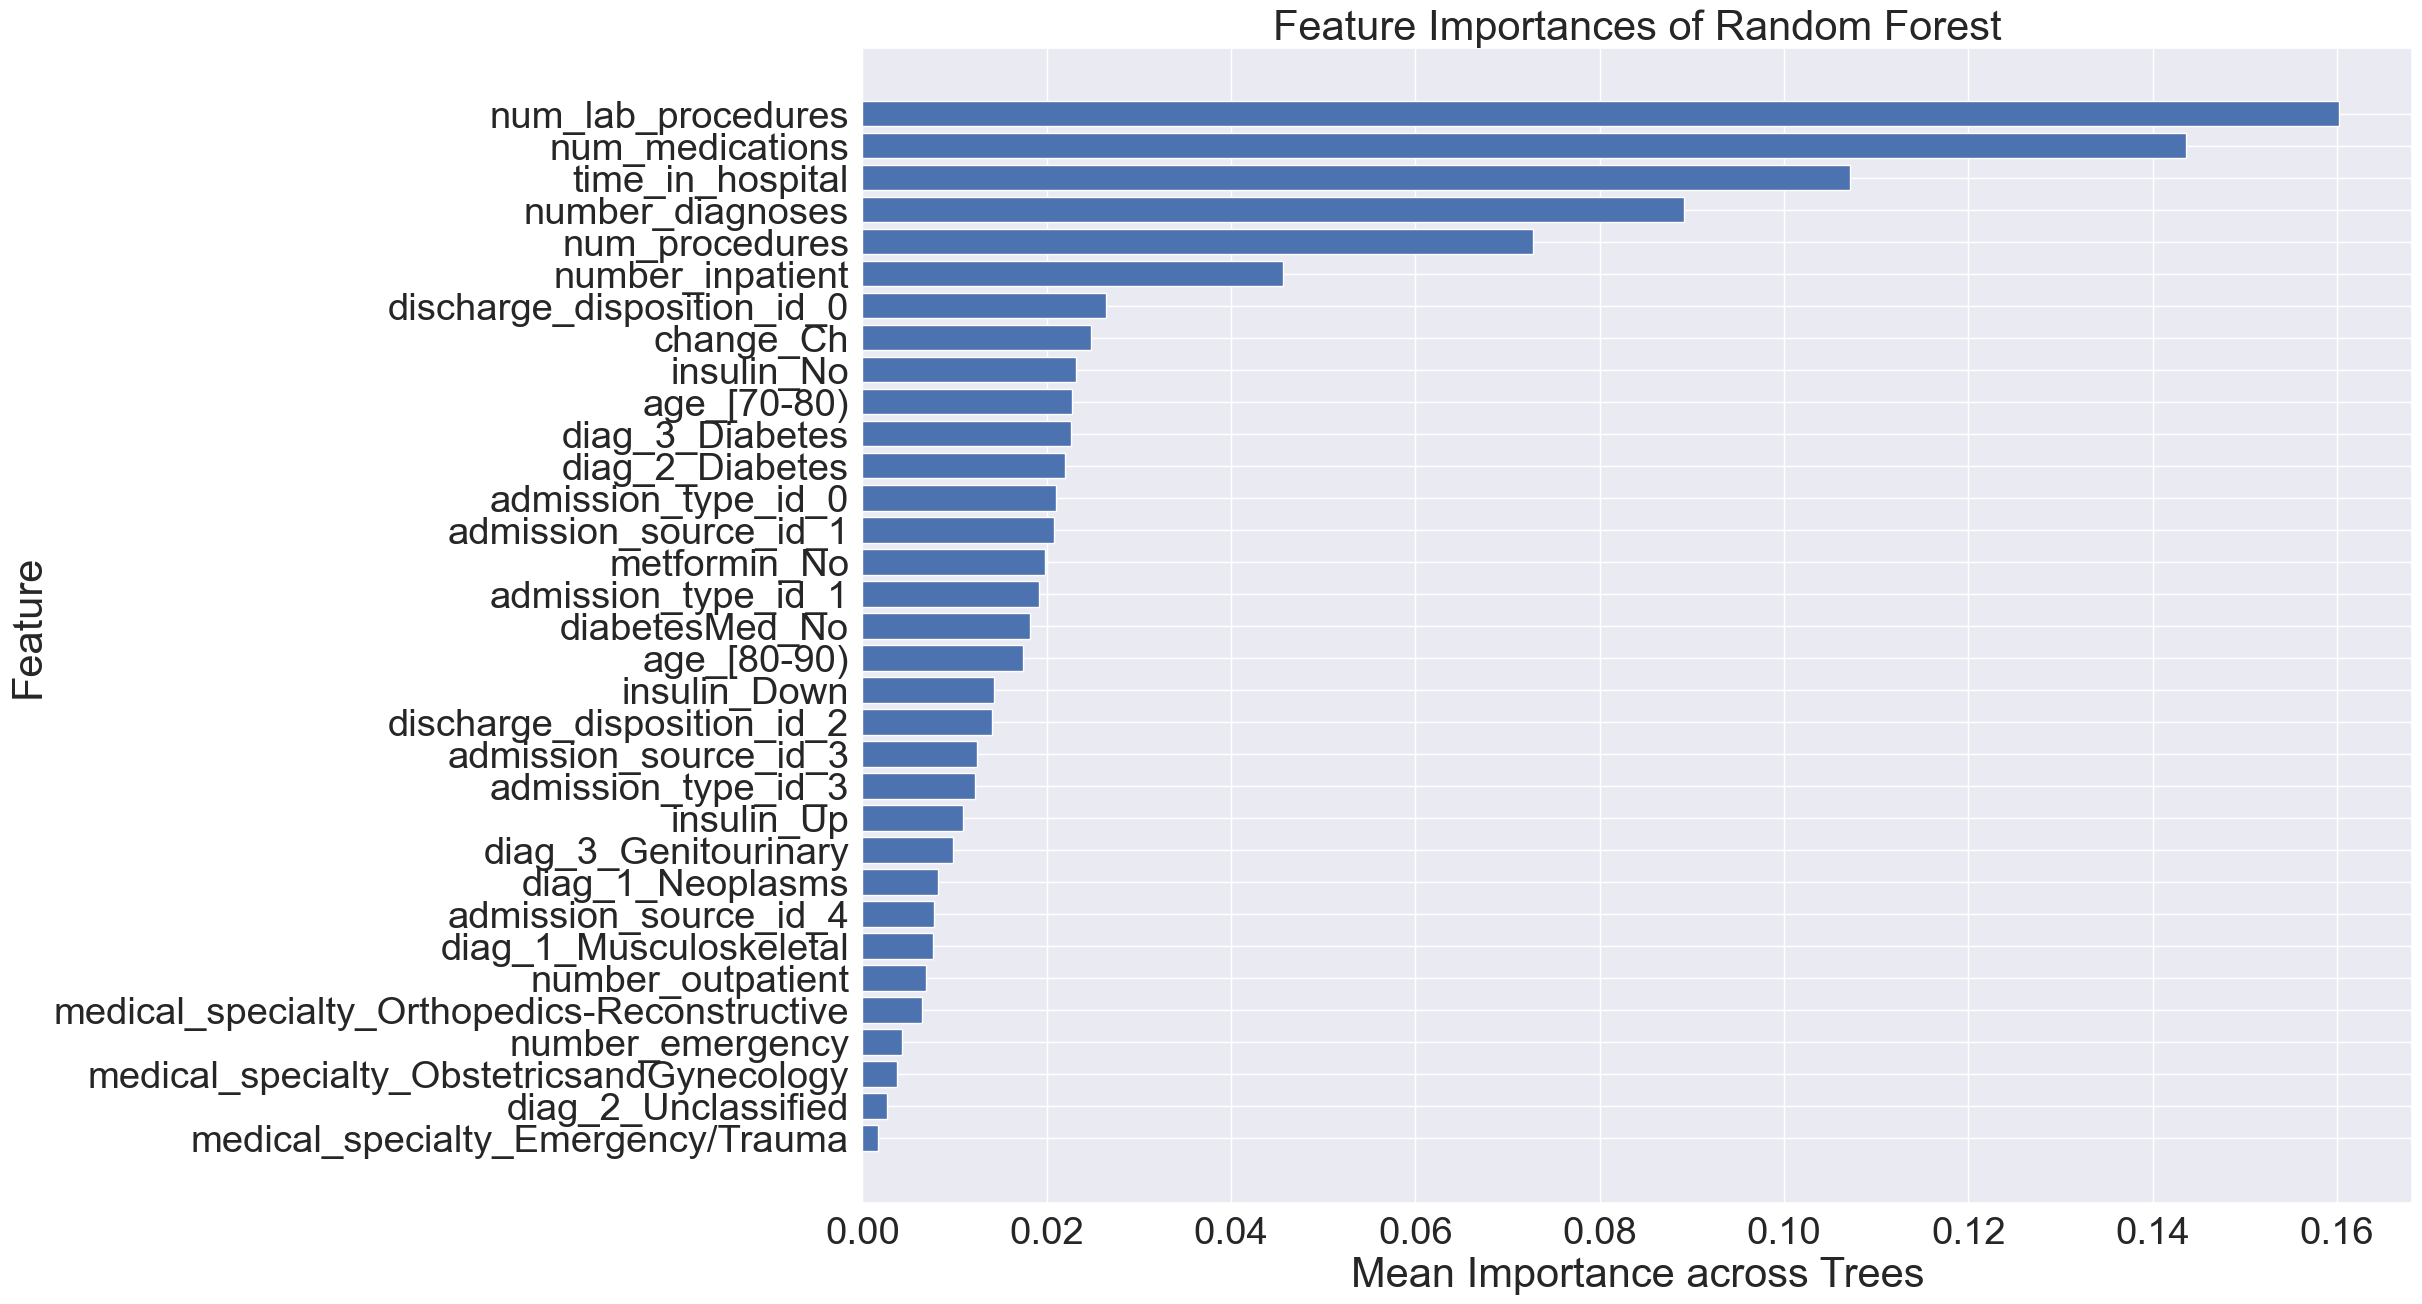

In [106]:

feature_importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)
sorted_indices = np.argsort(feature_importances)#[::-1]
sorted_features = [selected_features_manual[i] for i in sorted_indices]
sorted_feat_importances = feature_importances[sorted_indices]
plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_feat_importances)), sorted_feat_importances, align='center')
plt.yticks(range(len(sorted_feat_importances)), sorted_features)
plt.xlabel('Mean Importance across Trees')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest')
plt.show()

In [107]:
# feature_importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# plt.figure(figsize=(20, 15))
# plt.barh(range(len(feature_importances)), feature_importances, align='center')
# plt.yticks(range(len(feature_importances)), [name for name in selected_features_manual])
# plt.xlabel('Mean Importance across Trees')
# plt.ylabel('Feature')
# plt.title('Feature Importances of Random Forest')
# plt.show()

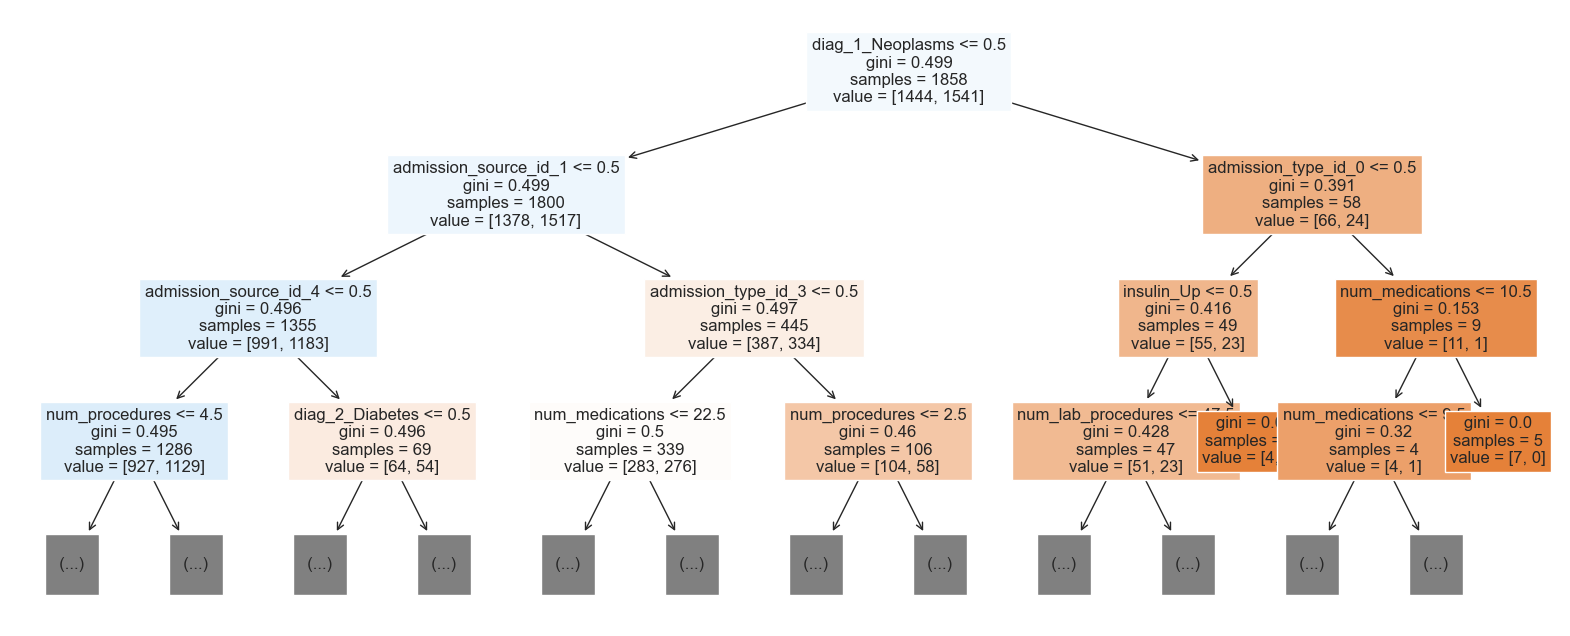

In [102]:
# Plot one of the trees in the random forest
plt.figure(figsize=(20, 8))
plot_tree(rf.estimators_[42], filled=True, feature_names=selected_features_manual, max_depth=3, fontsize=12)
plt.show()

# Task 5: Nested Cross Validation

In [490]:

test_scores_outer, test_scores_auc_outer, test_scores_logloss_outer = [], [], []

cv_scores_per_hparam_rf_outer, cv_scores_per_hparam_auc_rf_outer, cv_scores_per_hparam_logloss_rf_outer = [], [], []

# for train_val_index, test_index in outer_kf.split(df):
#     # Get 2 folds for training and 1 fold for validation
#     fold_df_train_val, fold_df_test = df.iloc[train_val_index], df.iloc[test_index]
#     cv_scores_per_hparam_rf, cv_scores_per_hparam_auc_rf, cv_scores_per_hparam_logloss_rf, test_scores_rf, test_scores_auc_rf, test_scores_logloss_rf = perform_cross_validation(model=RandomForestClassifier, hyperparameters=rf_hparams, df_train_val=fold_df_train_val, df_test=fold_df_test)
#     test_scores_outer.append(test_scores_rf)
#     test_scores_auc_outer.append(test_scores_auc_rf)
#     test_scores_logloss_outer.append(test_scores_logloss_rf)
#     cv_scores_per_hparam_rf_outer.append(cv_scores_per_hparam_rf)
#     cv_scores_per_hparam_auc_rf_outer.append(cv_scores_per_hparam_auc_rf)
#     cv_scores_per_hparam_logloss_rf_outer.append(cv_scores_per_hparam_logloss_rf)

In [213]:
def perform_nested_cross_validation(model, hyperparameters, df=df):
    outer_k_folds = 3
    outer_kf = KFold(n_splits=outer_k_folds)
    
    test_scores_outer, test_scores_auc_outer, test_scores_logloss_outer = [], [], []

    cv_scores_per_hparam_outer, cv_scores_per_hparam_auc_outer, cv_scores_per_hparam_logloss_outer = [], [], []

    for train_val_index, test_index in outer_kf.split(df):
        # Get 2 folds for training and 1 fold for validation
        fold_df_train_val, fold_df_test = df.iloc[train_val_index], df.iloc[test_index]
        cv_scores_per_hparam, cv_scores_per_hparam_auc, cv_scores_per_hparam_logloss, \
        test_scores, test_scores_auc, test_scores_logloss = perform_cross_validation(model=model, hyperparameters=hyperparameters, df_train_val=fold_df_train_val, df_test=fold_df_test)
        
        # record inner CV scores per hyperparameter
        cv_scores_per_hparam_outer.append(cv_scores_per_hparam)
        cv_scores_per_hparam_auc_outer.append(cv_scores_per_hparam_auc)
        cv_scores_per_hparam_logloss_outer.append(cv_scores_per_hparam_logloss)

        # record test scores per hyperparameter. pretend that i only 'see' the test scores of hparam with
        # highest inner CV score
        test_scores_outer.append(test_scores)
        test_scores_auc_outer.append(test_scores_auc)
        test_scores_logloss_outer.append(test_scores_logloss)
    
    return test_scores_outer, test_scores_auc_outer, test_scores_logloss_outer, cv_scores_per_hparam_outer, cv_scores_per_hparam_auc_outer, cv_scores_per_hparam_logloss_outer
       

In [214]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df = df.head(4200)
svm_hparams = [{'C':0.042, 'probability': True, 'kernel':'linear'},
               {'C':0.42, 'probability': True, 'kernel':'linear'},
               {'C': 4.2, 'probability': True, 'kernel':'linear'}, 
               {'C':42, 'probability': True, 'kernel':'linear'},
               # {'C':420, 'probability': True, 'kernel':'precomputed'}
               ]

test_scores_outer_svm, test_scores_auc_outer_svm, test_scores_logloss_outer_svm, \
    cv_scores_per_hparam_outer_svm, cv_scores_per_hparam_auc_outer_svm, cv_scores_per_hparam_logloss_outer_svm = \
          perform_nested_cross_validation(svm.SVC, svm_hparams, df = df)


In [497]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df = df.head(4200)
rf_hparams = [ {'n_estimators':1}, # decision tree 
               {'n_estimators':42},
               {'n_estimators':142},
               {'n_estimators': 242}, 
               {'n_estimators':342}
               ]

test_scores_outer_rf, test_scores_auc_outer_rf, test_scores_logloss_outer_rf, cv_scores_per_hparam_outer_rf, cv_scores_per_hparam_auc_outer_rf, cv_scores_per_hparam_logloss_outer_rf = perform_nested_cross_validation(RandomForestClassifier, rf_hparams, df = df)


In [499]:
print(test_scores_outer_rf)
print(test_scores_auc_outer_rf)
print(test_scores_logloss_outer_rf)

[[0.5314685314685316, 0.5823863636363636, 0.632946001367054, 0.6429061000685401, 0.6496985934360348], [0.5616905248807088, 0.6325259515570935, 0.651006711409396, 0.67412771560237, 0.6671078755790867], [0.5961152042866712, 0.6326259946949602, 0.6491340602950609, 0.6526181353767561, 0.6517571884984026]]
[[0.5119603329051187, 0.6094523091794813, 0.6408879307055366, 0.6520437711722483, 0.6560195961214772], [0.5342843898385069, 0.6487985116077059, 0.6749362087758349, 0.6904235904331957, 0.6913882891423369], [0.5590102814679085, 0.6285141073276665, 0.6311014404234743, 0.6417010230569553, 0.636654663137714]]
[[17.563089287787992, 0.6764244481898429, 0.660862060208226, 0.6562225291931447, 0.6531594901348544], [16.733623920001683, 0.6607304205385843, 0.6438932643347007, 0.636684961730038, 0.6373017577736005], [15.818284565966263, 0.6698144343862787, 0.6652352157386178, 0.6598297961982519, 0.6622418333590178]]


In [508]:
np.array(test_scores_outer_rf)[:, 1]

array([0.58238636, 0.63252595, 0.63262599])

In [502]:
np.array(cv_scores_per_hparam_outer_rf).shape

(3, 5, 3)

In [444]:
# Load data
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df = df.head(4200)
df_train_val, df_test = train_test_split(df, test_size=0.20, random_state=42)
# df_train_val_preprocessed, X_train_val, y_train_val = preprocess(split=df_train_val, train_df=df_train_val)

# preprocess training folds
X_train_val_encoded_drop_corr, y_train_val, X_train_val, to_drop, _ = preprocess_pipeline_training(train_df=df_train_val)

# preprocess validation fold separately
X_test_encoded, y_test, _ = preprocess_pipeline_val_test(df_test, train_df=df_train_val, X_train = X_train_val, to_drop = to_drop)


model_svm = svm.SVC(probability=True)
C_list = [0.042, 0.42, 42, 420] # define grid search
grid = dict(C=C_list)
cv = KFold(n_splits=3)
scorer = make_scorer(f1_score, average='micro')
grid_search = GridSearchCV(
        estimator=model_svm,
        param_grid=grid,
        pre_dispatch = 16,
        n_jobs=4,
        cv=cv,
        scoring="accuracy", #scorer,
        error_score=0,
        verbose=1,
        )
grid_result = grid_search.fit(X_train_val_encoded_drop_corr, y_train_val)
model_svm = svm.SVC(kernel="linear",C=grid_result.best_params_["C"])
model_svm.fit(X_train_val_encoded_drop_corr, y_train_val)
y_hat_svm = model_svm.predict(X_test_encoded)
print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['std_test_score'])
print(f1_score(y_hat_svm, y_test))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[0.52281656 0.57328498 0.6137806  0.60290118]
[0.01893557 0.01113661 0.00645336 0.00322668]
0.6237288135593221


In [177]:
np.mean([0.63762376, 0.63331049, 0.60096485])

0.6239663666666666

In [178]:
np.std([0.63762376, 0.63331049, 0.60096485])

0.016359572146981367